# CSC 499 Graphing QUIC vs TCP Simulation Performance

In [227]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import numpy as np
import os
import string

999
2000
1000000
QUIC with loss sample
C:\Users\Jamie\Documents\UVic\4th Year\Fall 2021\CSC 499 - QUIC\jupyter-csc499\499-Visualization\data\benchmarking-loss\TCP\festive\2Mbps\0.05\no-pacing\
TCP | festive | 2Mbps (2000000bps) | 5.0% loss | no pacing
444
222
QUIC | festive | 1Mbps (1000000bps) | 0.0% loss | pacing
QUIC | festive | 1Mbps (1000000bps) | 1.0% loss | no pacing
QUIC | festive | 2Mbps (2000000bps) | 5.0% loss | no pacing
QUIC | tobasco | 500Kbps (500000bps) | 1.0% loss | pacing
QUIC | tobasco | 2Mbps (2000000bps) | 2.0% loss | pacing
QUIC | tobasco | 3Mbps (3000000bps) | 2.0% loss | no pacing
QUIC | tobasco | 3Mbps (3000000bps) | 5.0% loss | pacing
QUIC | tobasco | 5Mbps (5000000bps) | 5.0% loss | no pacing
festive over QUIC @ 2Mbps with 0% loss (with pacing)
festive over QUIC @ 2Mbps with 5.0% loss (no pacing)
Mean Quality Level - QUIC 500Kbps:  0.7278911564625851
Mean Quality Level - TCP  500Kbps:  0.9099099099099099
Mean Quality Level - QUIC 1Mbps:  1.5
Mean Quality Leve

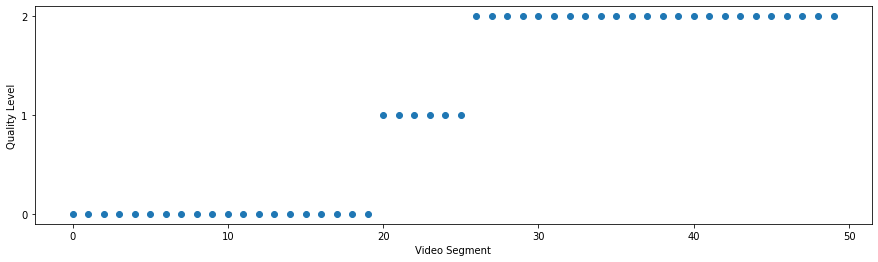

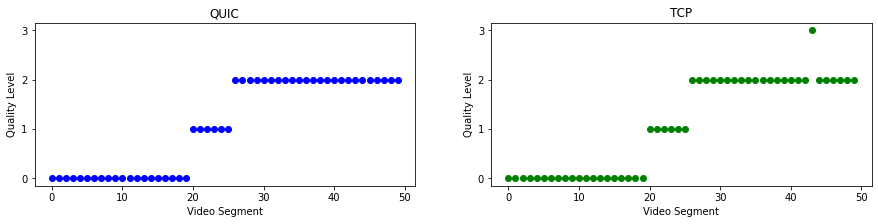

Overlayed comparison


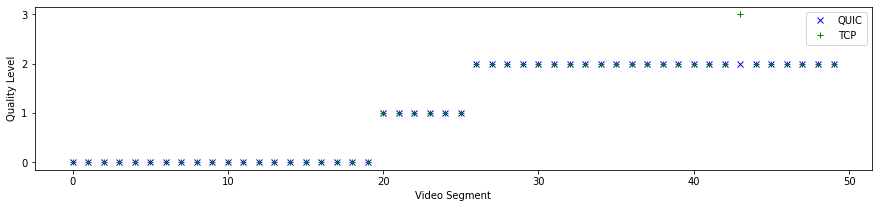

QUIC buffer level graph demo


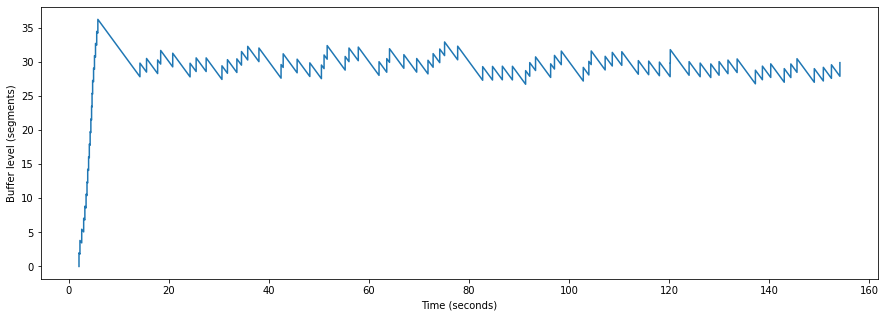

TCP buffer level graph demo


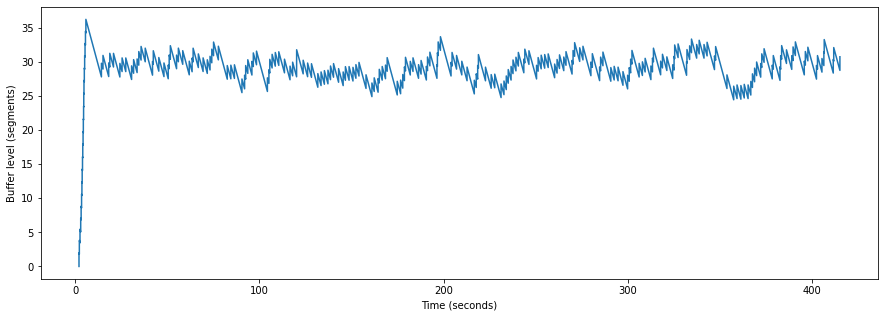

Buffer level comparison for normal rate


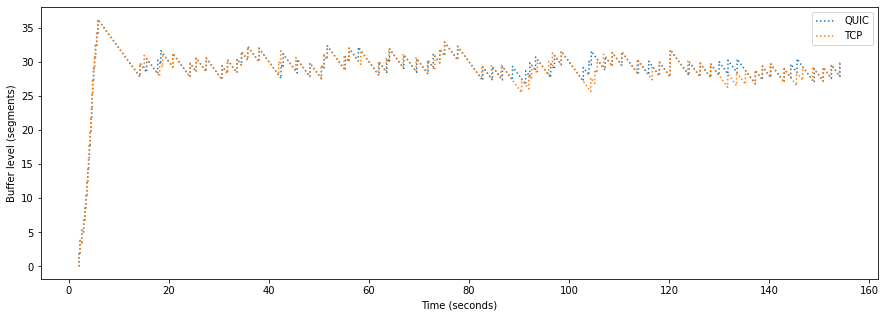

Buffer level comparison for slow rate


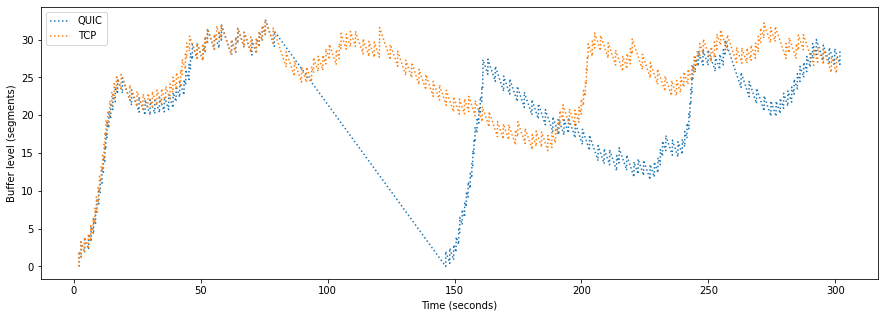

Buffer level over time with underflow annotations
Malformed buffer underflow log. Likely that QUIC failed near time 330.524


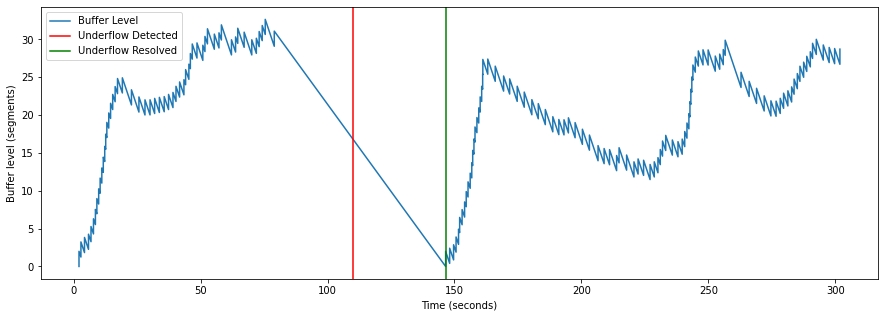

Full timeline for QUIC 500Kbps
Malformed buffer underflow log. Likely that QUIC failed near time 330.524


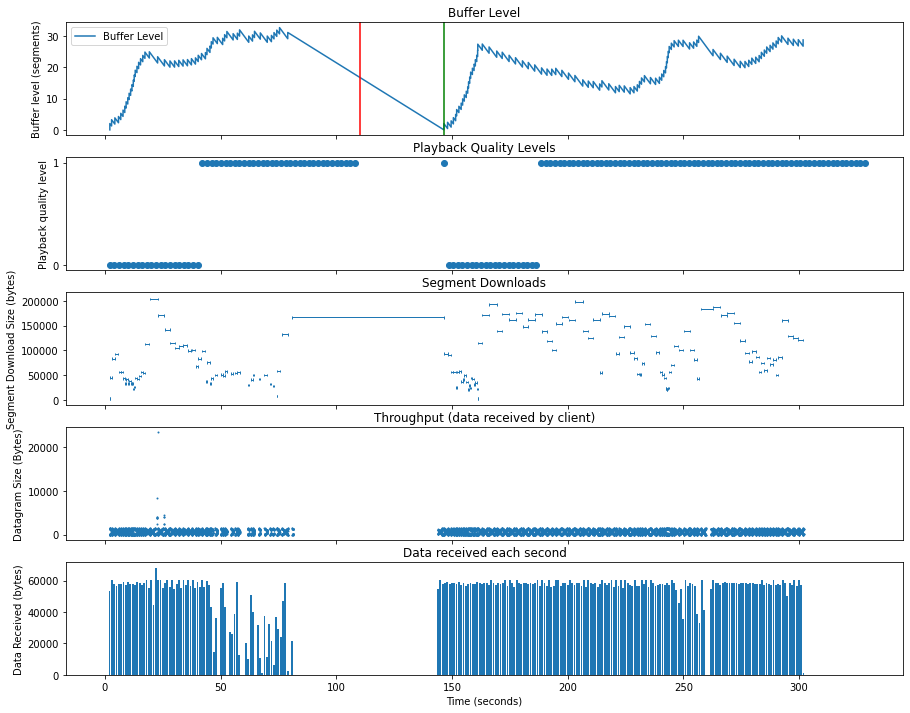

Full timeline for TCP 500Kbps


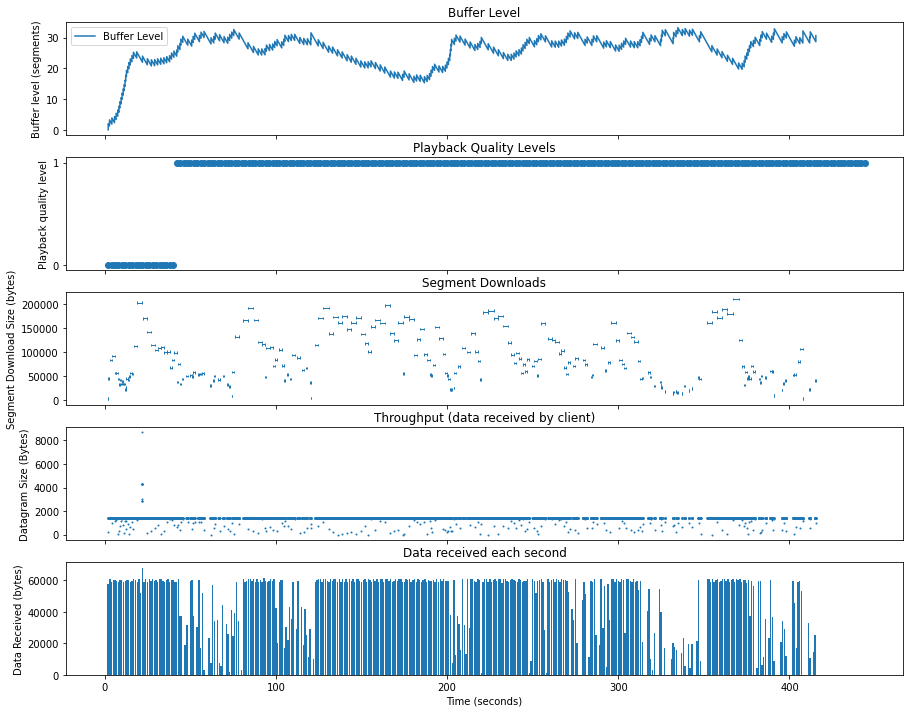

Full timeline for QUIC 2Mbps
Malformed buffer underflow log. Likely that QUIC failed near time 184.045


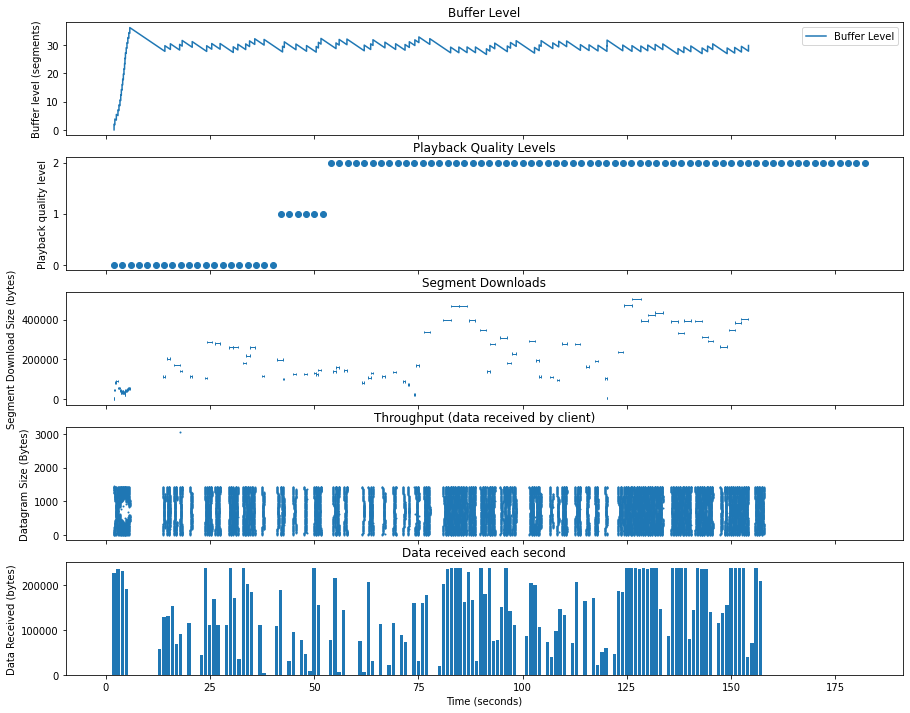

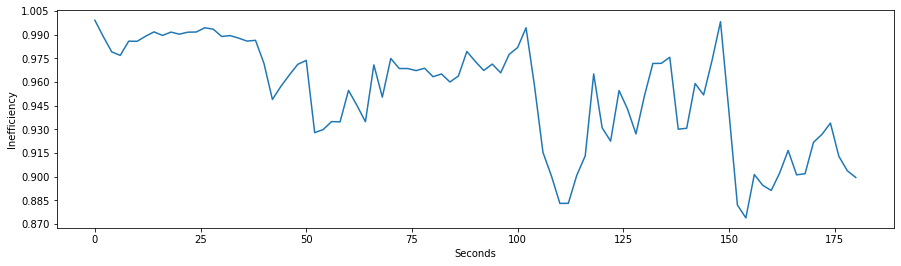

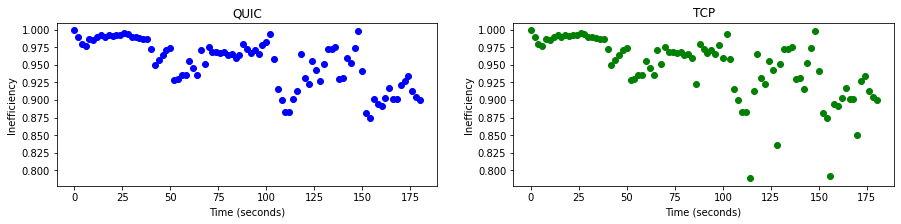

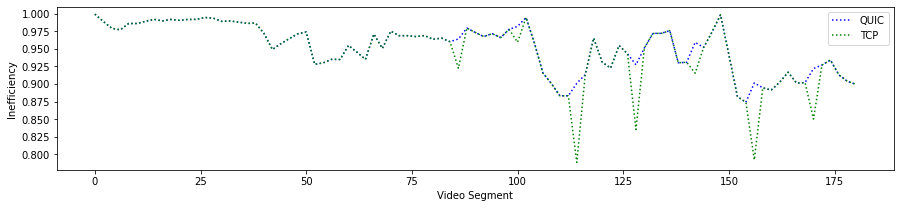

Stability for QUIC sample
Stability for TCP sample


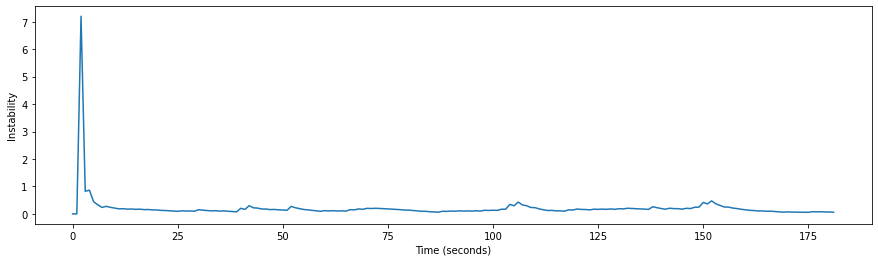

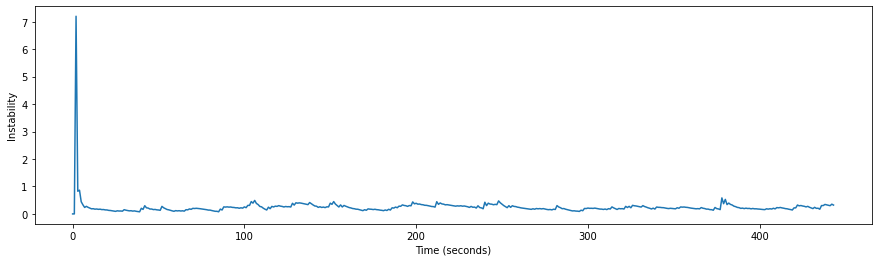

QUIC vs TCP samples


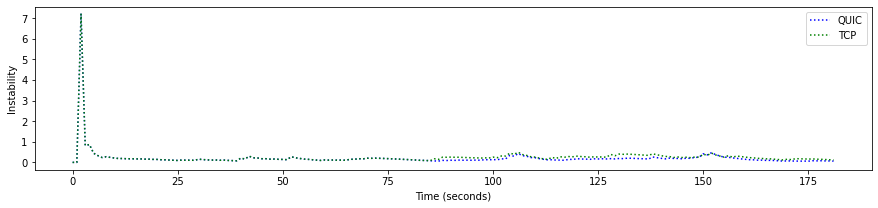

QUIC vs TCP lossy samples


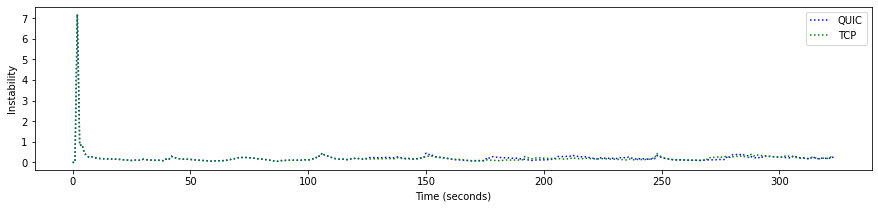

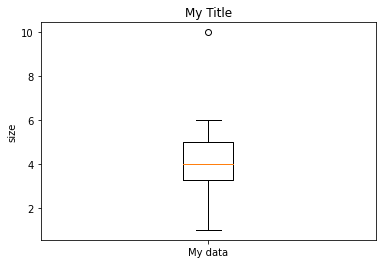

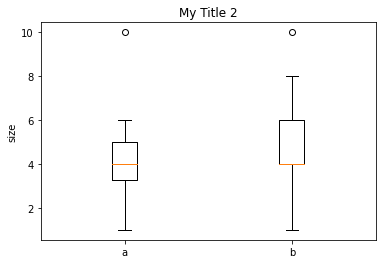

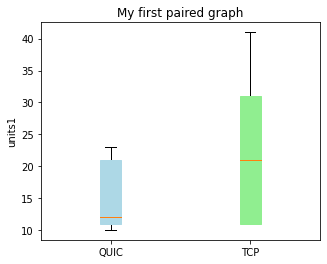

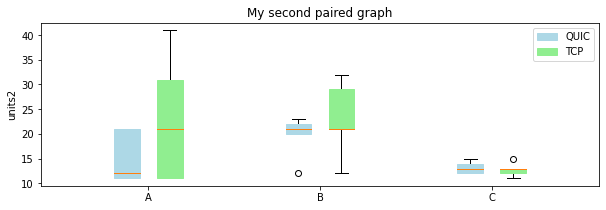

In [527]:
# Get all the supporting utilities set up. 
# Suggest using command-mode 'o' shortcut to hide output as it will include all the demos.
%run GraphHelpers.ipynb

## Enumate the successful QUIC simulations


In [3]:
print ("Min 90 segments (no error data set)")
for sim in findSimulationsWithMinSegCount(quicDataDir, 90):
    print ('\t', getDescription(sim))  

Min 90 segments (no error data set)
	 festive over QUIC @ 500Kbps with 0% loss (with pacing)
	 festive over QUIC @ 500Kbps with 0% loss (no pacing)
	 festive over QUIC @ 1Mbps with 0% loss (with pacing)
	 festive over QUIC @ 2Mbps with 0% loss (with pacing)
	 festive over QUIC @ 2Mbps with 0% loss (no pacing)
	 tobasco over QUIC @ 500Kbps with 0% loss (with pacing)
	 tobasco over QUIC @ 500Kbps with 0% loss (no pacing)
	 tobasco over QUIC @ 1Mbps with 0% loss (no pacing)
	 tobasco over QUIC @ 2Mbps with 0% loss (with pacing)
	 tobasco over QUIC @ 3Mbps with 0% loss (with pacing)
	 tobasco over QUIC @ 3Mbps with 0% loss (no pacing)
	 tobasco over QUIC @ 4Mbps with 0% loss (no pacing)


In [4]:
print ("\nMin 50 segments (tobasco only, no error)")
for sim in findSimulationsWithMinSegCount(quicDataDir + "tobasco\\", 50):
    print ('\t', getDescription(sim)) 


Min 50 segments (tobasco only, no error)
	 tobasco over QUIC @ 100Kbps with 0% loss (with pacing)
	 tobasco over QUIC @ 100Kbps with 0% loss (no pacing)
	 tobasco over QUIC @ 500Kbps with 0% loss (with pacing)
	 tobasco over QUIC @ 500Kbps with 0% loss (no pacing)
	 tobasco over QUIC @ 1Mbps with 0% loss (with pacing)
	 tobasco over QUIC @ 1Mbps with 0% loss (no pacing)
	 tobasco over QUIC @ 2Mbps with 0% loss (with pacing)
	 tobasco over QUIC @ 3Mbps with 0% loss (with pacing)
	 tobasco over QUIC @ 3Mbps with 0% loss (no pacing)
	 tobasco over QUIC @ 4Mbps with 0% loss (with pacing)
	 tobasco over QUIC @ 4Mbps with 0% loss (no pacing)
	 tobasco over QUIC @ 5Mbps with 0% loss (with pacing)
	 tobasco over QUIC @ 5Mbps with 0% loss (no pacing)


In [5]:
print ("Min 50 segments (with loss)")
for sim in findSimulationsWithMinSegCount(quicLossDir, 90):
    print ('\t', getDescription(sim))

Min 50 segments (with loss)
	 festive over QUIC @ 500Kbps with 0.0% loss (with pacing)
	 festive over QUIC @ 500Kbps with 0.0% loss (no pacing)
	 festive over QUIC @ 500Kbps with 1.0% loss (with pacing)
	 festive over QUIC @ 500Kbps with 1.0% loss (no pacing)
	 festive over QUIC @ 1Mbps with 0.0% loss (with pacing)
	 festive over QUIC @ 1Mbps with 1.0% loss (with pacing)
	 festive over QUIC @ 1Mbps with 1.0% loss (no pacing)
	 festive over QUIC @ 2Mbps with 0.0% loss (with pacing)
	 festive over QUIC @ 2Mbps with 0.0% loss (no pacing)
	 festive over QUIC @ 2Mbps with 1.0% loss (no pacing)
	 festive over QUIC @ 2Mbps with 5.0% loss (no pacing)
	 tobasco over QUIC @ 500Kbps with 0.0% loss (with pacing)
	 tobasco over QUIC @ 500Kbps with 0.0% loss (no pacing)
	 tobasco over QUIC @ 500Kbps with 1.0% loss (with pacing)
	 tobasco over QUIC @ 500Kbps with 1.0% loss (no pacing)
	 tobasco over QUIC @ 1Mbps with 0.0% loss (no pacing)
	 tobasco over QUIC @ 1Mbps with 1.0% loss (no pacing)
	 tobas

## Bulk Data Visualization
Some initial graphs of the QUIC simulations which are not crashing until after a given threshold (e.g. 90 segments/180 seconds) and the corresponding sections of the related TCP simulations. 

In [6]:
def quicSimulationHas90Segments(sim):
    return quicSimulationHasNSegments(sim, 90) 

def quicSimulationHas50Segments(sim):
    return quicSimulationHasNSegments(sim, 90) 

festive over QUIC @ 500Kbps with 0% loss (with pacing)  vs.  festive over TCP @ 500Kbps with 0% loss (with pacing)


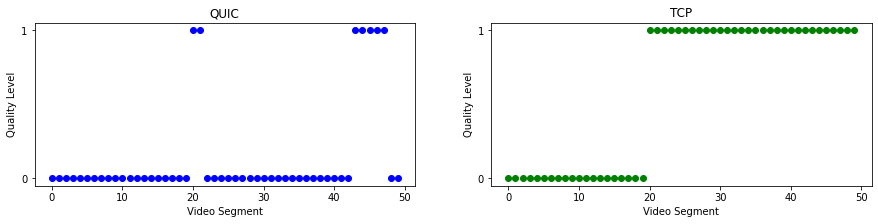



festive over QUIC @ 500Kbps with 0% loss (no pacing)  vs.  festive over TCP @ 500Kbps with 0% loss (no pacing)


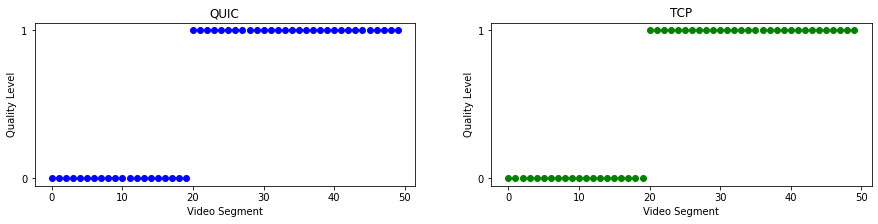



festive over QUIC @ 1Mbps with 0% loss (with pacing)  vs.  festive over TCP @ 1Mbps with 0% loss (with pacing)


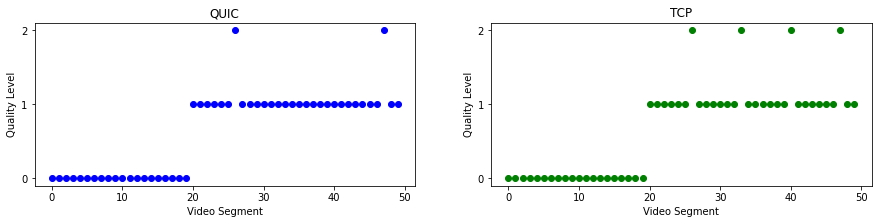



festive over QUIC @ 2Mbps with 0% loss (with pacing)  vs.  festive over TCP @ 2Mbps with 0% loss (with pacing)


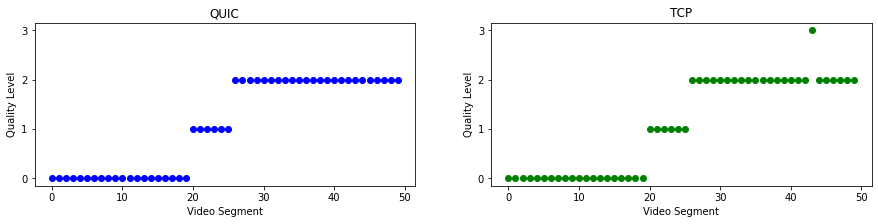



festive over QUIC @ 2Mbps with 0% loss (no pacing)  vs.  festive over TCP @ 2Mbps with 0% loss (no pacing)


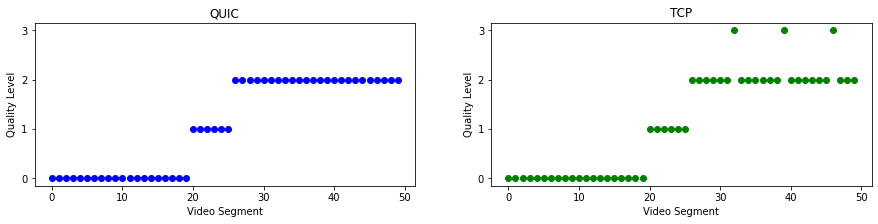



tobasco over QUIC @ 500Kbps with 0% loss (with pacing)  vs.  tobasco over TCP @ 500Kbps with 0% loss (with pacing)


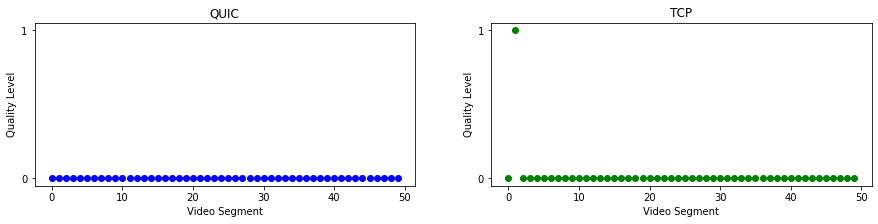



tobasco over QUIC @ 500Kbps with 0% loss (no pacing)  vs.  tobasco over TCP @ 500Kbps with 0% loss (no pacing)


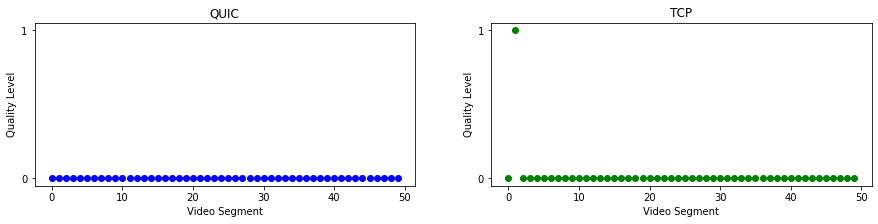



tobasco over QUIC @ 1Mbps with 0% loss (no pacing)  vs.  tobasco over TCP @ 1Mbps with 0% loss (no pacing)


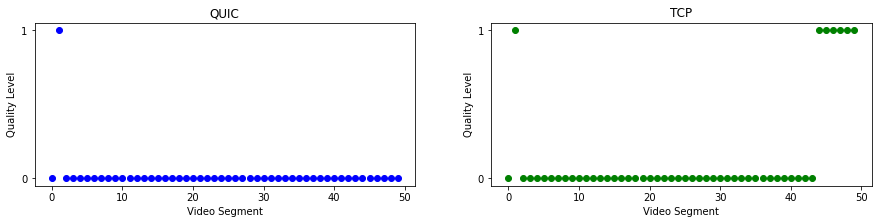



tobasco over QUIC @ 2Mbps with 0% loss (with pacing)  vs.  tobasco over TCP @ 2Mbps with 0% loss (with pacing)


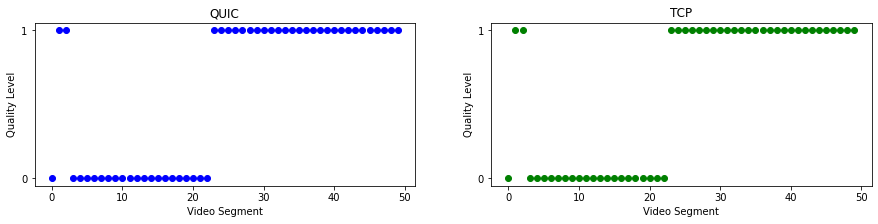



tobasco over QUIC @ 3Mbps with 0% loss (with pacing)  vs.  tobasco over TCP @ 3Mbps with 0% loss (with pacing)


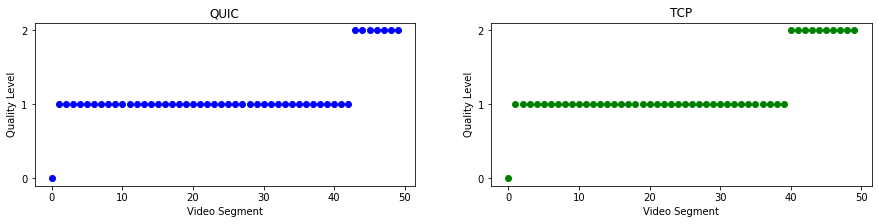



tobasco over QUIC @ 3Mbps with 0% loss (no pacing)  vs.  tobasco over TCP @ 3Mbps with 0% loss (no pacing)


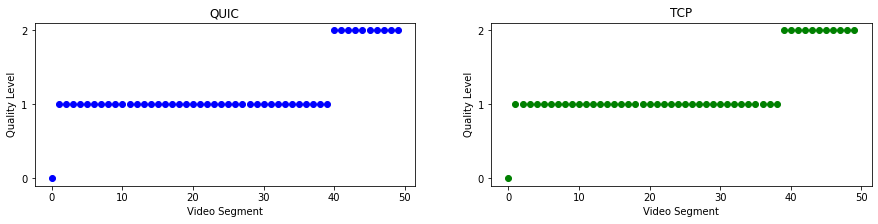



tobasco over QUIC @ 4Mbps with 0% loss (no pacing)  vs.  tobasco over TCP @ 4Mbps with 0% loss (no pacing)


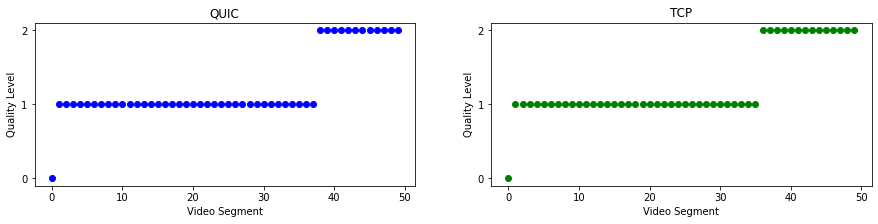

In [58]:
# Compare all the quality and buffer levels without error
for (quicSim, tcpSim) in findSimulationPairs(quicDataDir, quicSimulationHas50Segments):
    quicTitle = getDescription(quicSim)
    tcpTitle = getDescription(tcpSim)
    
    print (quicTitle, " vs. ", tcpTitle)
    compareAdaptationLevelsSeparate (quicSim, tcpSim, 'QUIC', 'TCP')
#     graphBufferLevelComparison(quicSim, tcpSim, 'QUIC', 'TCP')

    print("\n")

festive over QUIC @ 500Kbps with 0.0% loss (with pacing)  vs.  festive over TCP @ 500Kbps with 0.0% loss (with pacing)


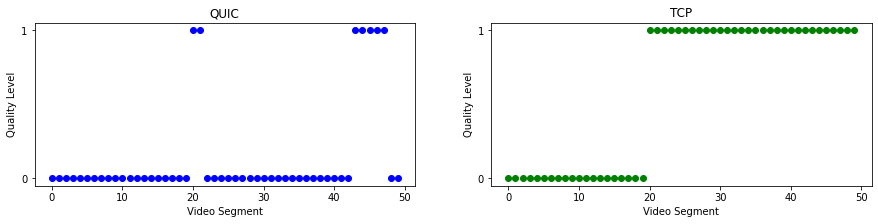

festive over QUIC @ 500Kbps with 0.0% loss (no pacing)  vs.  festive over TCP @ 500Kbps with 0.0% loss (no pacing)


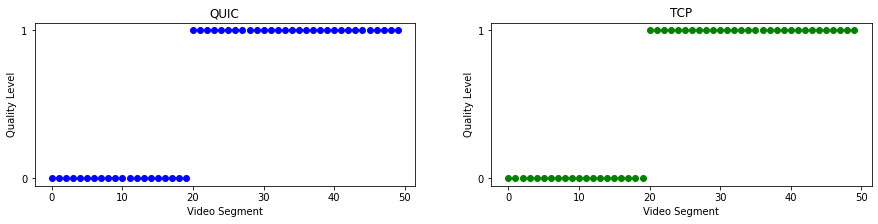

festive over QUIC @ 500Kbps with 1.0% loss (with pacing)  vs.  festive over TCP @ 500Kbps with 1.0% loss (with pacing)


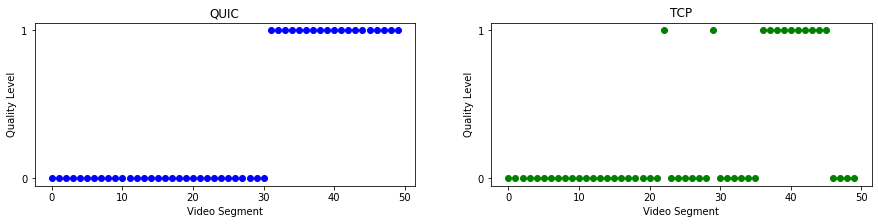

festive over QUIC @ 500Kbps with 1.0% loss (no pacing)  vs.  festive over TCP @ 500Kbps with 1.0% loss (no pacing)


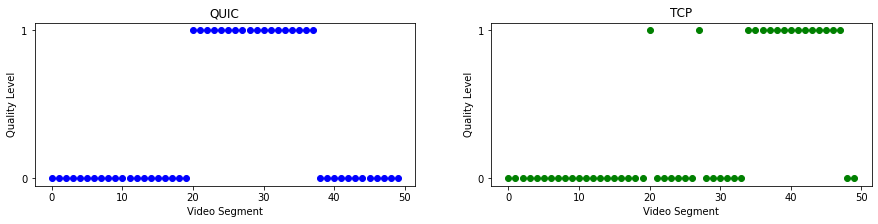

festive over QUIC @ 1Mbps with 0.0% loss (with pacing)  vs.  festive over TCP @ 1Mbps with 0.0% loss (with pacing)


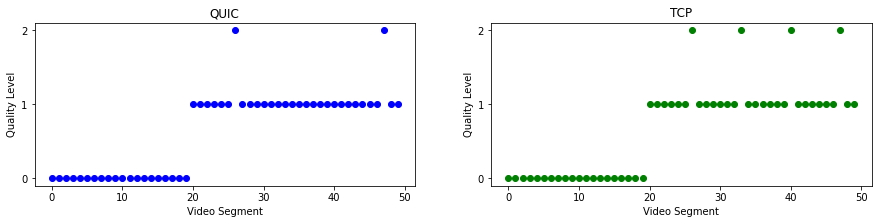

festive over QUIC @ 1Mbps with 1.0% loss (with pacing)  vs.  festive over TCP @ 1Mbps with 1.0% loss (with pacing)


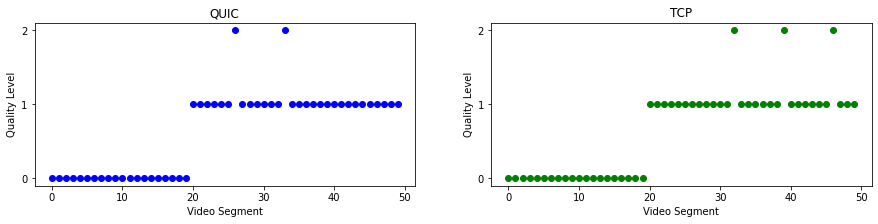

festive over QUIC @ 1Mbps with 1.0% loss (no pacing)  vs.  festive over TCP @ 1Mbps with 1.0% loss (no pacing)


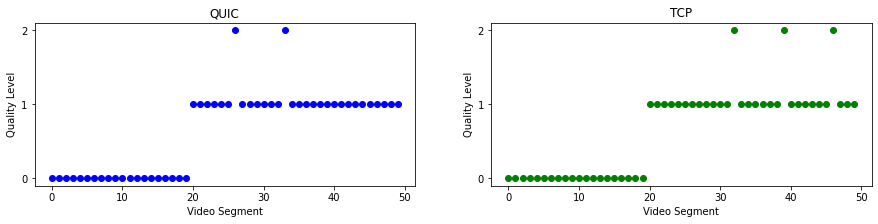

festive over QUIC @ 2Mbps with 0.0% loss (with pacing)  vs.  festive over TCP @ 2Mbps with 0.0% loss (with pacing)


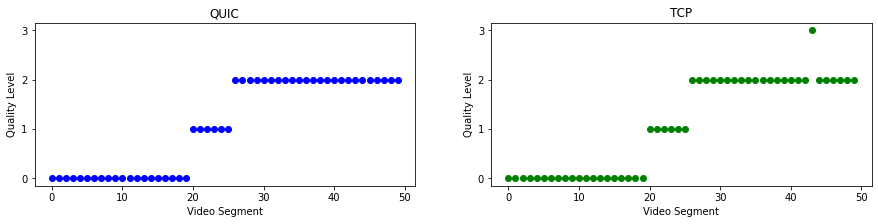

festive over QUIC @ 2Mbps with 0.0% loss (no pacing)  vs.  festive over TCP @ 2Mbps with 0.0% loss (no pacing)


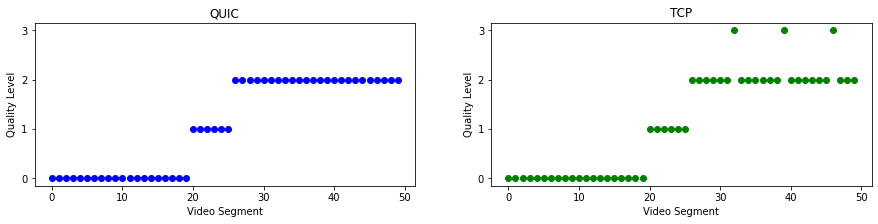

festive over QUIC @ 2Mbps with 1.0% loss (no pacing)  vs.  festive over TCP @ 2Mbps with 1.0% loss (no pacing)


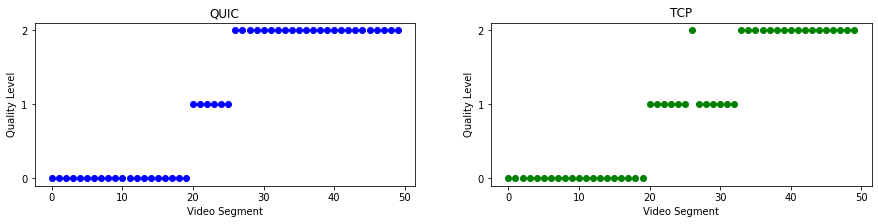

festive over QUIC @ 2Mbps with 5.0% loss (no pacing)  vs.  festive over TCP @ 2Mbps with 5.0% loss (no pacing)


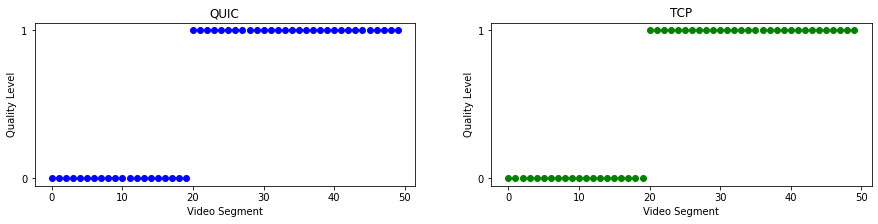

tobasco over QUIC @ 500Kbps with 0.0% loss (with pacing)  vs.  tobasco over TCP @ 500Kbps with 0.0% loss (with pacing)


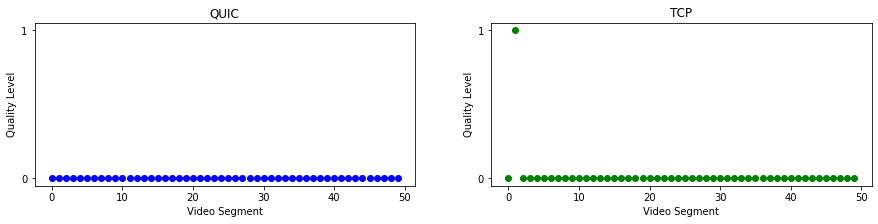

tobasco over QUIC @ 500Kbps with 0.0% loss (no pacing)  vs.  tobasco over TCP @ 500Kbps with 0.0% loss (no pacing)


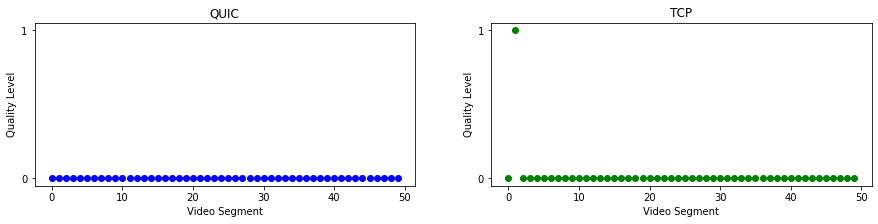

tobasco over QUIC @ 500Kbps with 1.0% loss (with pacing)  vs.  tobasco over TCP @ 500Kbps with 1.0% loss (with pacing)


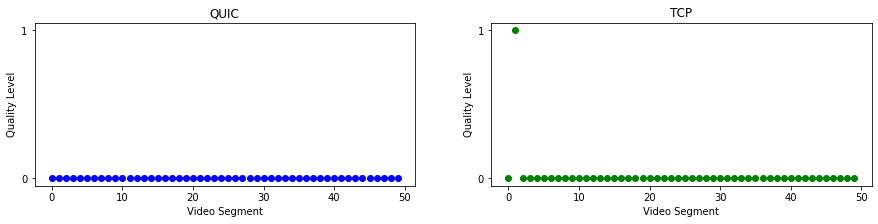

tobasco over QUIC @ 500Kbps with 1.0% loss (no pacing)  vs.  tobasco over TCP @ 500Kbps with 1.0% loss (no pacing)


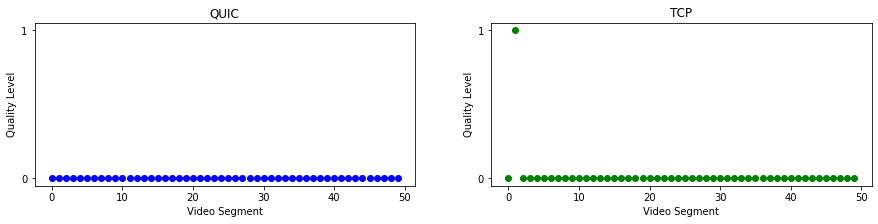

tobasco over QUIC @ 1Mbps with 0.0% loss (no pacing)  vs.  tobasco over TCP @ 1Mbps with 0.0% loss (no pacing)


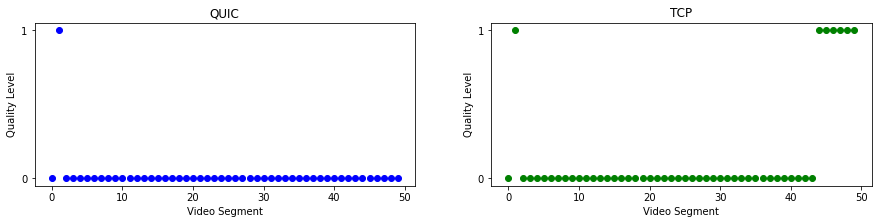

tobasco over QUIC @ 1Mbps with 1.0% loss (no pacing)  vs.  tobasco over TCP @ 1Mbps with 1.0% loss (no pacing)


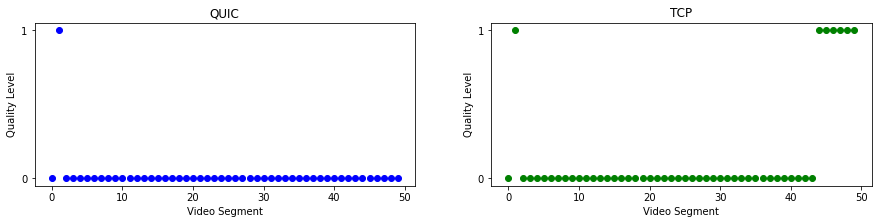

tobasco over QUIC @ 2Mbps with 0.0% loss (with pacing)  vs.  tobasco over TCP @ 2Mbps with 0.0% loss (with pacing)


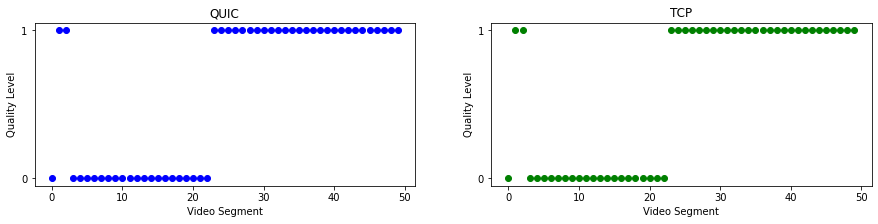

tobasco over QUIC @ 2Mbps with 1.0% loss (with pacing)  vs.  tobasco over TCP @ 2Mbps with 1.0% loss (with pacing)


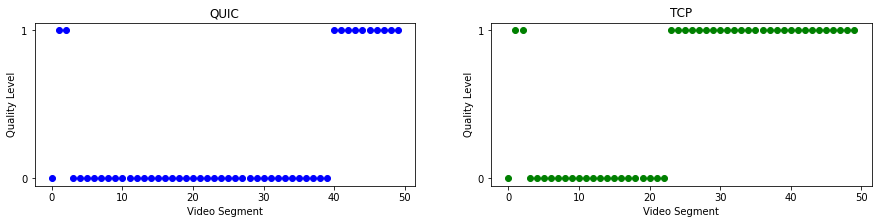

tobasco over QUIC @ 2Mbps with 2.0% loss (with pacing)  vs.  tobasco over TCP @ 2Mbps with 2.0% loss (with pacing)


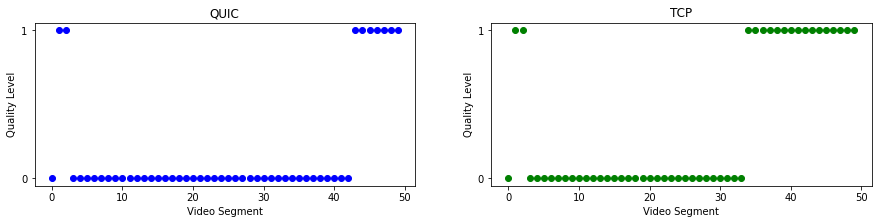

tobasco over QUIC @ 2Mbps with 2.0% loss (no pacing)  vs.  tobasco over TCP @ 2Mbps with 2.0% loss (no pacing)


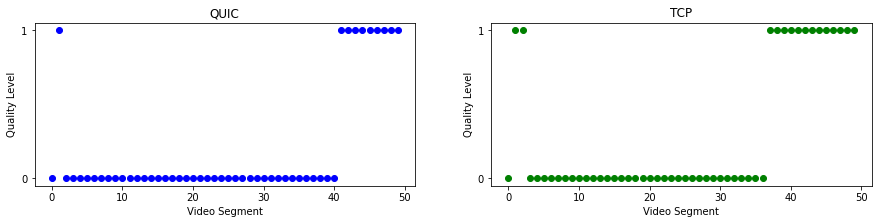

tobasco over QUIC @ 3Mbps with 0.0% loss (with pacing)  vs.  tobasco over TCP @ 3Mbps with 0.0% loss (with pacing)


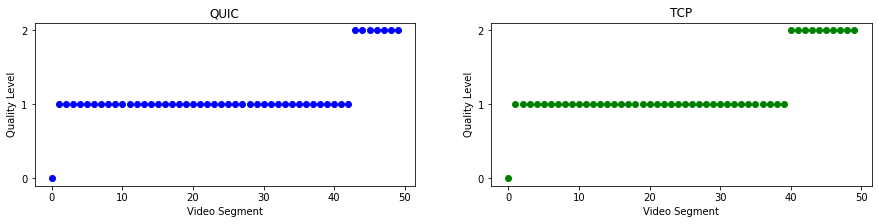

tobasco over QUIC @ 3Mbps with 0.0% loss (no pacing)  vs.  tobasco over TCP @ 3Mbps with 0.0% loss (no pacing)


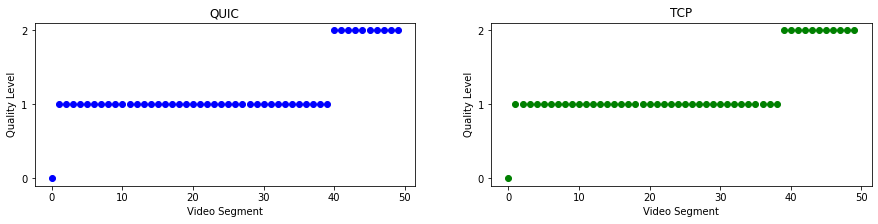

tobasco over QUIC @ 3Mbps with 1.0% loss (no pacing)  vs.  tobasco over TCP @ 3Mbps with 1.0% loss (no pacing)


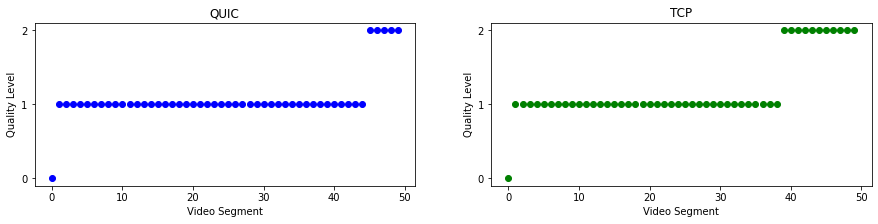

tobasco over QUIC @ 3Mbps with 2.0% loss (no pacing)  vs.  tobasco over TCP @ 3Mbps with 2.0% loss (no pacing)


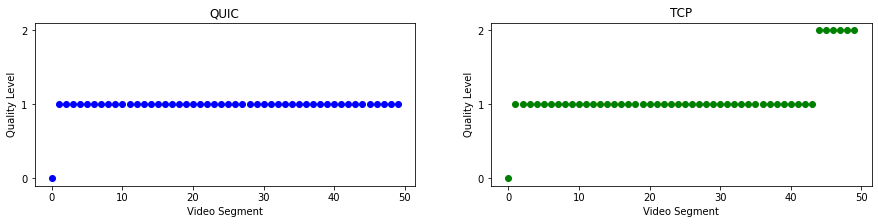

tobasco over QUIC @ 3Mbps with 5.0% loss (with pacing)  vs.  tobasco over TCP @ 3Mbps with 5.0% loss (with pacing)


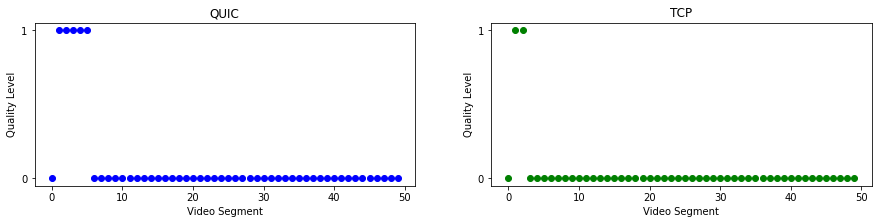

tobasco over QUIC @ 5Mbps with 5.0% loss (with pacing)  vs.  tobasco over TCP @ 5Mbps with 5.0% loss (with pacing)


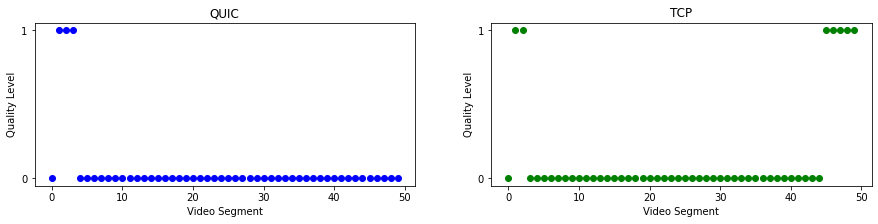

tobasco over QUIC @ 5Mbps with 5.0% loss (no pacing)  vs.  tobasco over TCP @ 5Mbps with 5.0% loss (no pacing)


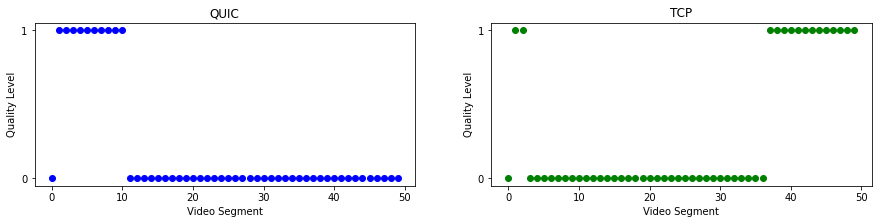

In [56]:
# Compare all the quality and buffer levels with error
for (quicSim, tcpSim) in findSimulationPairs(quicLossDir, quicSimulationHas50Segments):
    quicTitle = getDescription(quicSim)
    tcpTitle = getDescription(tcpSim)

    print (quicTitle, " vs. ", tcpTitle)  
    
    compareAdaptationLevelsSeparate (quicSim, tcpSim, 'QUIC', 'TCP')
#     graphBufferLevelComparison(quicSim, tcpSim, 'QUIC', 'TCP')

festive over QUIC @ 500Kbps with 0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 316.032


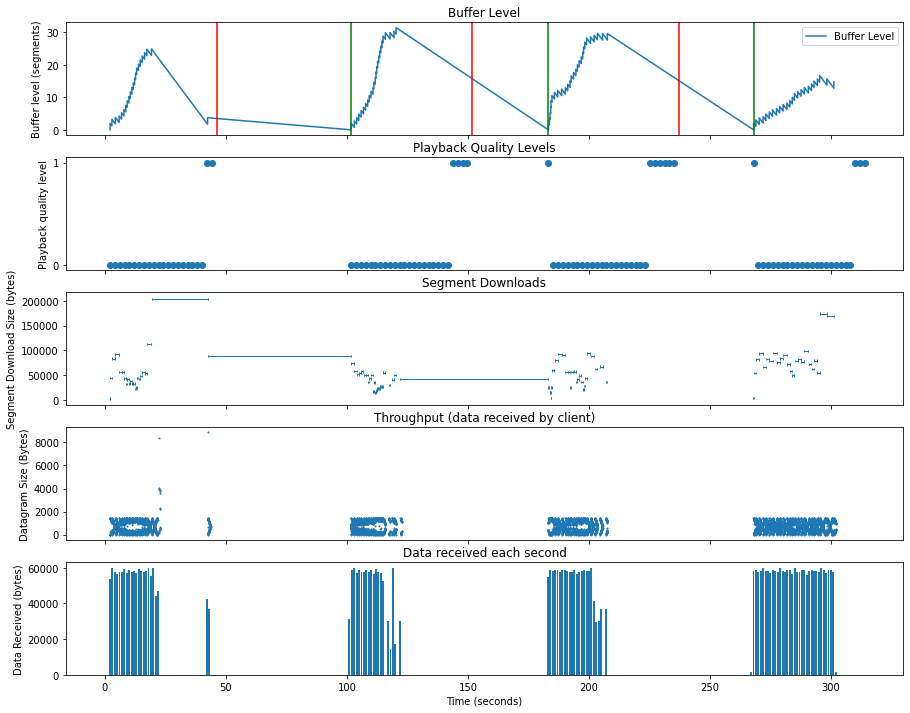



festive over QUIC @ 500Kbps with 0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 330.524


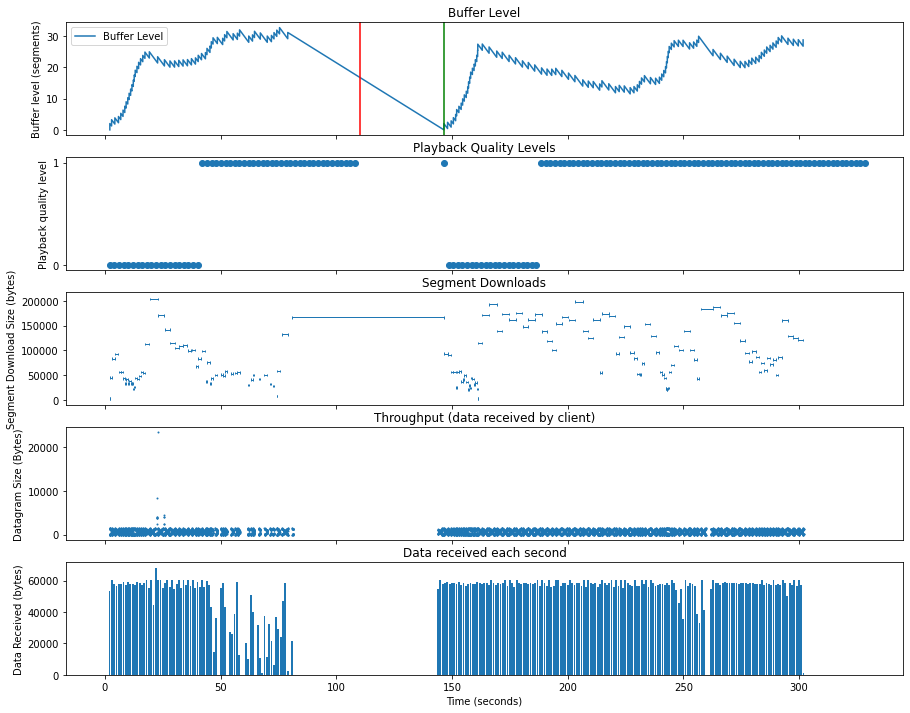



festive over QUIC @ 1Mbps with 0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 324.066


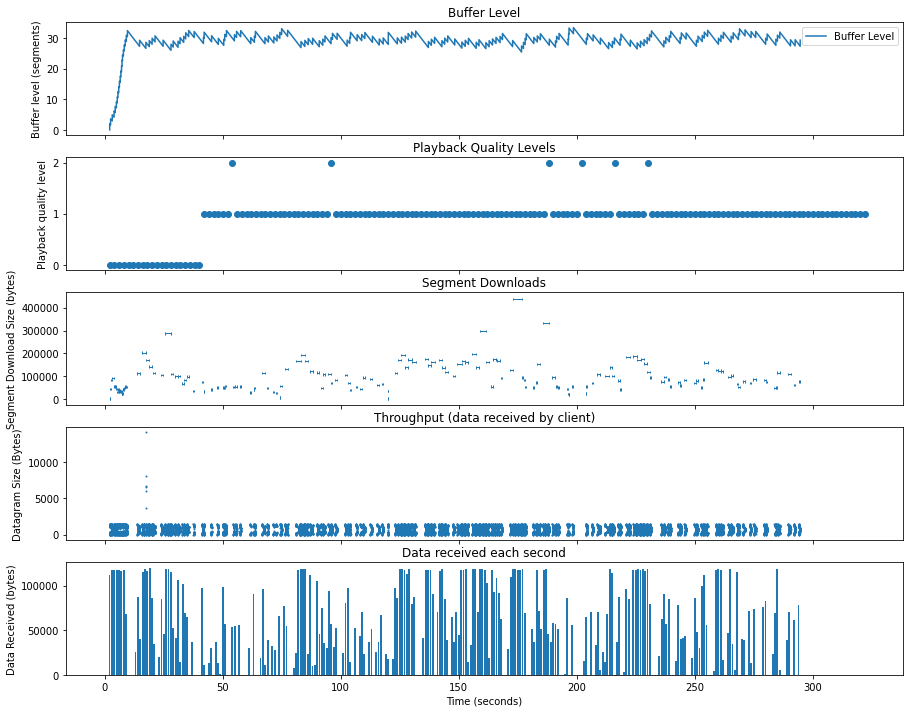



festive over QUIC @ 2Mbps with 0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.045


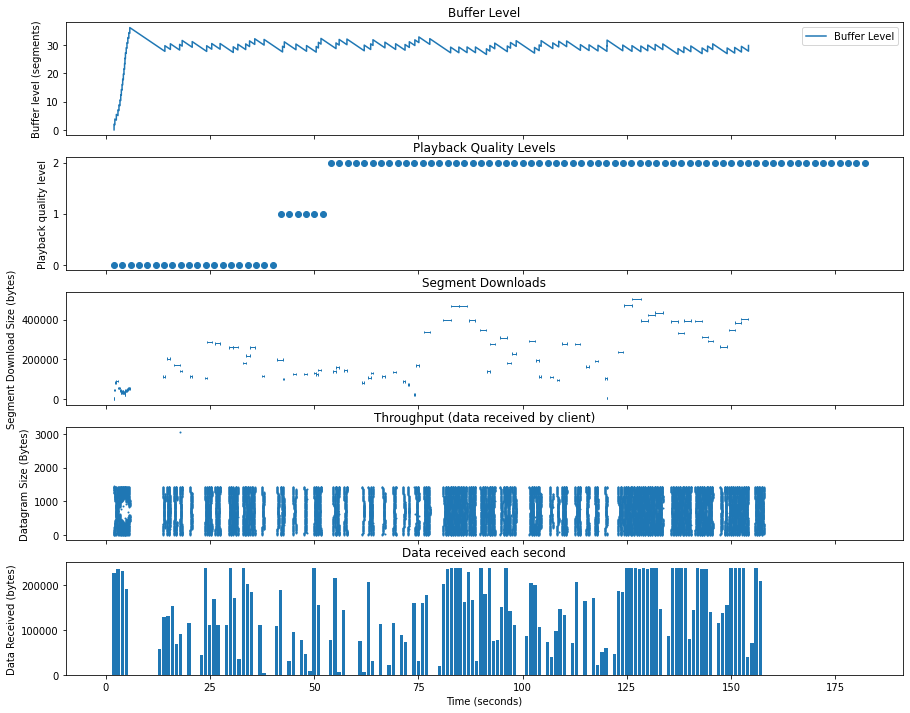



festive over QUIC @ 2Mbps with 0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.045


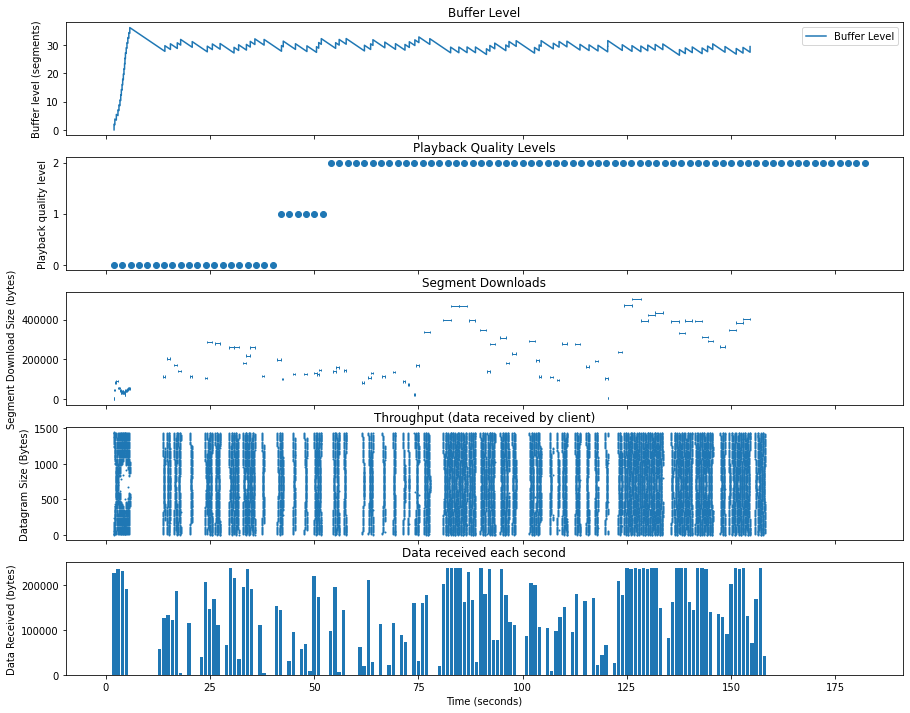



tobasco over QUIC @ 500Kbps with 0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 306.097


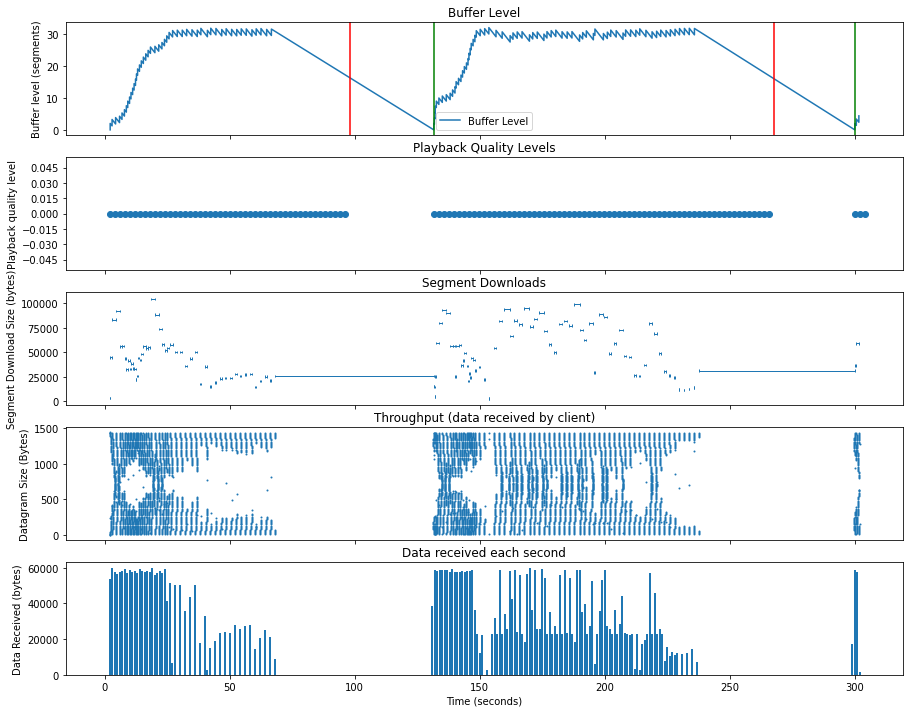



tobasco over QUIC @ 500Kbps with 0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 309.613


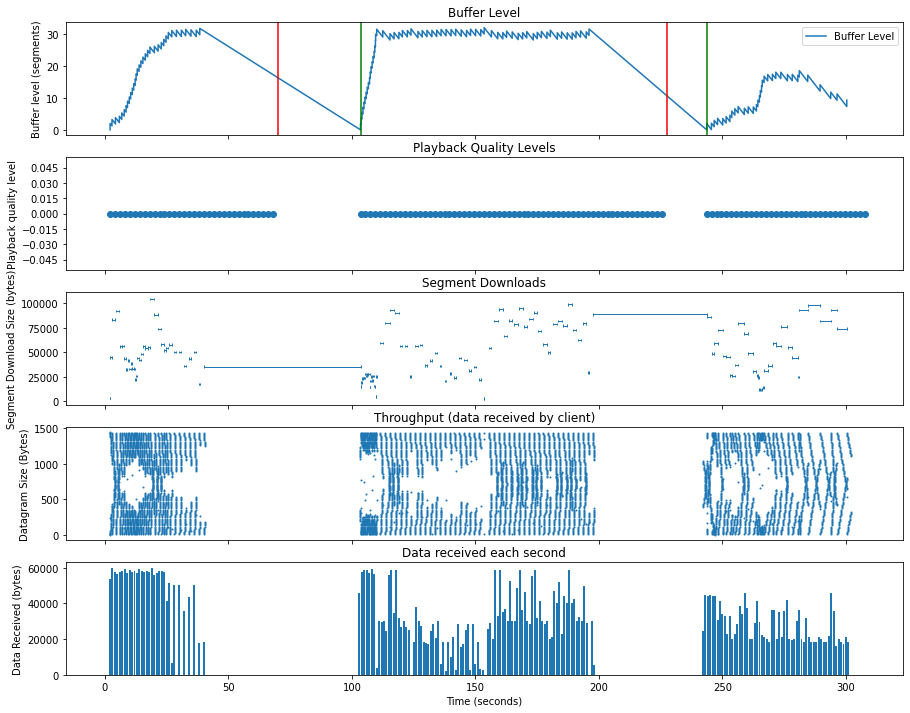



tobasco over QUIC @ 1Mbps with 0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 308.761


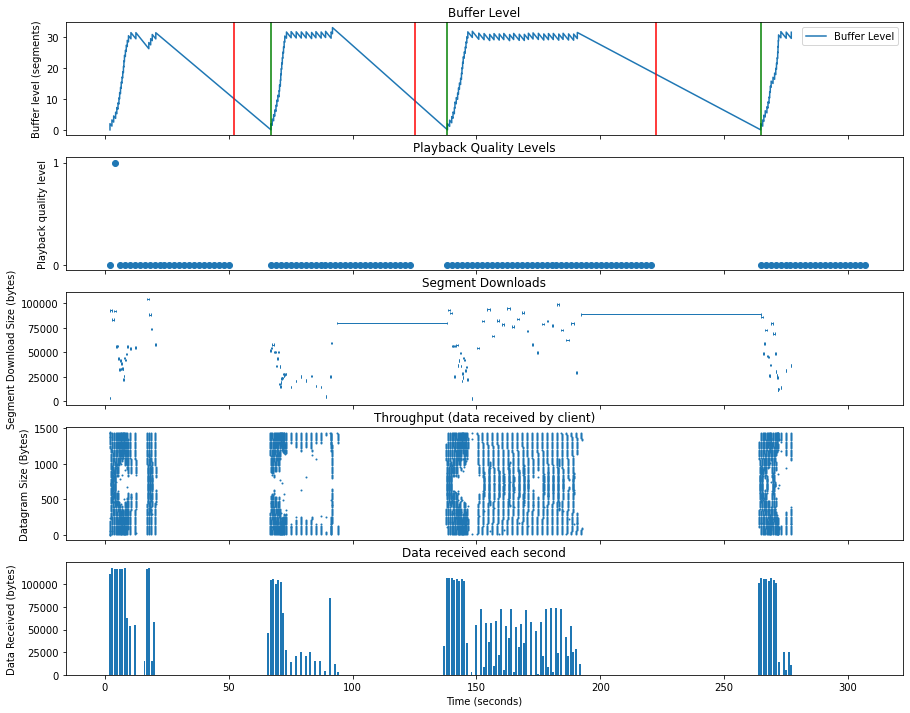



tobasco over QUIC @ 2Mbps with 0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 286.045


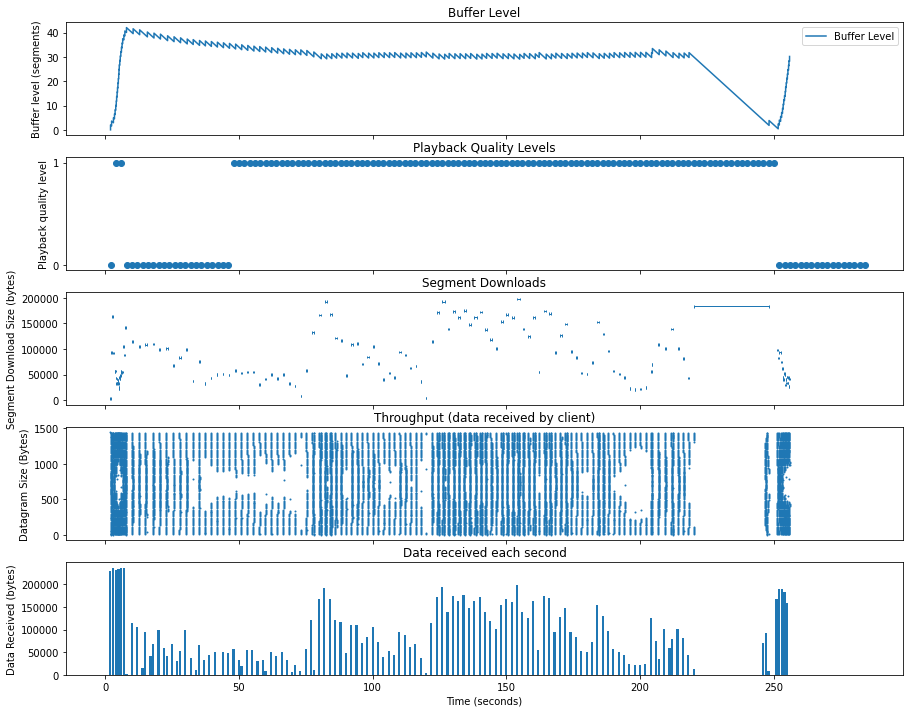



tobasco over QUIC @ 3Mbps with 0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.041


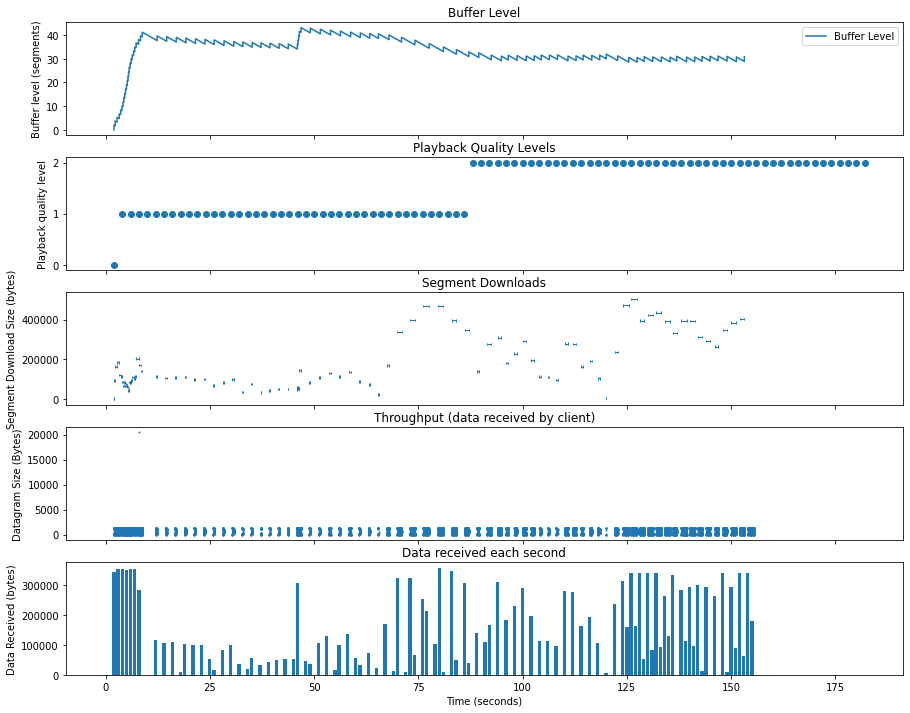



tobasco over QUIC @ 3Mbps with 0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.041


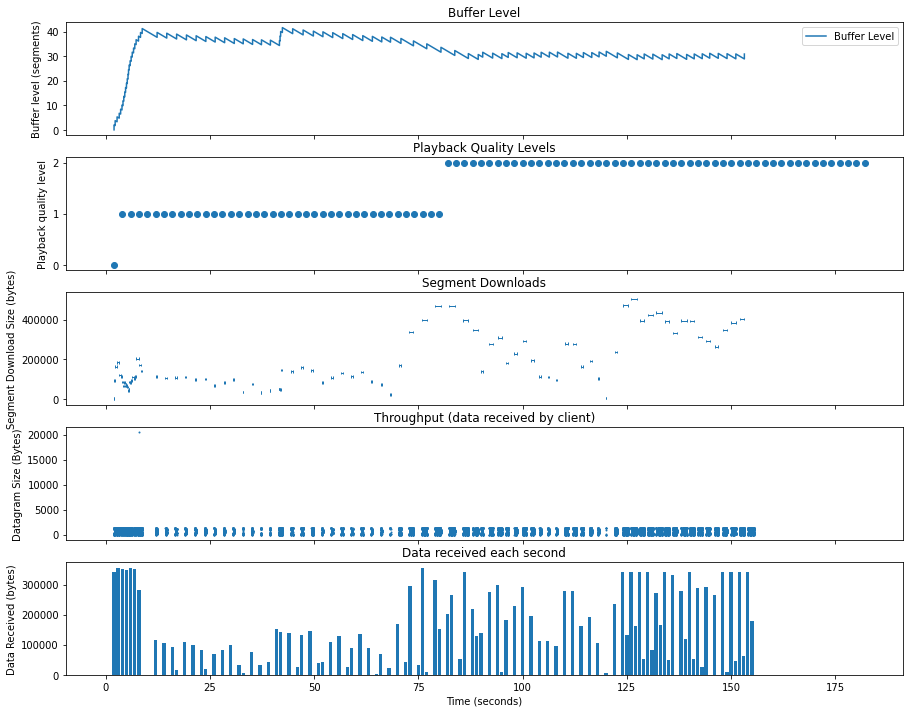



tobasco over QUIC @ 4Mbps with 0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.038


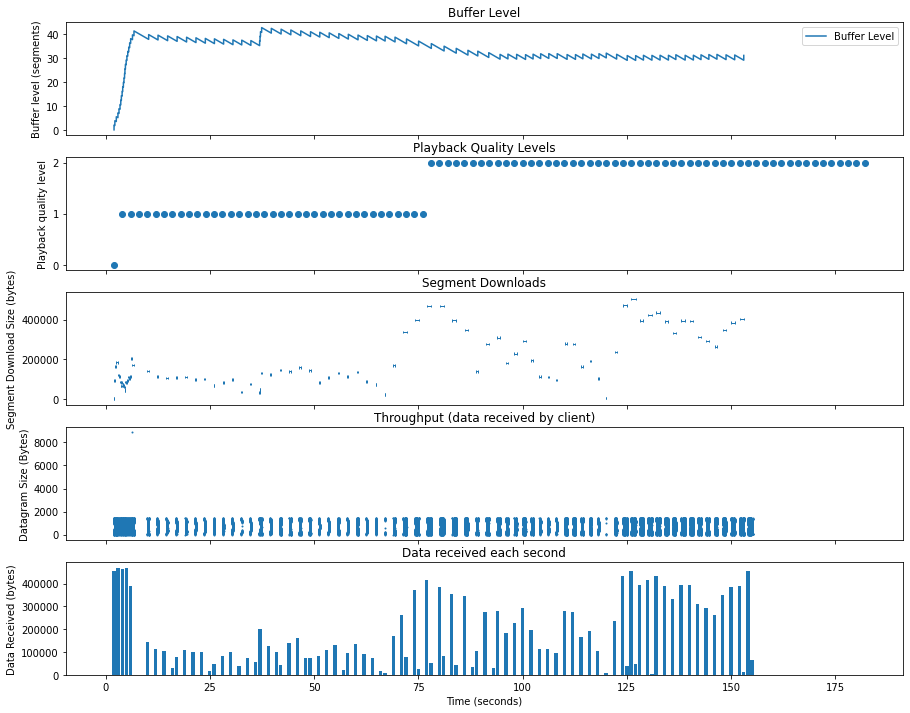

In [48]:
# Timelines for each QUIC run-through (no error)
for quicSim in findSimulationsWithMinSegCount(quicDataDir, 90):
    quicTitle = getDescription(quicSim)
    print (quicTitle)
    graphFullTimeline(quicSim)
    print ("\n")

festive over QUIC @ 500Kbps with 0.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 316.032


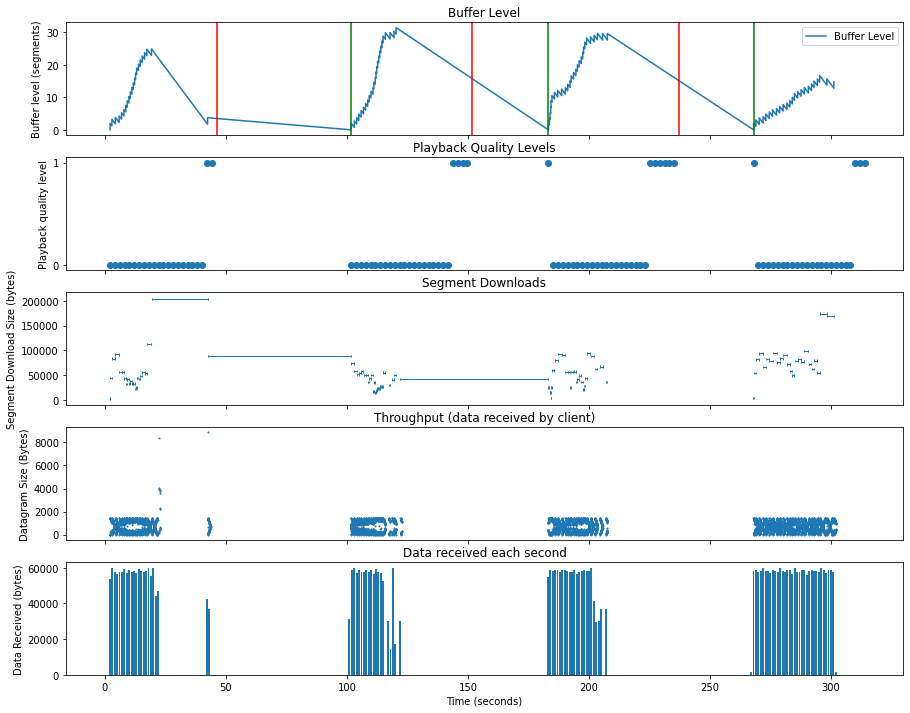



festive over QUIC @ 500Kbps with 0.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 330.524


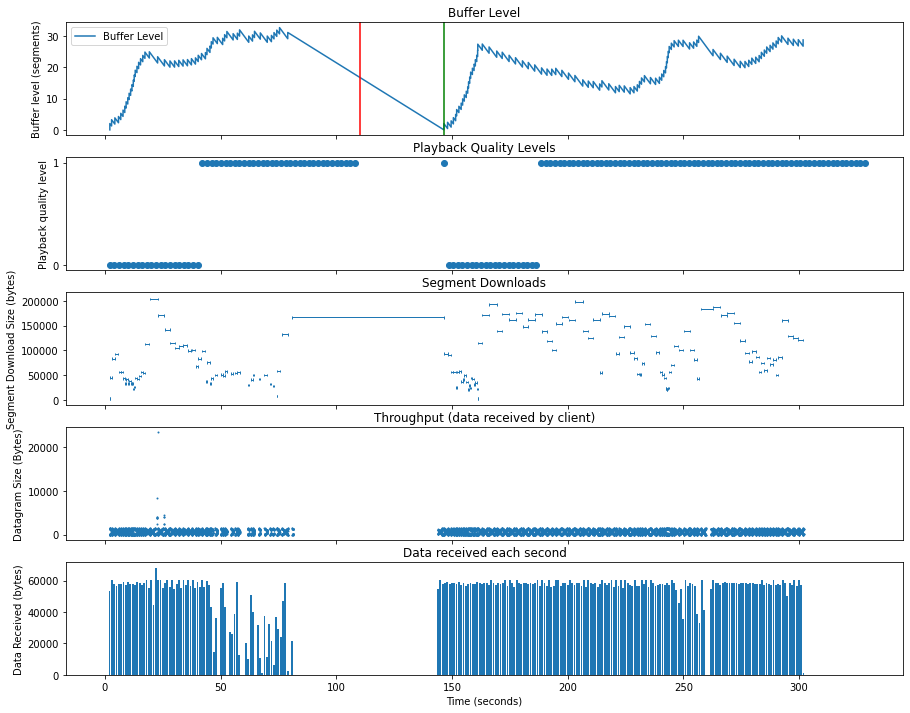



festive over QUIC @ 500Kbps with 1.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 302.949


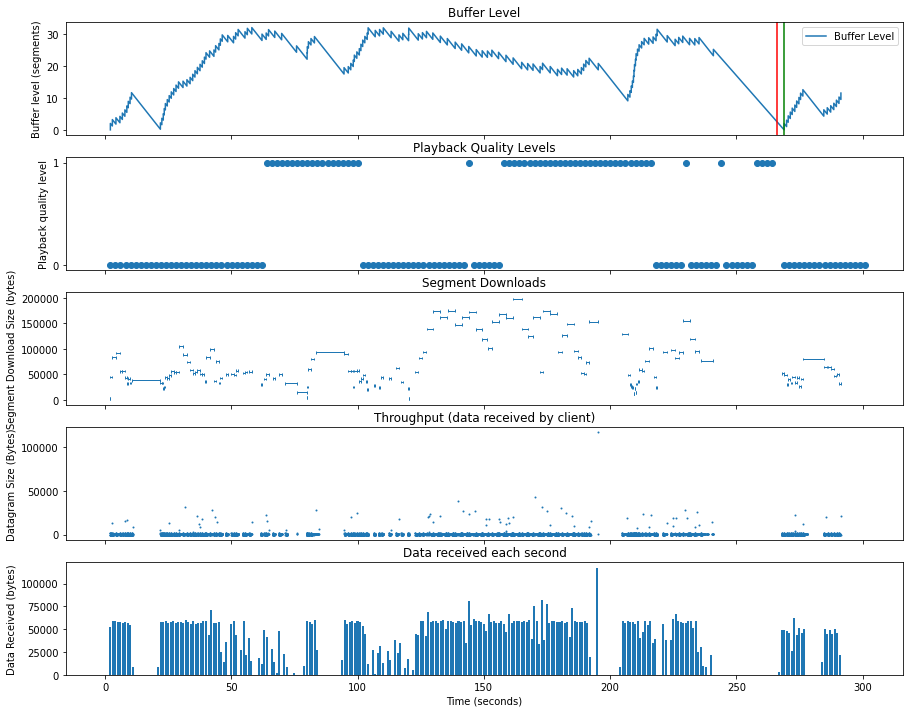



festive over QUIC @ 500Kbps with 1.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 305.695


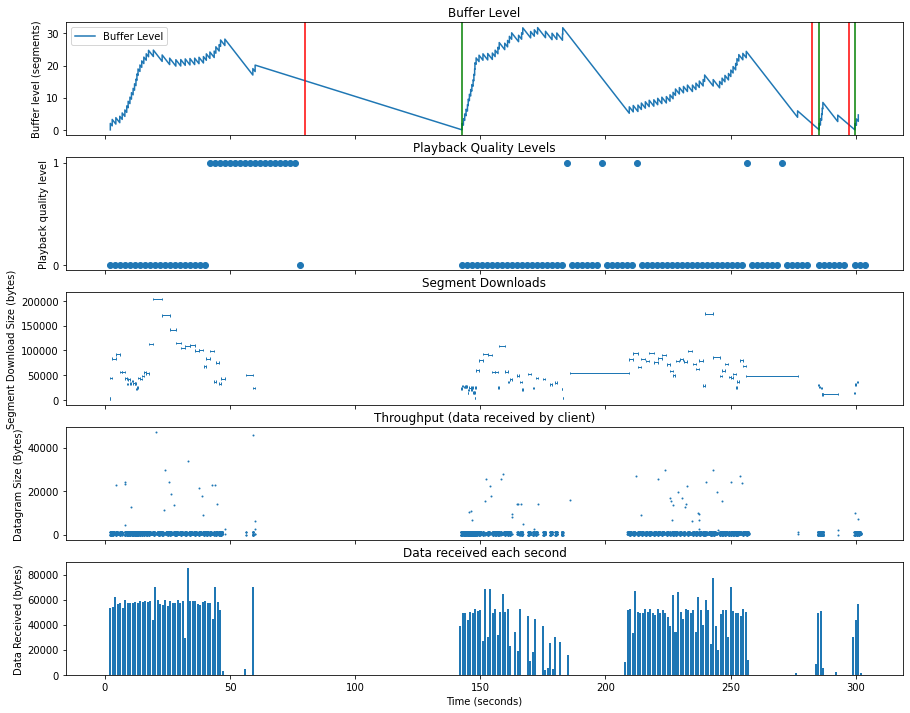



festive over QUIC @ 1Mbps with 0.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 324.066


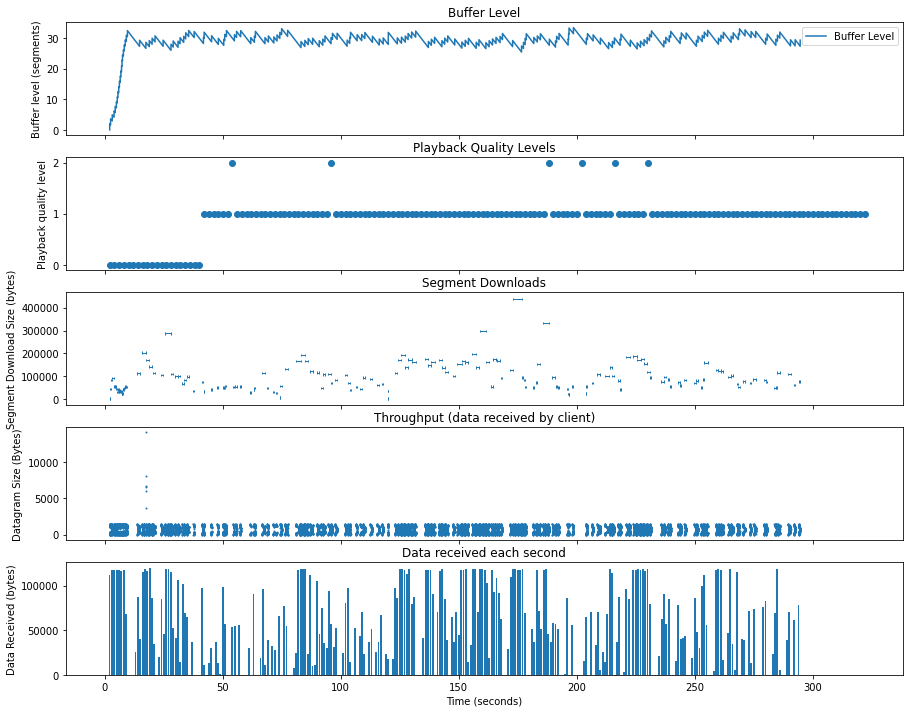



festive over QUIC @ 1Mbps with 1.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 256.71


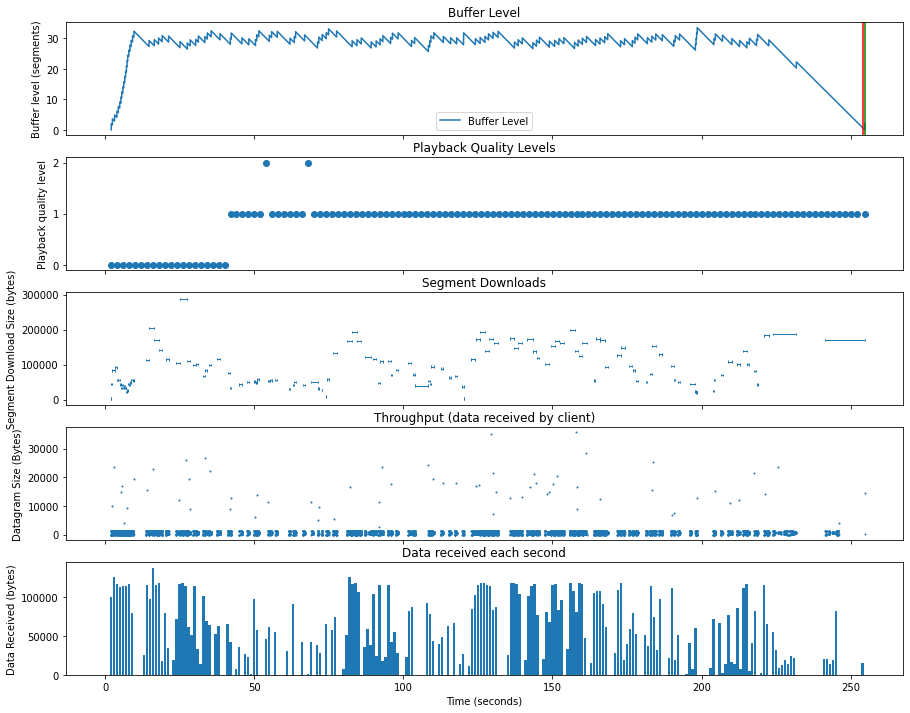



festive over QUIC @ 1Mbps with 1.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 326.066


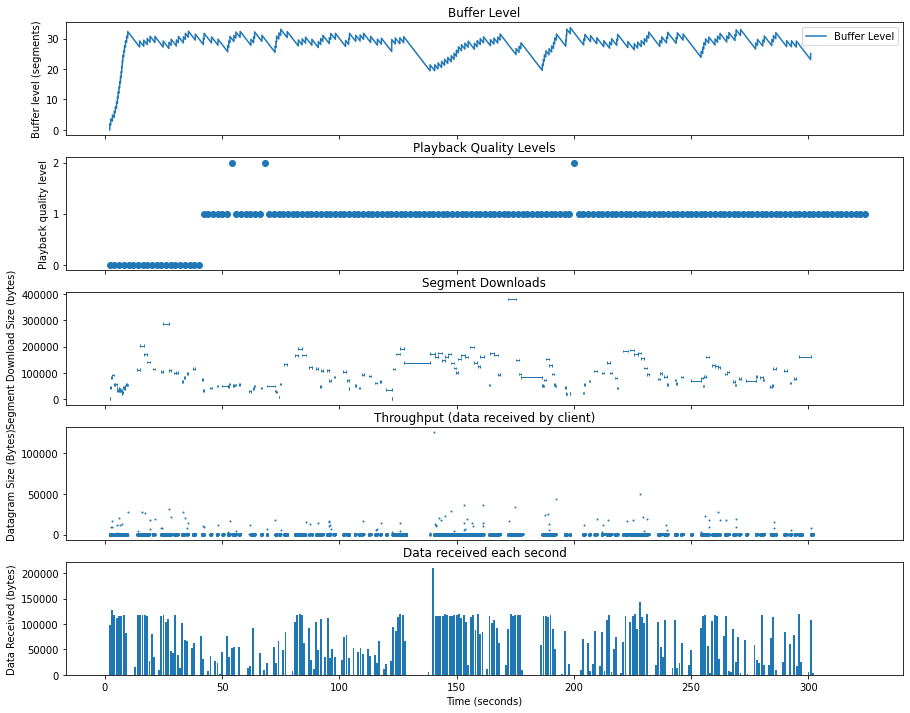



festive over QUIC @ 2Mbps with 0.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.045


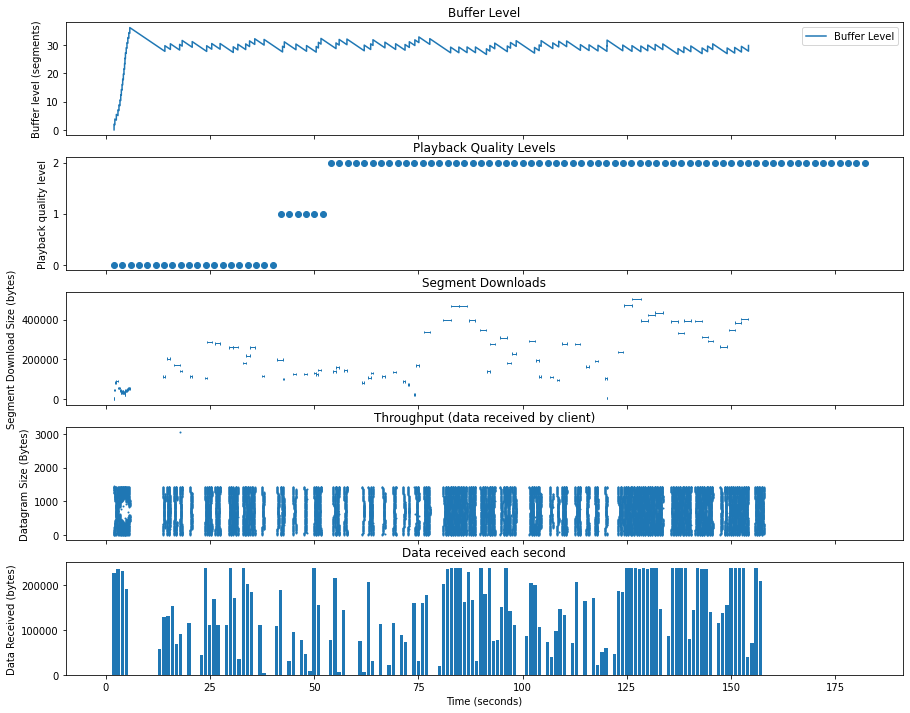



festive over QUIC @ 2Mbps with 0.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.045


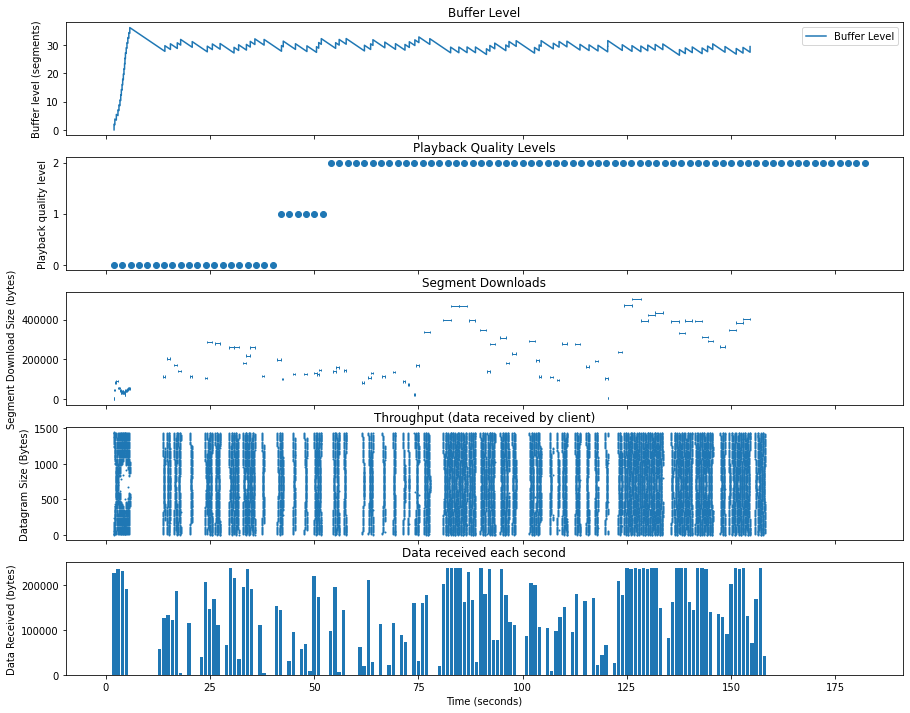



festive over QUIC @ 2Mbps with 1.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.045


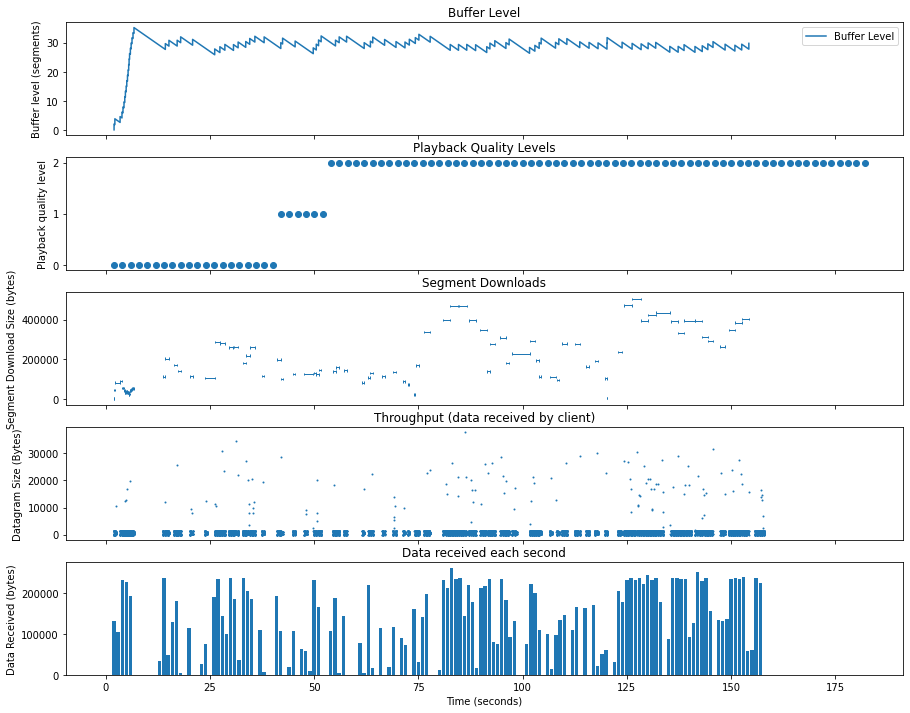



festive over QUIC @ 2Mbps with 5.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 326.045


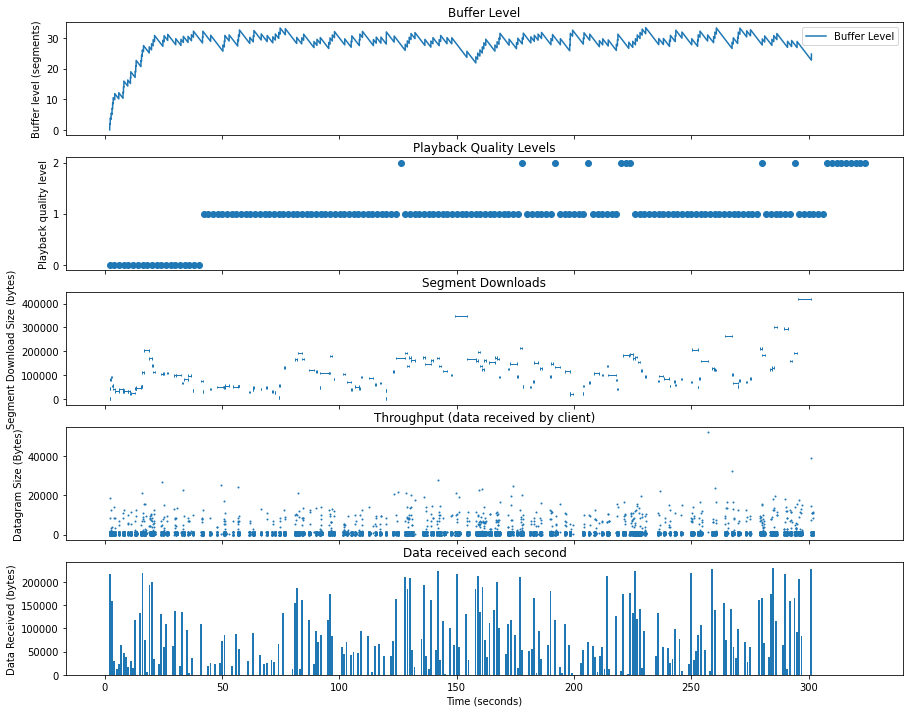

In [49]:
# Timelines for each FESTIVE, QUIC run-through (with error)
def isFestiveWith90Segments(sim):
    return quicSimulationHas90Segments(sim) and sim.algo == 'festive'

def isFestiveWith50Segments(sim):
    return quicSimulationHas50Segments(sim) and sim.algo == 'festive'


for quicSim in findSimulations(quicLossDir, isFestiveWith90Segments):
    quicTitle = getDescription(quicSim)
    print (quicTitle)
    graphFullTimeline(quicSim)
    print ("\n")

tobasco over QUIC @ 500Kbps with 0.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 306.097


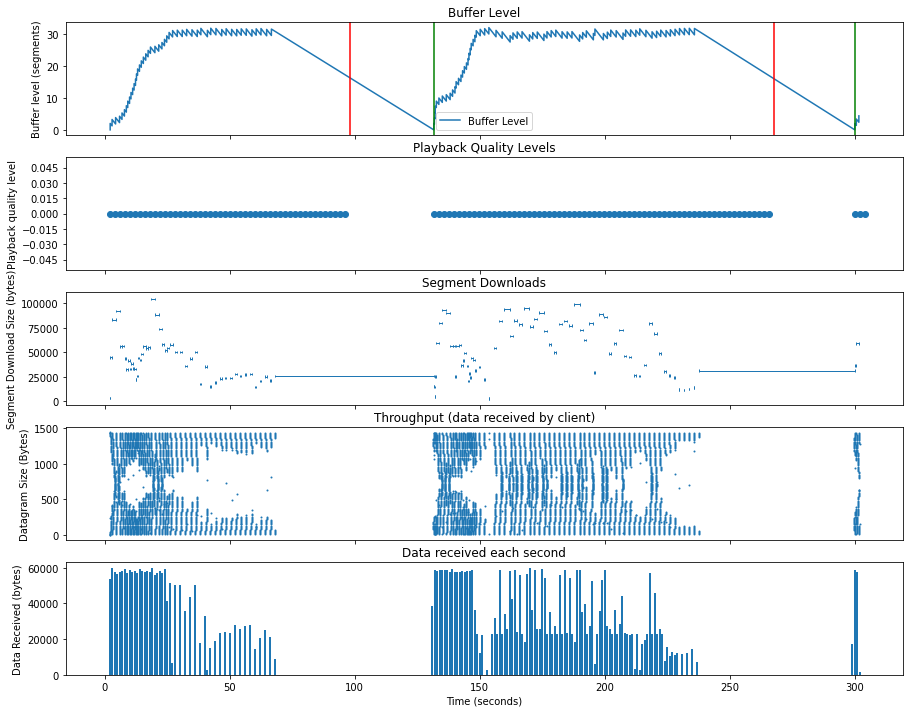



tobasco over QUIC @ 500Kbps with 0.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 309.613


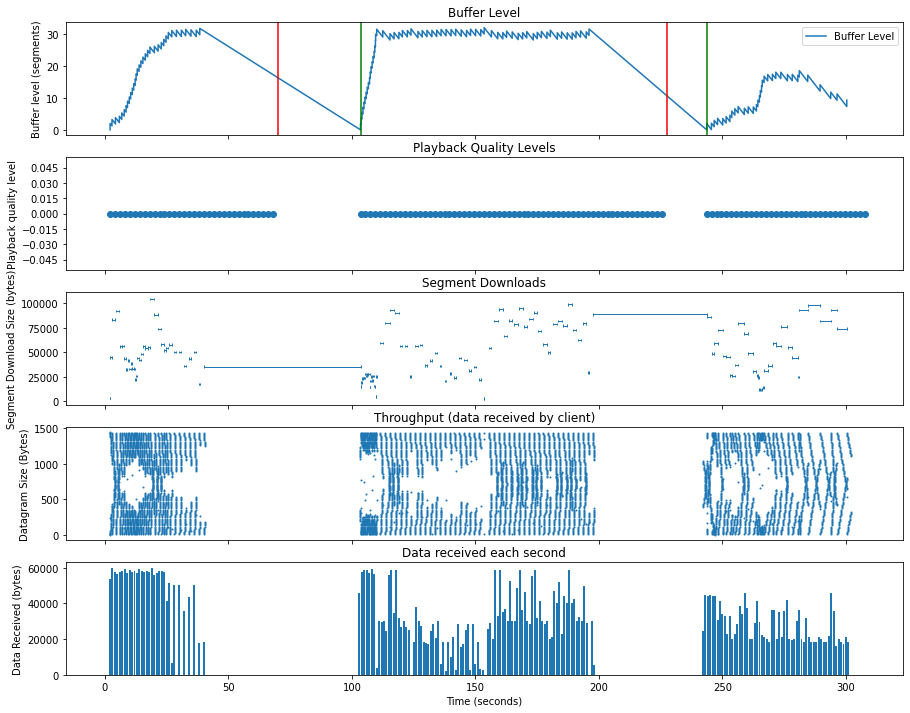



tobasco over QUIC @ 500Kbps with 1.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 330.123


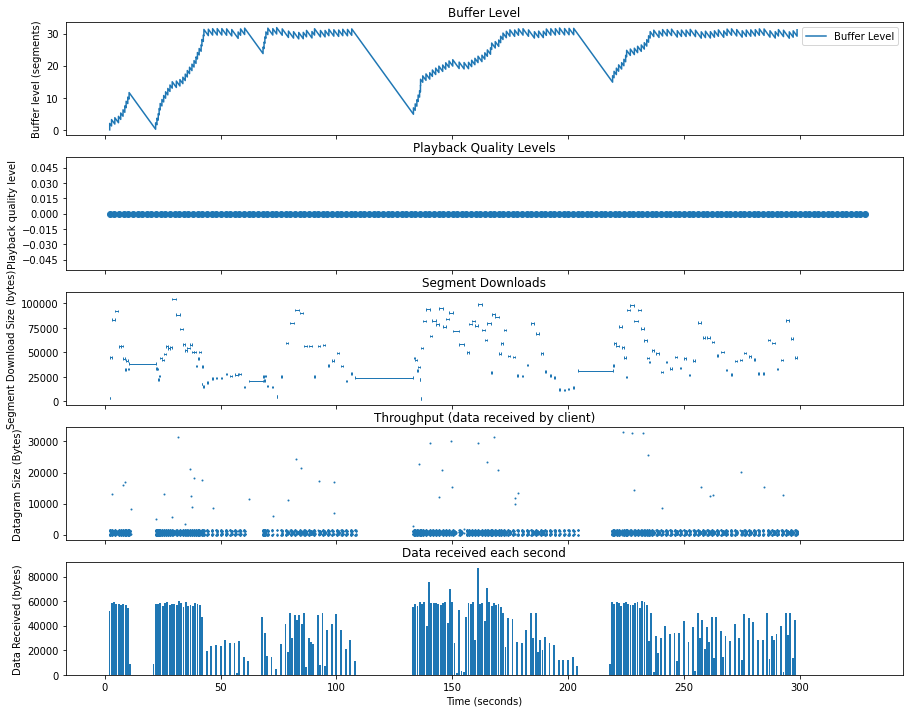



tobasco over QUIC @ 500Kbps with 1.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 212.618


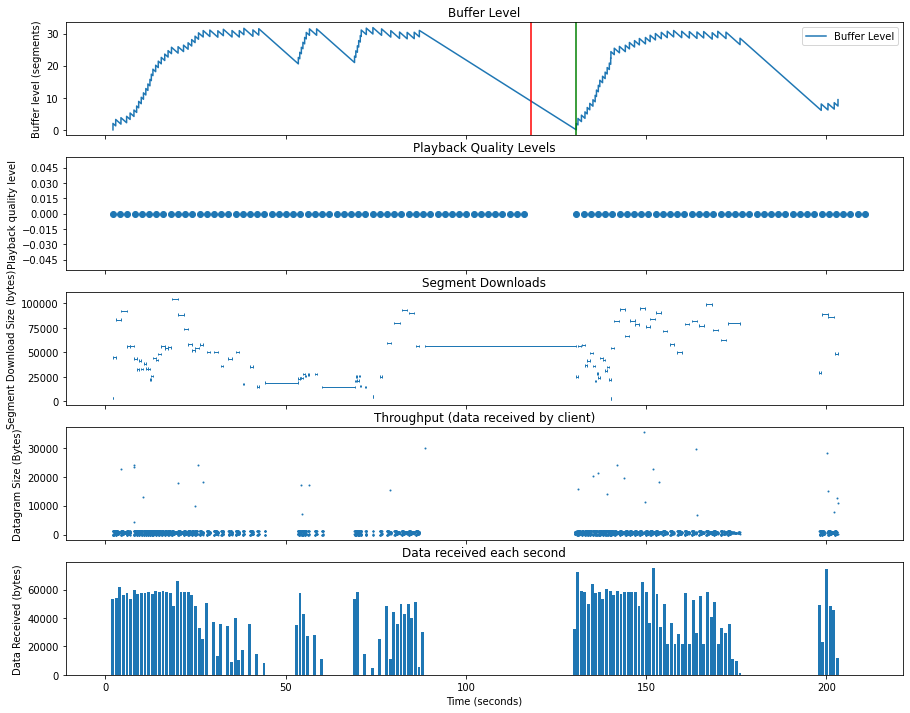



tobasco over QUIC @ 1Mbps with 0.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 308.761


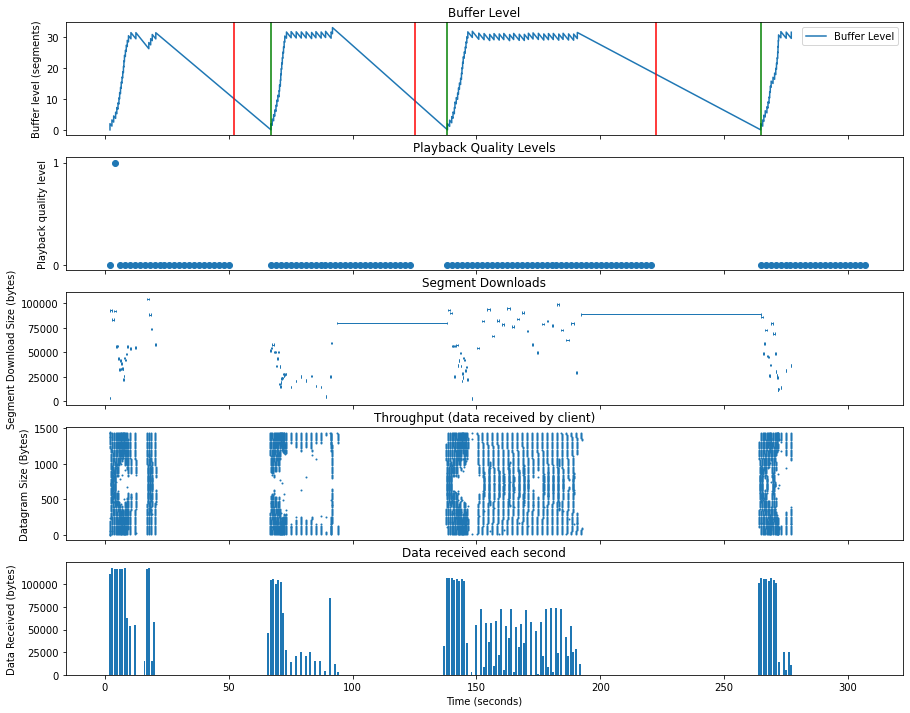



tobasco over QUIC @ 1Mbps with 1.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 269.649


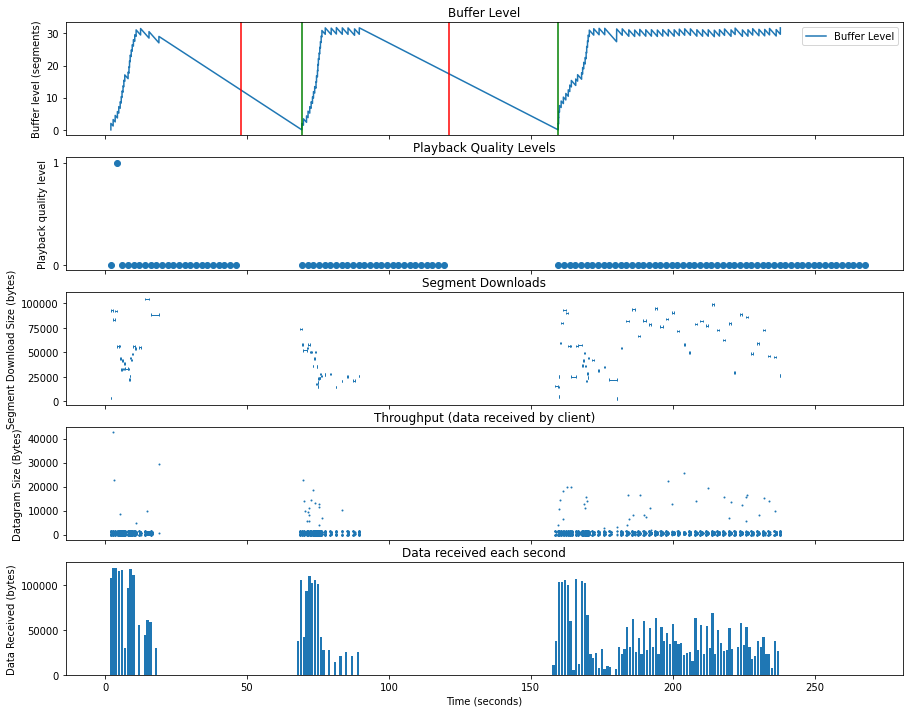



tobasco over QUIC @ 2Mbps with 0.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 286.045


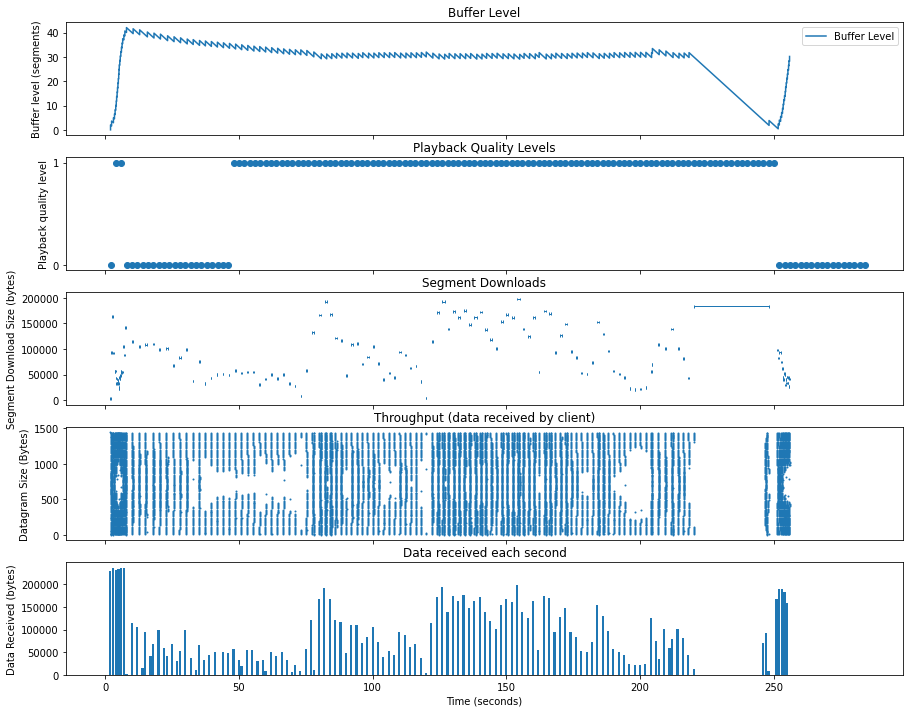



tobasco over QUIC @ 2Mbps with 1.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 196.045


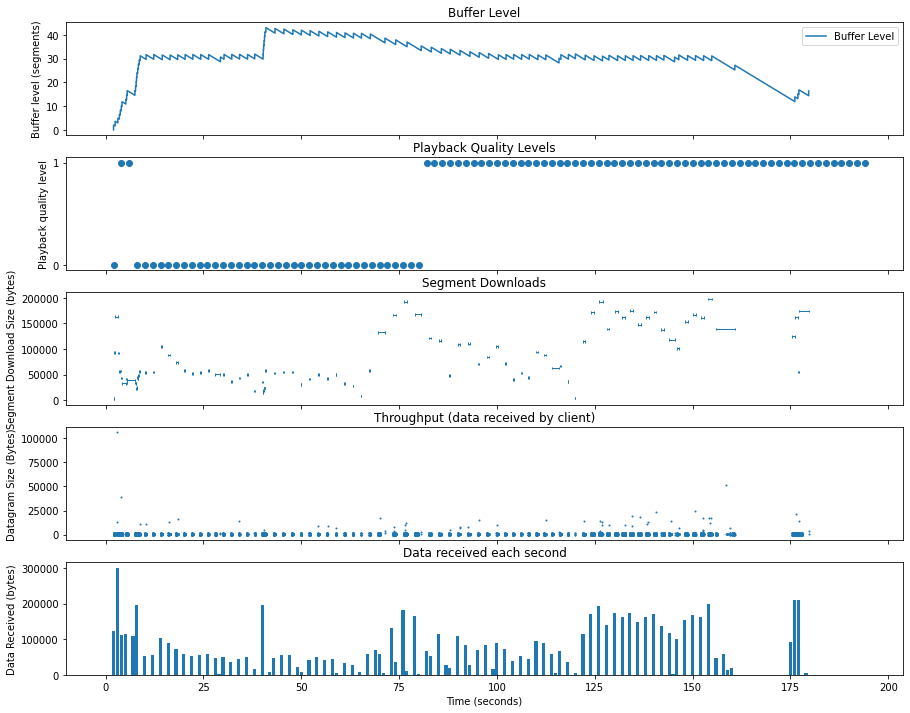



tobasco over QUIC @ 2Mbps with 2.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 332.045


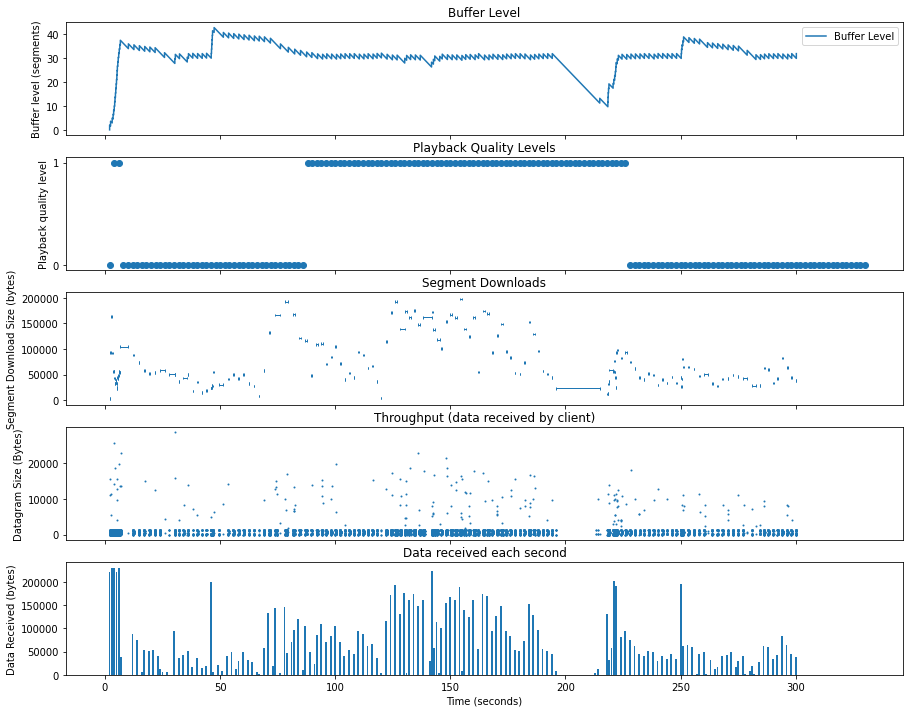



tobasco over QUIC @ 2Mbps with 2.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 264.045


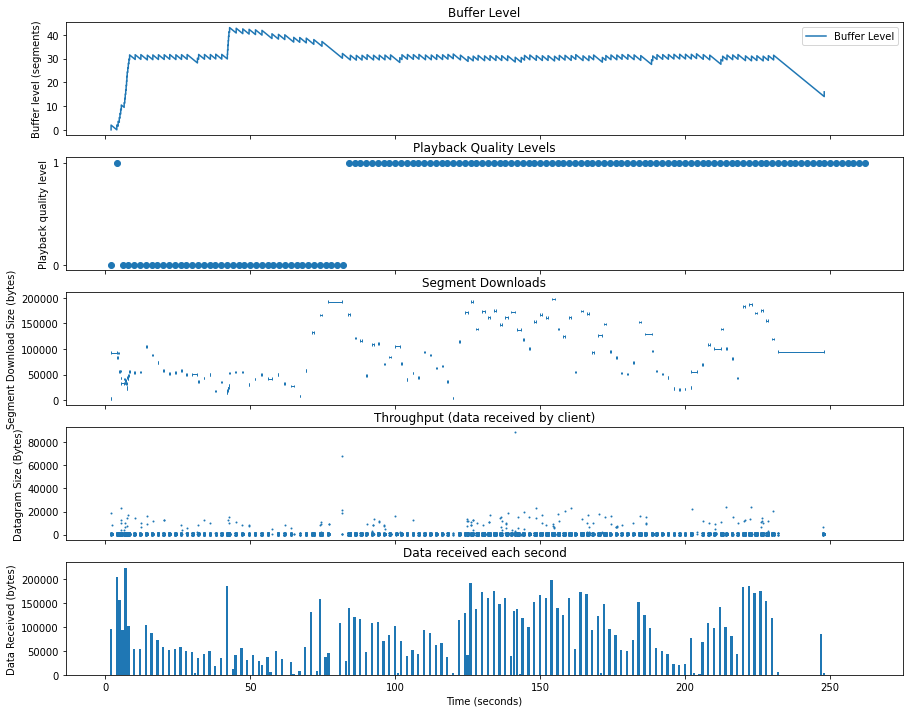



tobasco over QUIC @ 3Mbps with 0.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.041


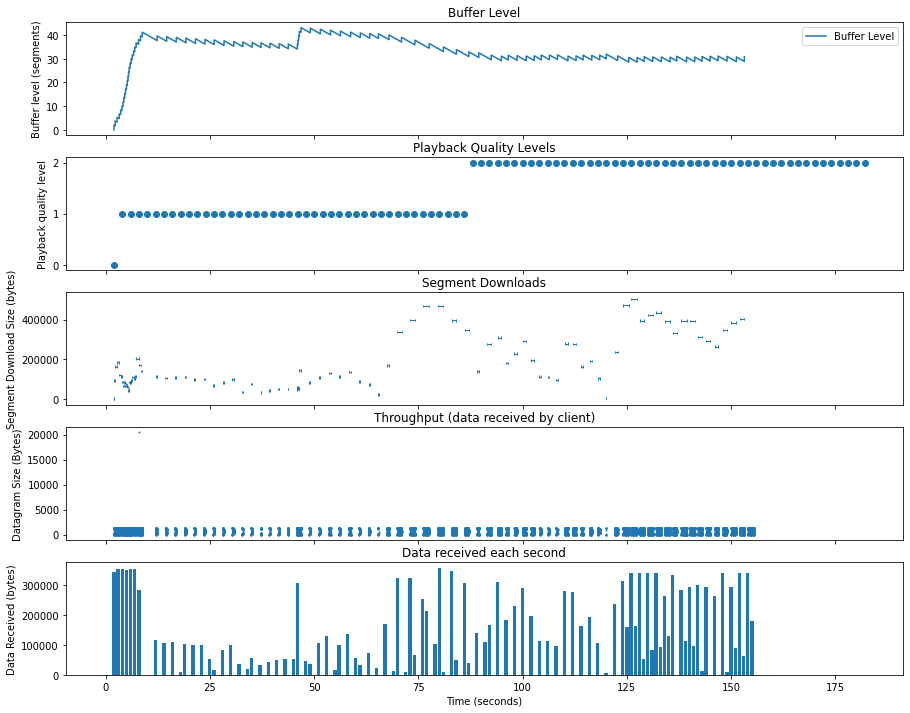



tobasco over QUIC @ 3Mbps with 0.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.041


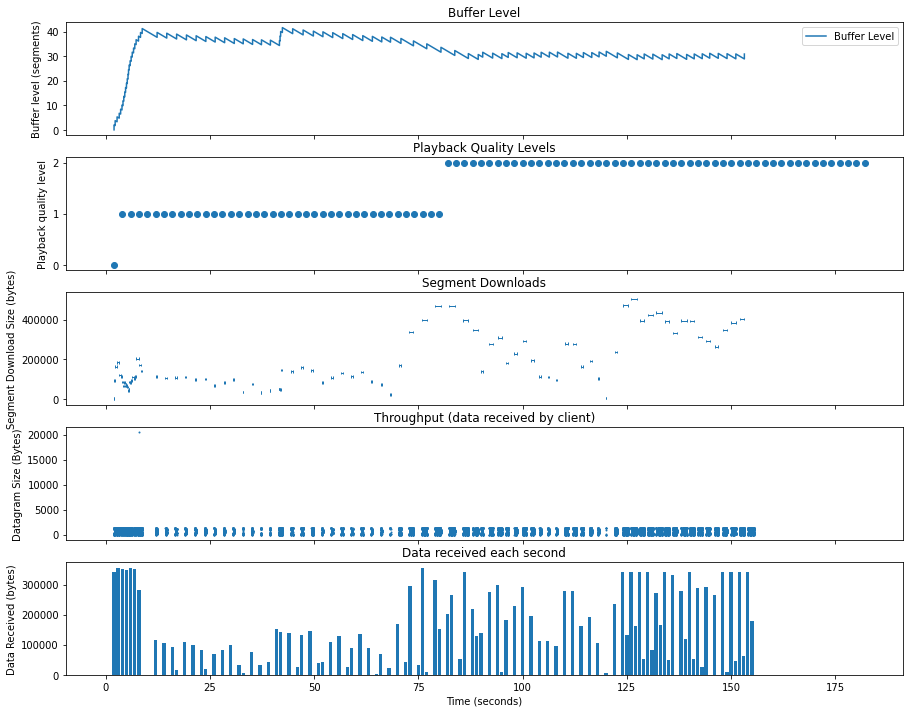



tobasco over QUIC @ 3Mbps with 1.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.041


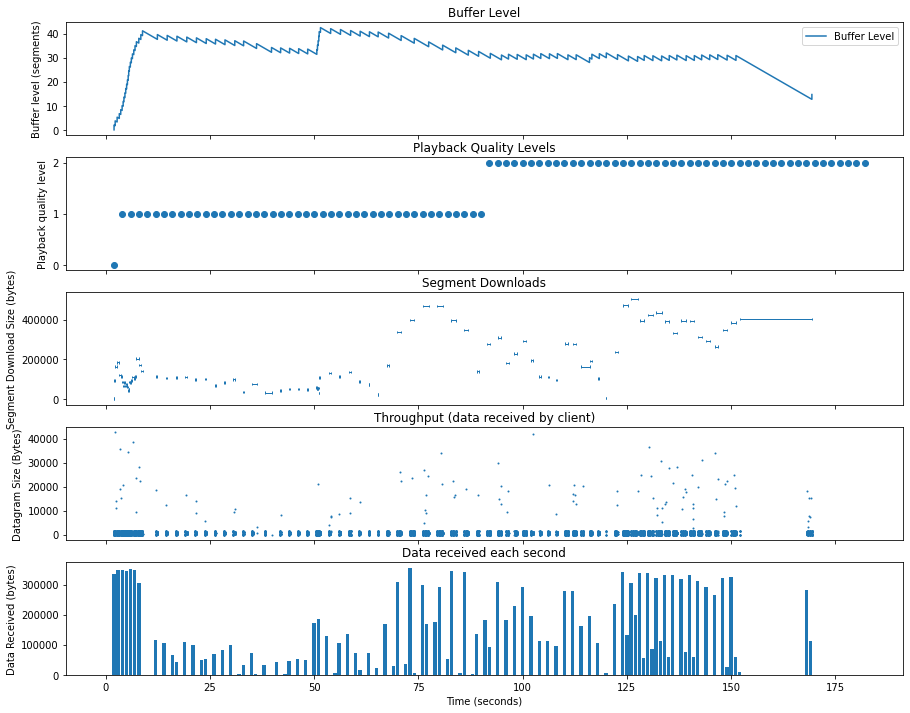



tobasco over QUIC @ 3Mbps with 2.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 332.041


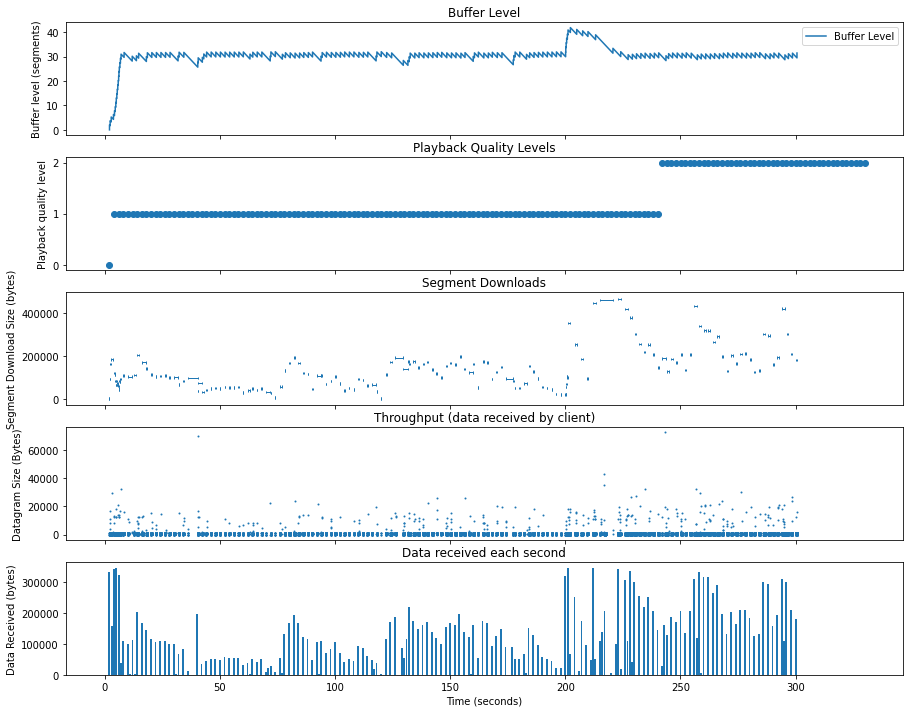



tobasco over QUIC @ 3Mbps with 5.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 332.041


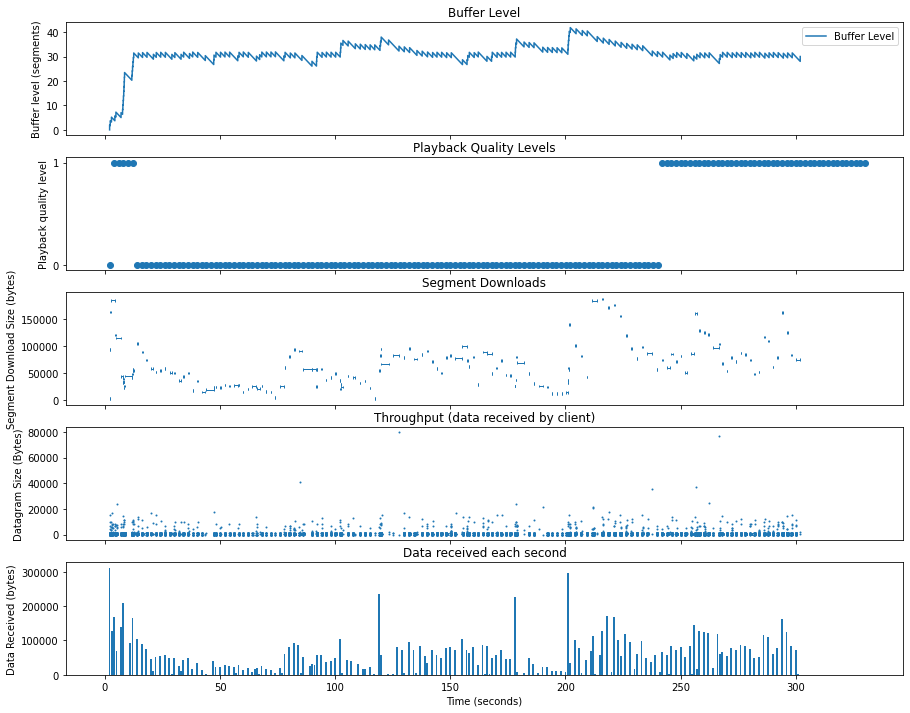



tobasco over QUIC @ 5Mbps with 5.0% loss (with pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 184.036


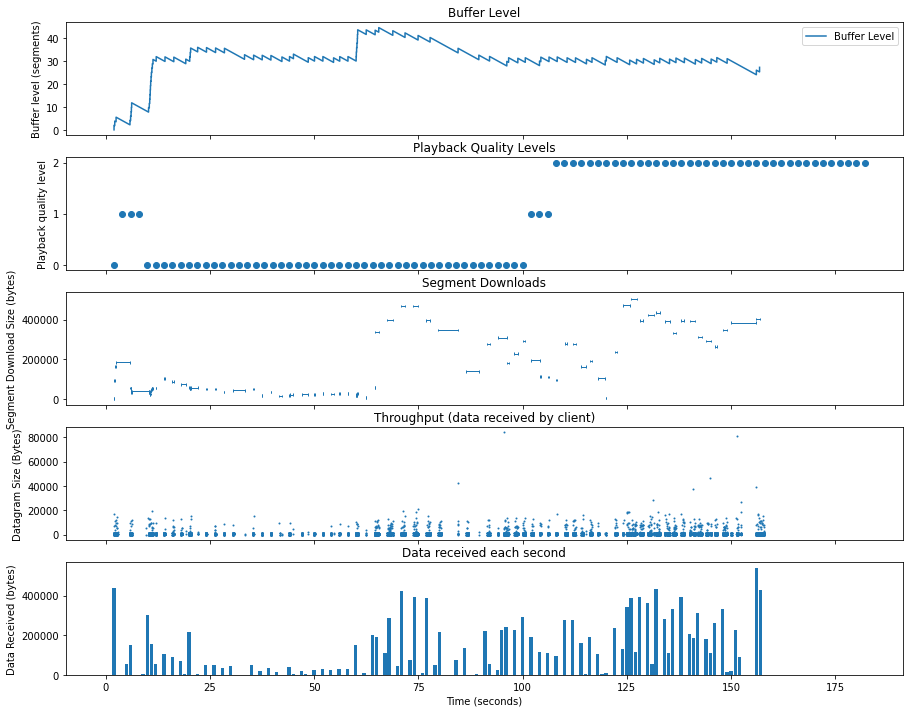



tobasco over QUIC @ 5Mbps with 5.0% loss (no pacing)
Malformed buffer underflow log. Likely that QUIC failed near time 332.035


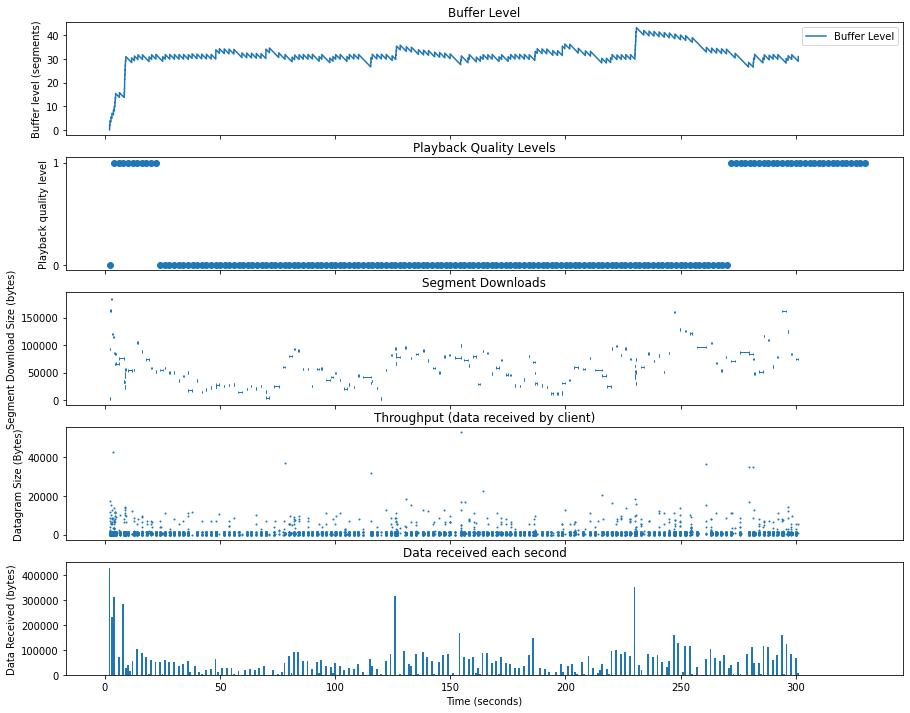

In [50]:
def isTobascoWith90Segments(sim):
    return quicSimulationHas90Segments(sim) and sim.algo == 'tobasco'


# Timelines for each Tobasco, QUIC run-through (with error)
for quicSim in findSimulations(quicLossDir, isTobascoWith90Segments):
    quicTitle = getDescription(quicSim)
    print (quicTitle)
    graphFullTimeline(quicSim)
    print ("\n")

tobasco over QUIC @ 500Kbps with 0% loss (with pacing)  vs.  tobasco over TCP @ 500Kbps with 0% loss (with pacing)


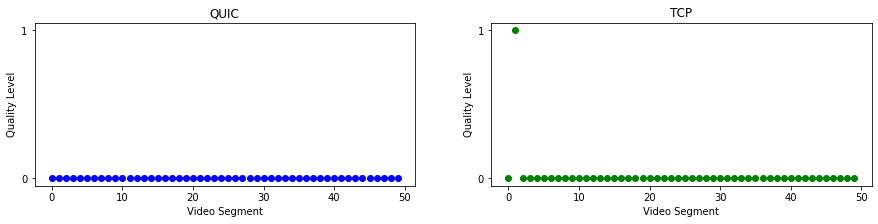

tobasco over QUIC @ 500Kbps with 0% loss (no pacing)  vs.  tobasco over TCP @ 500Kbps with 0% loss (no pacing)


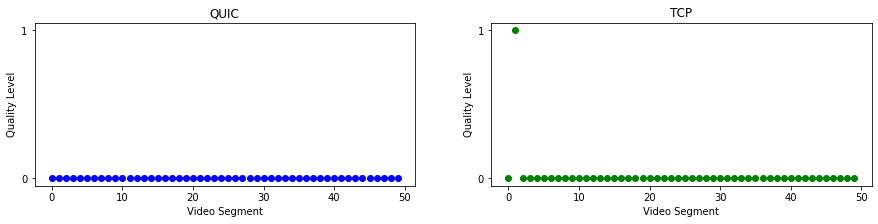

tobasco over QUIC @ 1Mbps with 0% loss (no pacing)  vs.  tobasco over TCP @ 1Mbps with 0% loss (no pacing)


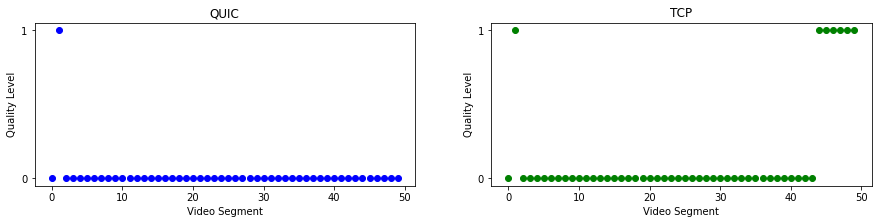

tobasco over QUIC @ 2Mbps with 0% loss (with pacing)  vs.  tobasco over TCP @ 2Mbps with 0% loss (with pacing)


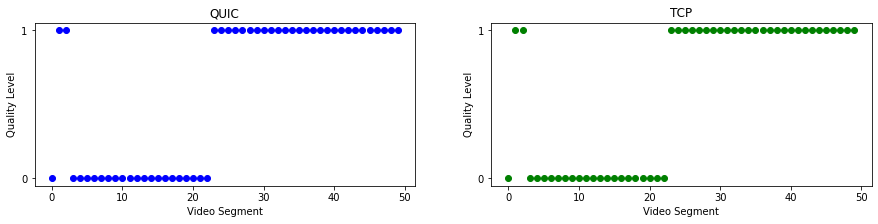

tobasco over QUIC @ 3Mbps with 0% loss (with pacing)  vs.  tobasco over TCP @ 3Mbps with 0% loss (with pacing)


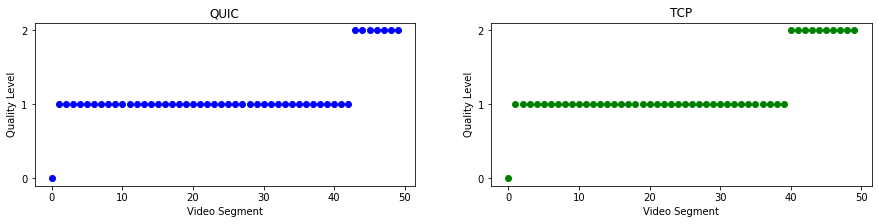

tobasco over QUIC @ 3Mbps with 0% loss (no pacing)  vs.  tobasco over TCP @ 3Mbps with 0% loss (no pacing)


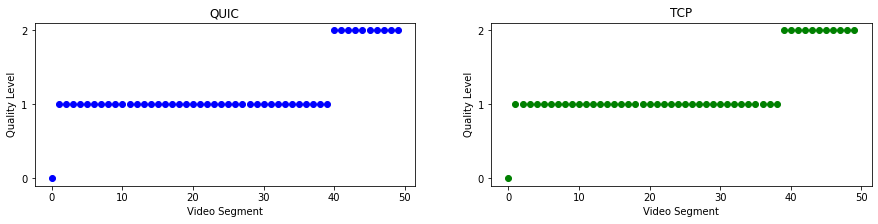

tobasco over QUIC @ 4Mbps with 0% loss (no pacing)  vs.  tobasco over TCP @ 4Mbps with 0% loss (no pacing)


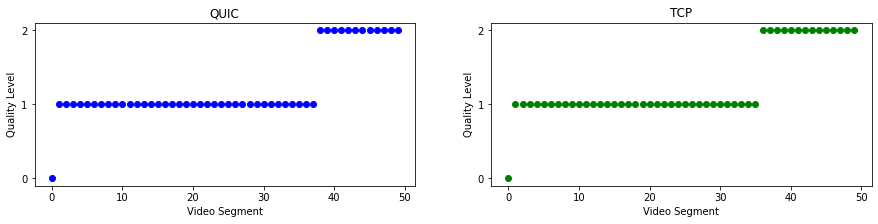

In [51]:
# Compare all the quality levels for tobasco with no loss
for (quicSim, tcpSim) in findSimulationPairs(quicDataDir, isTobascoWith90Segments):
    quicTitle = getDescription(quicSim)
    tcpTitle = getDescription(tcpSim)
    
    print (quicTitle, " vs. ", tcpTitle)
    compareAdaptationLevelsSeparate (quicSim, tcpSim, 'QUIC', 'TCP')

festive over QUIC @ 500Kbps with 0% loss (with pacing)  vs.  festive over TCP @ 500Kbps with 0% loss (with pacing)


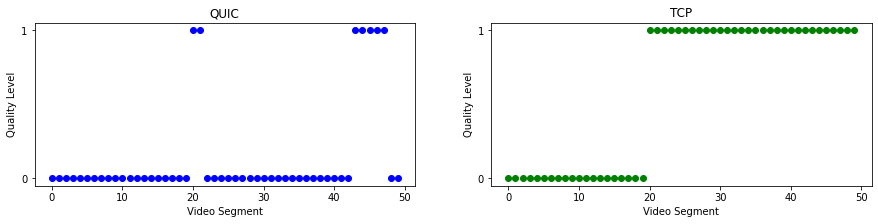

festive over QUIC @ 500Kbps with 0% loss (no pacing)  vs.  festive over TCP @ 500Kbps with 0% loss (no pacing)


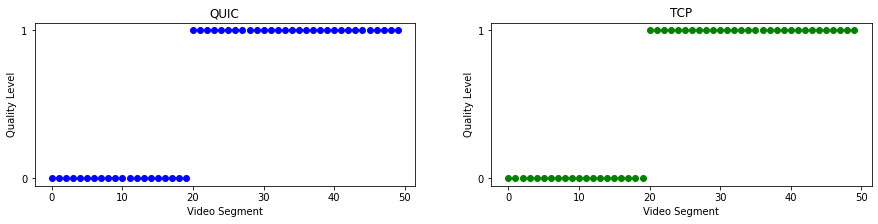

festive over QUIC @ 1Mbps with 0% loss (with pacing)  vs.  festive over TCP @ 1Mbps with 0% loss (with pacing)


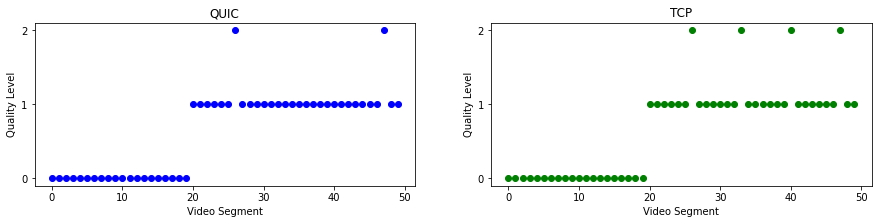

festive over QUIC @ 2Mbps with 0% loss (with pacing)  vs.  festive over TCP @ 2Mbps with 0% loss (with pacing)


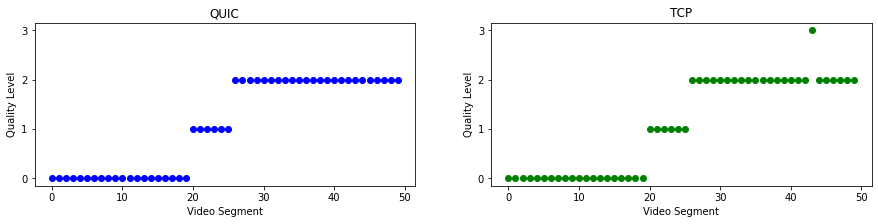

festive over QUIC @ 2Mbps with 0% loss (no pacing)  vs.  festive over TCP @ 2Mbps with 0% loss (no pacing)


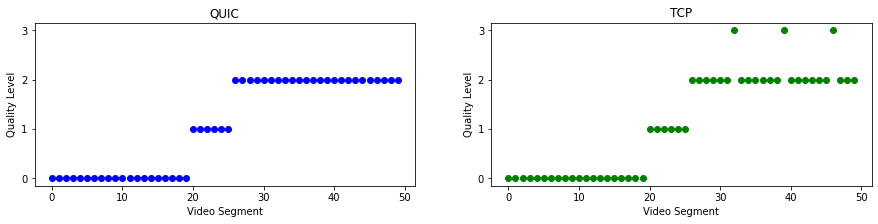

In [52]:
# Compare all the quality levels for festive with loss
for (quicSim, tcpSim) in findSimulationPairs(quicDataDir, isFestiveWith90Segments):
    quicTitle = getDescription(quicSim)
    tcpTitle = getDescription(tcpSim)
    
    print (quicTitle, " vs. ", tcpTitle)
    compareAdaptationLevelsSeparate (quicSim, tcpSim, 'QUIC', 'TCP')    

## Festive Efficiency Graphs

No loss comparisons
festive over QUIC @ 500Kbps with 0% loss (with pacing)  vs. TCP analog


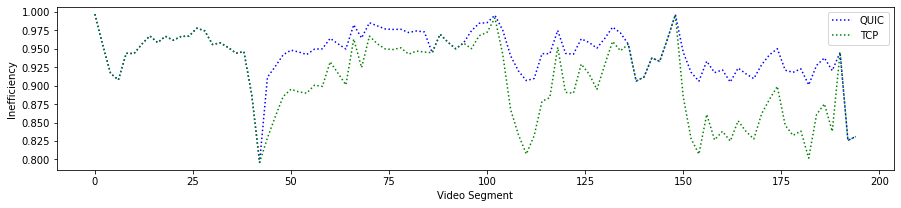

festive over QUIC @ 500Kbps with 0% loss (no pacing)  vs. TCP analog


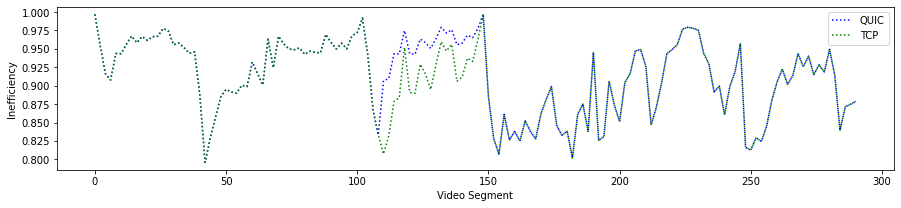

festive over QUIC @ 1Mbps with 0% loss (with pacing)  vs. TCP analog


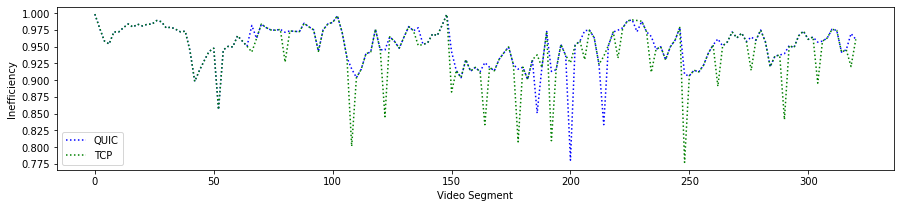

festive over QUIC @ 2Mbps with 0% loss (with pacing)  vs. TCP analog


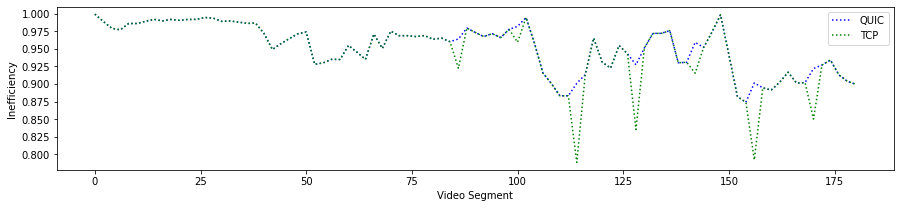

festive over QUIC @ 2Mbps with 0% loss (no pacing)  vs. TCP analog


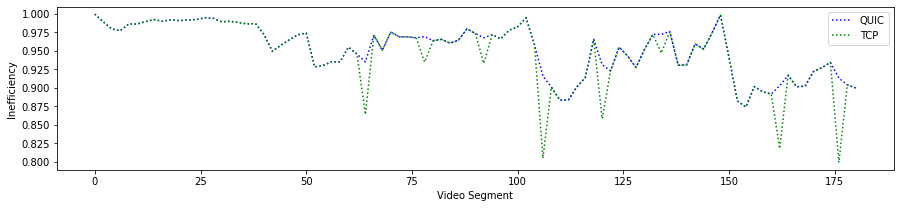

In [14]:
print ('No loss comparisons')
for (quicSim, tcpSim) in findSimulationPairs(quicDataDir, isFestiveWith90Segments):
    print (getDescription(quicSim), " vs. TCP analog")
    compareEfficiencyOverlay(quicSim, tcpSim, 'QUIC', 'TCP')

With loss comparisons
festive over QUIC @ 500Kbps with 0.0% loss (with pacing)  vs. TCP analog


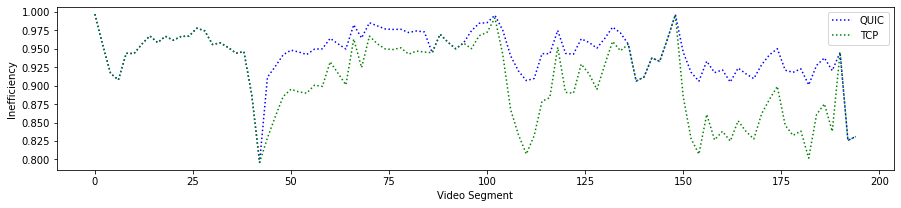

festive over QUIC @ 500Kbps with 0.0% loss (no pacing)  vs. TCP analog


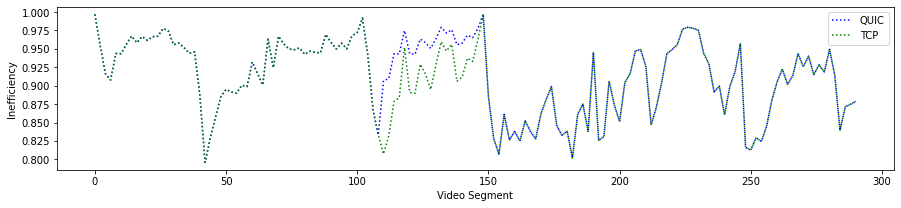

festive over QUIC @ 500Kbps with 1.0% loss (with pacing)  vs. TCP analog


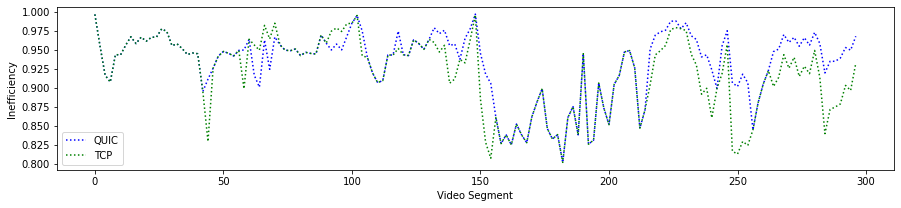

festive over QUIC @ 500Kbps with 1.0% loss (no pacing)  vs. TCP analog


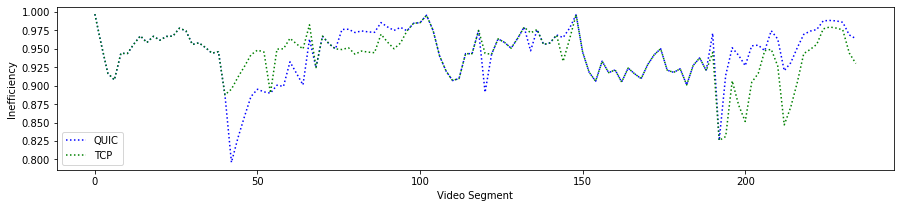

festive over QUIC @ 1Mbps with 0.0% loss (with pacing)  vs. TCP analog


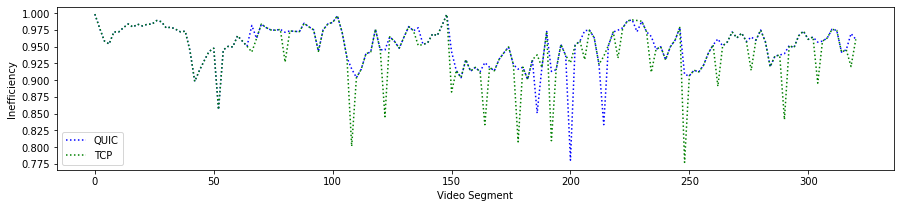

festive over QUIC @ 1Mbps with 1.0% loss (with pacing)  vs. TCP analog


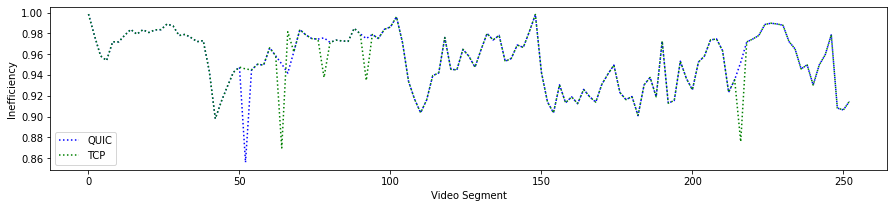

festive over QUIC @ 1Mbps with 1.0% loss (no pacing)  vs. TCP analog


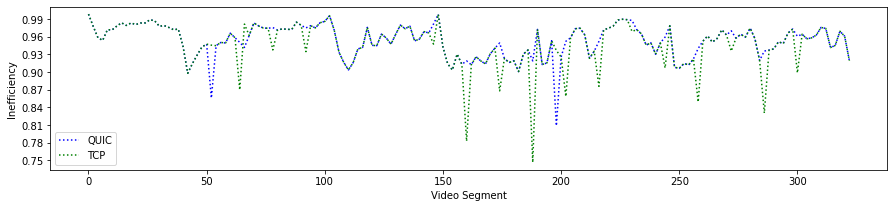

festive over QUIC @ 2Mbps with 0.0% loss (with pacing)  vs. TCP analog


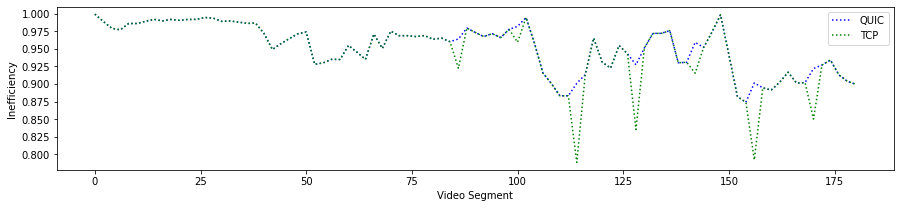

festive over QUIC @ 2Mbps with 0.0% loss (no pacing)  vs. TCP analog


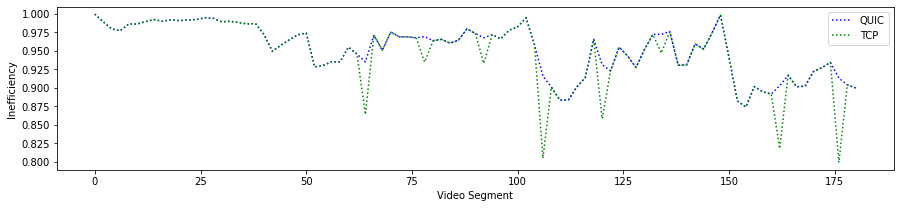

festive over QUIC @ 2Mbps with 1.0% loss (no pacing)  vs. TCP analog


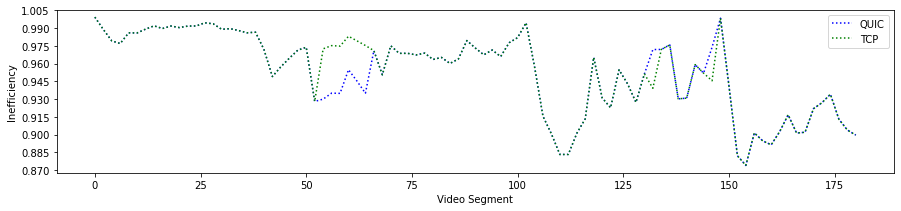

festive over QUIC @ 2Mbps with 5.0% loss (no pacing)  vs. TCP analog


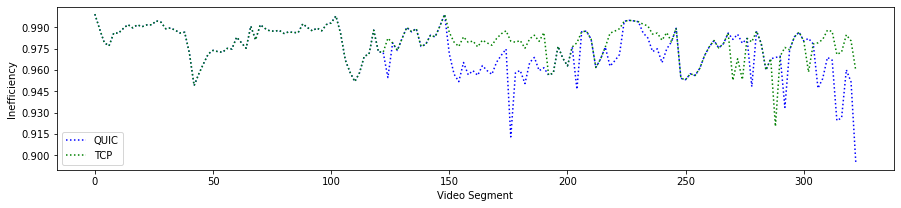

In [15]:
print ('With loss comparisons')
for (quicSim, tcpSim) in findSimulationPairs(quicLossDir, isFestiveWith90Segments):
    print (getDescription(quicSim), " vs. TCP analog")
    compareEfficiencyOverlay(quicSim, tcpSim, 'QUIC', 'TCP')

## Festive Stability Graphs

No loss stability comparisons
festive over QUIC @ 500Kbps with 0% loss (with pacing)  vs. TCP analog


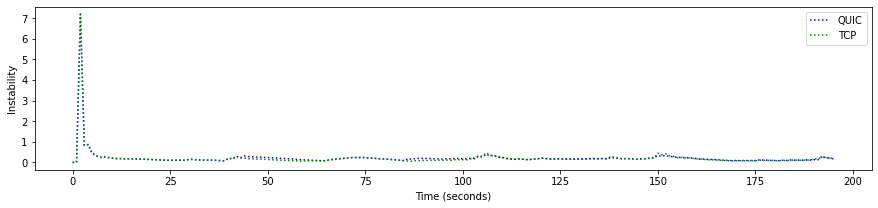

festive over QUIC @ 500Kbps with 0% loss (no pacing)  vs. TCP analog


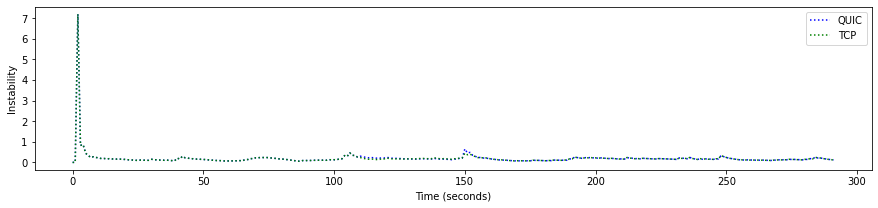

festive over QUIC @ 1Mbps with 0% loss (with pacing)  vs. TCP analog


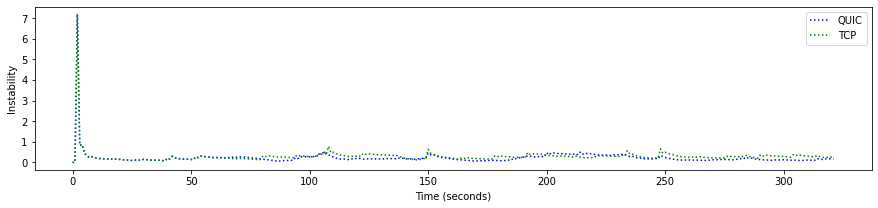

festive over QUIC @ 2Mbps with 0% loss (with pacing)  vs. TCP analog


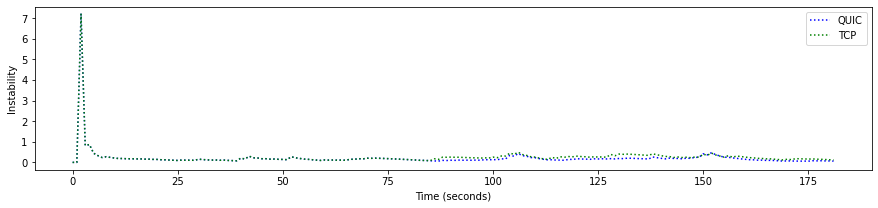

festive over QUIC @ 2Mbps with 0% loss (no pacing)  vs. TCP analog


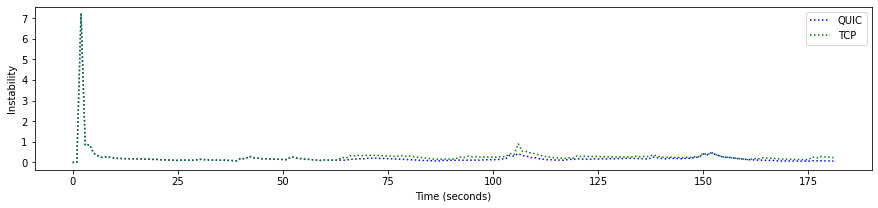

In [16]:
print ('No loss stability comparisons')
for (quicSim, tcpSim) in findSimulationPairs(quicDataDir, isFestiveWith90Segments):
    print (getDescription(quicSim), " vs. TCP analog")
    compareStabilityOverlay(quicSim, tcpSim, 'QUIC', 'TCP')

Lossy simulation stability comparisons
festive over QUIC @ 500Kbps with 0.0% loss (with pacing)  vs. TCP analog


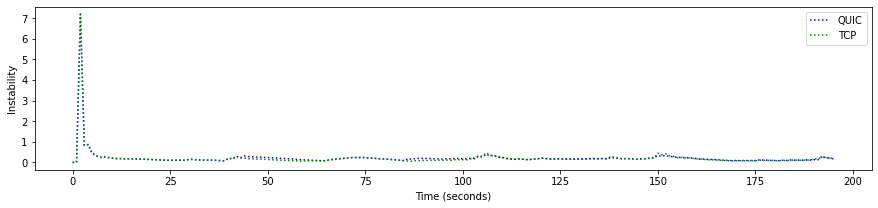

festive over QUIC @ 500Kbps with 0.0% loss (no pacing)  vs. TCP analog


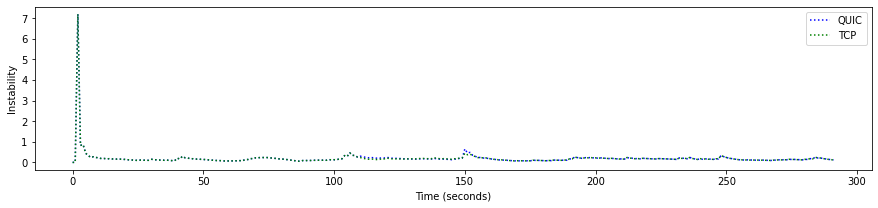

festive over QUIC @ 500Kbps with 1.0% loss (with pacing)  vs. TCP analog


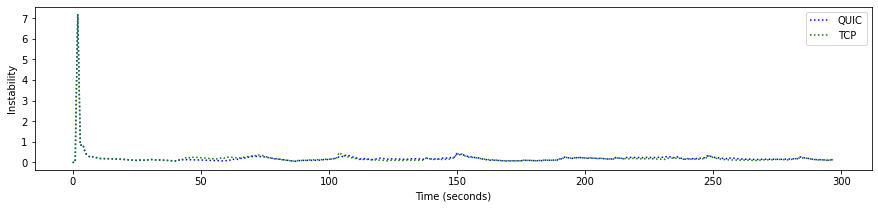

festive over QUIC @ 500Kbps with 1.0% loss (no pacing)  vs. TCP analog


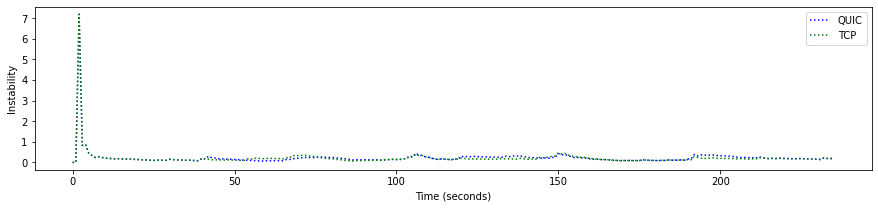

festive over QUIC @ 1Mbps with 0.0% loss (with pacing)  vs. TCP analog


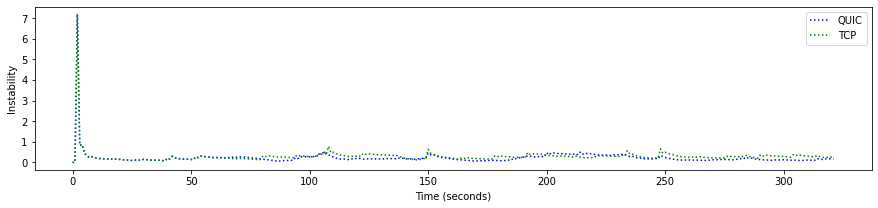

festive over QUIC @ 1Mbps with 1.0% loss (with pacing)  vs. TCP analog


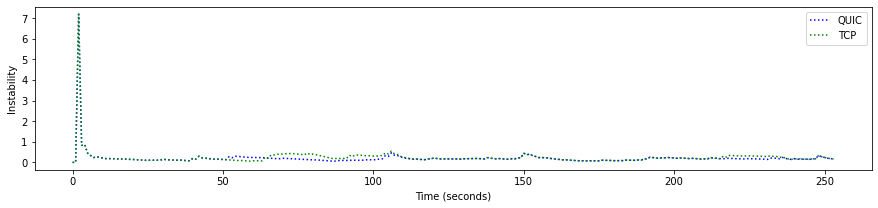

festive over QUIC @ 1Mbps with 1.0% loss (no pacing)  vs. TCP analog


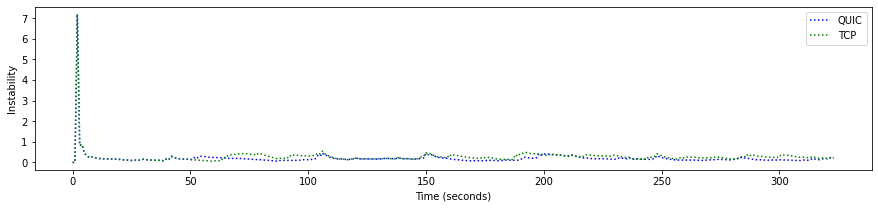

festive over QUIC @ 2Mbps with 0.0% loss (with pacing)  vs. TCP analog


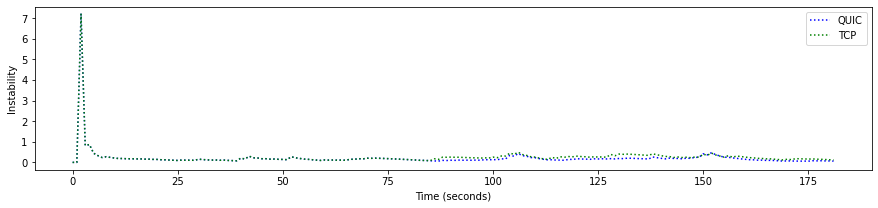

festive over QUIC @ 2Mbps with 0.0% loss (no pacing)  vs. TCP analog


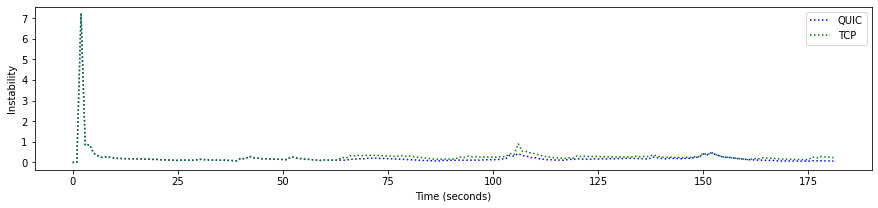

festive over QUIC @ 2Mbps with 1.0% loss (no pacing)  vs. TCP analog


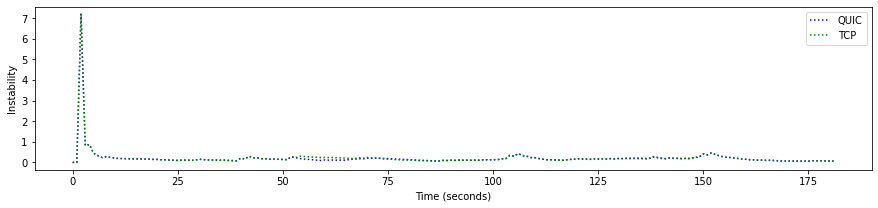

festive over QUIC @ 2Mbps with 5.0% loss (no pacing)  vs. TCP analog


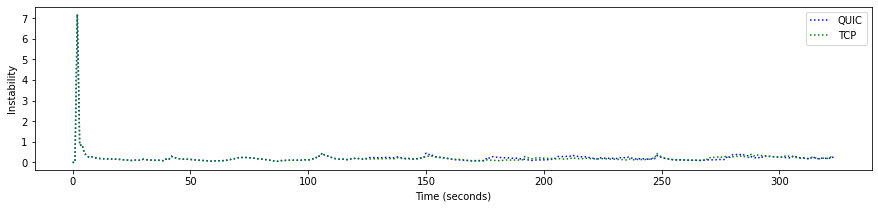

In [17]:
print ('Lossy simulation stability comparisons')
for (quicSim, tcpSim) in findSimulationPairs(quicLossDir, isFestiveWith50Segments):
    print (getDescription(quicSim), " vs. TCP analog")
    compareStabilityOverlay(quicSim, tcpSim, 'QUIC', 'TCP')

# Count simulations with number of segments over a certain size 

In [42]:
for count in [50, 60]:
    festiveSims = findSimulationsWithMinSegCount(quicLossDir + 'festive\\', count)
    festiveN = len(festiveSims)
    print ('{} Festive simulations with at least {} segments'.format(festiveN, count))
    for sim in festiveSims:
        print ('\t', getDescription(sim)[20:])
    
    print()
    
    tobascoSims = findSimulationsWithMinSegCount(quicLossDir + 'tobasco\\', count)
    tobascoN = len(tobascoSims)
    print ('{} Tobasco simulations with at least {} segments'.format(tobascoN, count))    
    for sim in tobascoSims:
        print ('\t', getDescription(sim)[20:])
    
    print('\n')

21 Festive simulations with at least 50 segments
	 500Kbps with 0.0% loss (with pacing)
	 500Kbps with 0.0% loss (no pacing)
	 500Kbps with 1.0% loss (with pacing)
	 500Kbps with 1.0% loss (no pacing)
	 1Mbps with 0.0% loss (with pacing)
	 1Mbps with 0.0% loss (no pacing)
	 1Mbps with 1.0% loss (with pacing)
	 1Mbps with 1.0% loss (no pacing)
	 1Mbps with 2.0% loss (with pacing)
	 1Mbps with 5.0% loss (with pacing)
	 2Mbps with 0.0% loss (with pacing)
	 2Mbps with 0.0% loss (no pacing)
	 2Mbps with 1.0% loss (with pacing)
	 2Mbps with 1.0% loss (no pacing)
	 2Mbps with 2.0% loss (no pacing)
	 2Mbps with 5.0% loss (no pacing)
	 3Mbps with 2.0% loss (no pacing)
	 3Mbps with 10.0% loss (with pacing)
	 5Mbps with 2.0% loss (with pacing)
	 5Mbps with 5.0% loss (with pacing)
	 5Mbps with 5.0% loss (no pacing)

30 Tobasco simulations with at least 50 segments
	 500Kbps with 0.0% loss (with pacing)
	 500Kbps with 0.0% loss (no pacing)
	 500Kbps with 1.0% loss (with pacing)
	 500Kbps with 1.0% 

## Compute Averages for different categories of data

In [269]:
# We want to compute averages for stability, efficiency, quality level, quality switches, and rebuffering events over
# 1. Festive vs Tobasco
# 2. Each loss rate
# 3. Each bit rate

def isFestive(sim):
    return sim.algo == 'festive'

def isTobasco(sim):
    return sim.algo == 'tobasco'

def isNonZeroLoss(sim):
    return sim.errRate > 0

def isLossRate(sim, lossRate): # TODO comparing floats is scary.. Check that this is working properly
    return sim.errRate == lossRate

def isDataRate(sim, rate):
    return sim.rateVal == rate

In [470]:
# Number of quality changes in first 50 segments of each simulation
def countQualityChangesInGroupsFirst50(sims):
    return np.array([qualityChangeCount(sim, 50) for sim in sims])

# Graph boxplots of quality change counts for each group
def graphQualityChanges(simGroups, labels, subtitle):
    title = 'Quality Changes (' + subtitle + ')'
    
    # Get quality change counts for each simulation
    changes = [countQualityChangesInGroupsFirst50(group) for group in simGroups]
    
    fig, ax = plt.subplots(figsize=(3*len(simGroups),3))
    ax.set_title(title)
    ax.set_ylabel('Video Quality Changes')
    setIntegerYTickInterval(ax)
    _ = ax.boxplot(changes, labels=labels)

In [492]:
def meanQualityLevelInFirst50(sim):
    return meanQualityLevel(sim, 50)

def meanQualityLevelsInFirst50(sims):
    return np.array([meanQualityLevelInFirst50(sim) for sim in sims])

# Average Quality Level over first 50 segments of each simulation
def graphMeanQualityLevels(simGroups, labels, subtitle):
    title = 'Mean Selected Quality Level (' + subtitle + ')'
    
    qualities = [meanQualityLevelsInFirst50(group) for group in simGroups]
    
    fig, ax = plt.subplots(figsize=(3*len(simGroups),3))
    ax.set_title(title)
    ax.set_ylabel('Average Quality Level Selected')
    setIntegerYTickInterval(ax)
    _ = ax.boxplot(qualities, labels=labels)

In [290]:
def meanInefficiencyOverFirst50(sims):
    return np.array([meanInefficiency(sim, 50) for sim in sims])

# Average Inefficiency Score over first 50 segments of each simulation
def graphMeanInefficiency(simGroups, labels, subtitle):
    title = 'Mean Inefficiency Score (' + subtitle + ')'
    
    scores = [meanInefficiencyOverFirst50(group) for group in simGroups]
    
    fig, ax = plt.subplots(figsize=(3*len(simGroups),3))
    ax.set_title(title)
    ax.set_ylabel('Mean Inefficiency Score')
    setIntegerYTickInterval(ax)
    _ = ax.boxplot(scores, labels=labels)

In [304]:
def meanInstabilityOverFirst50(sims):
    # 100 seconds = 50 segments
    return [np.array(instabilityEachSecond(sim)[:100]).mean() for sim in sims]

def graphMeanInstability(simGroups, labels, subtitle):
    title = 'Mean Instability Score (' + subtitle + ')'
    
    scores = [meanInstabilityOverFirst50(group) for group in simGroups]
    
    fig, ax = plt.subplots(figsize=(3*len(simGroups),3))
    ax.set_title(title)
    ax.set_ylabel('Mean Instability Score')
    setIntegerYTickInterval(ax)
    _ = ax.boxplot(scores, labels=labels)

In [308]:
def rebufferEventsOverFirst50(sims):
    return [underflowCount(sim, 50) for sim in sims]

def graphRebufferingEvents(simGroups, labels, subtitle):
    title = 'Rebuffering Events (' + subtitle + ')'
    
    counts = [rebufferEventsOverFirst50(group) for group in simGroups]
    
    fig, ax = plt.subplots(figsize=(3*len(simGroups),3))
    ax.set_title(title)
    ax.set_ylabel('Rebuffering Events')
    setIntegerYTickInterval(ax)
    _ = ax.boxplot(counts, labels=labels)

In [436]:
# Load all the simulations
allQuicSims = findSimulationsWithMinSegCount(quicDataDir, 50) + findSimulationsWithMinSegCount(quicLossDir, 50)
allQuicSims = [sim for sim in allQuicSims if sim.algo != 'panda'] # Remove the few panda leftovers we have
allTcpSims = getTcpSimulations(allQuicSims)
allSimPairs = list(zip(allQuicSims, allTcpSims))

# Split simulations by algorithm
festiveQuicSims = [sim for sim in allQuicSims if isFestive(sim)]
festiveTcpSims = [sim for sim in allTcpSims if isFestive(sim)]
tobascoQuicSims = [sim for sim in allQuicSims if isTobasco(sim)]
tobascoTcpSims = [sim for sim in allTcpSims if isTobasco(sim)]

algoStrings = np.array(['FESTIVE', 'TOBASCO2'])
quicAlgoGroups = [festiveQuicSims, tobascoQuicSims]
tcpAlgoGroups = [festiveTcpSims, tobascoTcpSims]


# Split simulations by bit rate
# bitrateStrings = ['100Kbps', '500Kbps', '1Mbps', '2Mbps', '3Mbps', '4Mbps', '5Mbps']
bitrateStrings = ['500Kbps', '1Mbps', '2Mbps', '3Mbps', '5Mbps'] # THe latest simulation run used only these rates
bitrates = [bpsRateFromString(s) for s in bitrateStrings]
quicRateGroups = [[] for _ in bitrates]
tcpRateGroups = [[] for _ in bitrates]

for (quicSim, tcpSim) in allSimPairs:
    bitrate = quicSim.rateVal
    
    if bitrate not in bitrates:
        print ('Unsupported rate: ' + quicSim.rateStr)
        continue    
    
    index = bitrates.index(bitrate)    
    quicRateGroups[index].append(quicSim)
    tcpRateGroups[index].append(tcpSim)


# Split simulations by loss rate
lossRates = [0, .01, .02, .05, .1]
lossRateStrings = ["{}% loss".format(l * 100) for l in lossRates]
quicLossGroups = [[] for _ in lossRates]
tcpLossGroups = [[] for _ in lossRates]

for (quicSim, tcpSim) in allSimPairs:
    loss = quicSim.errRate
    index = lossRates.index(loss)
    
    quicLossGroups[index].append(quicSim)
    tcpLossGroups[index].append(tcpSim)

Unsupported rate: 100Kbps
Unsupported rate: 100Kbps
Unsupported rate: 100Kbps
Unsupported rate: 100Kbps
Unsupported rate: 4Mbps
Unsupported rate: 4Mbps


In [393]:
# Helper function to apply a graphing function over a set of simulation groups
def graphSplit(graphingFunc, descriptions, quicGroups, tcpGroups):

    for i in range(len(descriptions)):
        quicGroup = quicGroups[i]
        tcpGroup = tcpGroups[i]

        n = len(quicGroup)
        subtitle = '{}, n={}'.format(descriptions[i], n)

        graphingFunc([quicGroup, tcpGroup], ['QUIC', 'TCP'], subtitle)


    # Graph all the different groups for QUIC and TCP side-by-side
    graphingFunc(quicGroups, descriptions, 'QUIC')
    graphingFunc(tcpGroups, descriptions, 'TCP')

In [464]:
# Applies the aggregation function to every simulation and returns 
# the result as a pair of lists
def mapGroupPair(aggregate, quicGroup, tcpGroup):
    m1 = map(aggregate, quicGroup)
    m2 = map(aggregate, tcpGroup)
    return [list(m1), list(m2)]

def getPairedData(aggregate, quicSimGroups, tcpSimGroups):
    result = []
    for (quicGroup, tcpGroup) in zip(quicSimGroups, tcpSimGroups):
        quicData, tcpData = mapGroupPair(aggregate, quicGroup, tcpGroup)
        result.append((quicData, tcpData))

    return result

### Quality Change Graphs for each split

In [465]:
def countQualityChangesInFirst50(sim):
    return qualityChangeCount(sim, 50)

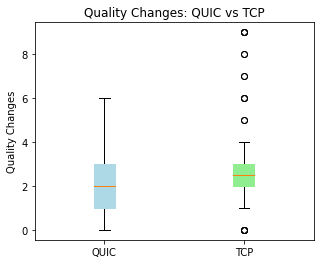

In [466]:
# QUIC/TCP
quicChangeCounts, tcpChangeCounts = mapGroupPair(countQualityChangesInFirst50, allQuicSims, allTcpSims)
graphPair(quicChangeCounts, tcpChangeCounts, 'Quality Changes', 'Quality Changes: QUIC vs TCP')

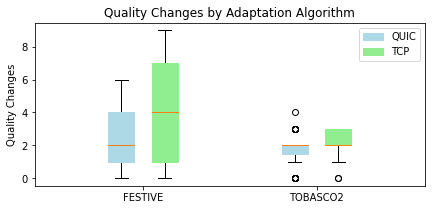

In [506]:
pairedAlgoChangeCounts = getPairedData(countQualityChangesInFirst50, quicAlgoGroups, tcpAlgoGroups)
title = 'Quality Changes by Adaptation Algorithm'
graphPairs(pairedAlgoChangeCounts, algoStrings, 'Quality Changes', title)

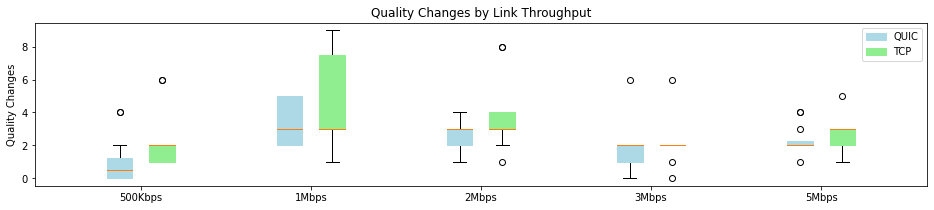

In [507]:
# Bitrate split
pairedRateChangeCounts = getPairedData(countQualityChangesInFirst50, quicRateGroups, tcpRateGroups)
title = 'Quality Changes by Link Throughput'
graphPairs(pairedRateChangeCounts, bitrateStrings, 'Quality Changes', title)

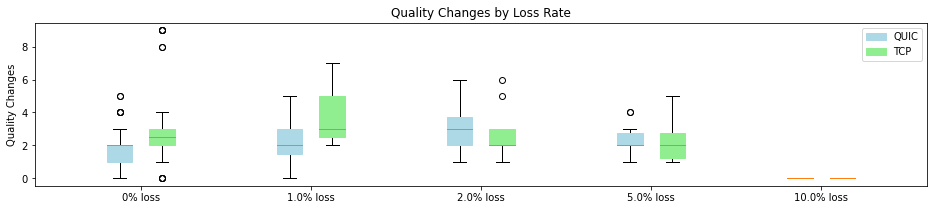

In [508]:
# Loss Rate Split
pairedLossChangeCounts = getPairedData(countQualityChangesInFirst50, quicLossGroups, tcpLossGroups)
title = 'Quality Changes by Loss Rate'
graphPairs(pairedLossChangeCounts, lossRateStrings, 'Quality Changes', title)

### Quality Level Graphs for each split

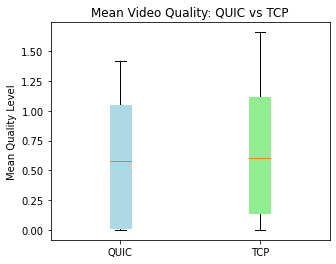

In [526]:
# QUIC/TCP
quicQualities, tcpQualities = mapGroupPair(meanQualityLevelInFirst50, allQuicSims, allTcpSims)
graphPair(quicQualities, tcpQualities, 'Mean Quality Level', 'Mean Video Quality: QUIC vs TCP')

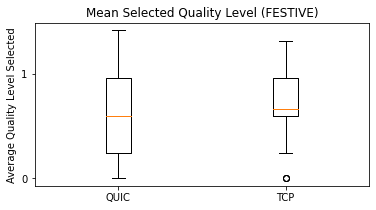

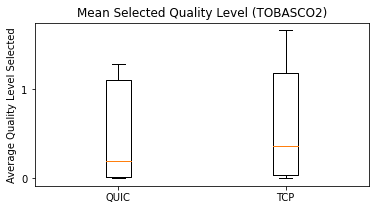

In [278]:
# Algorithm Split
graphMeanQualityLevels([festiveQuicSims, festiveTcpSims], ['QUIC', 'TCP'], 'FESTIVE')
graphMeanQualityLevels([tobascoQuicSims, tobascoTcpSims], ['QUIC', 'TCP'], 'TOBASCO2')

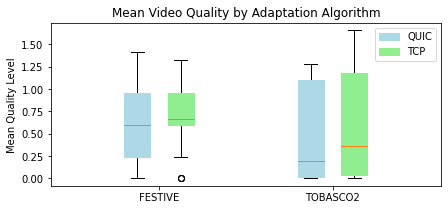

In [525]:
# Algorithm Split
pairedAlgoQualities = getPairedData(meanQualityLevelInFirst50, quicAlgoGroups, tcpAlgoGroups)
title = 'Mean Video Quality by Adaptation Algorithm'
graphPairs(pairedAlgoQualities, algoStrings, 'Mean Quality Level', title)

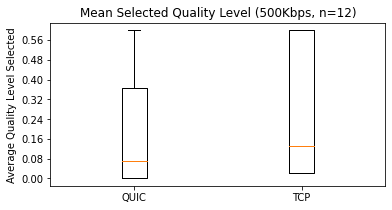

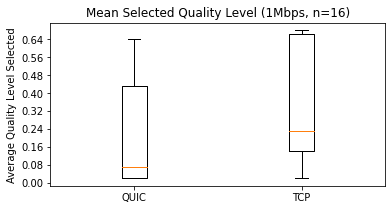

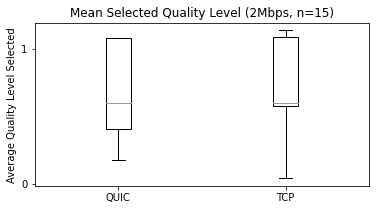

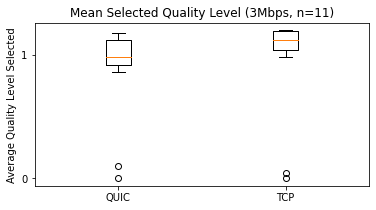

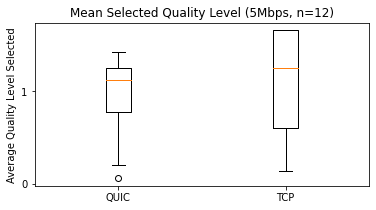

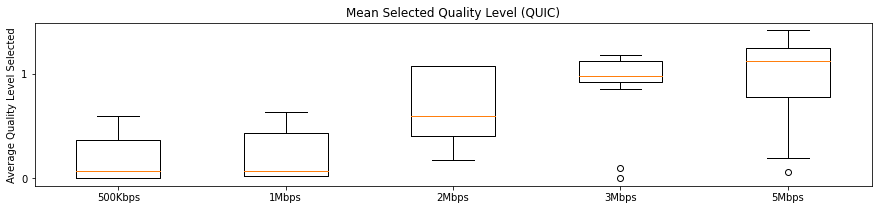

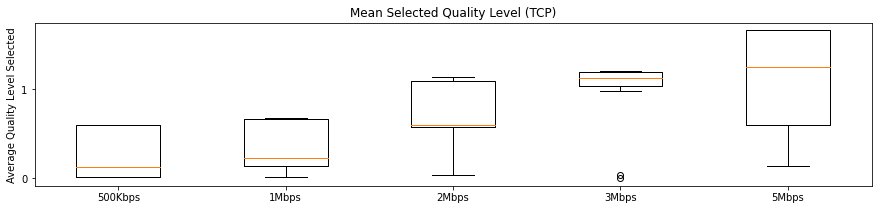

In [279]:
# Bitrate Split
graphSplit(graphMeanQualityLevels, bitrateStrings, quicRateGroups, tcpRateGroups)

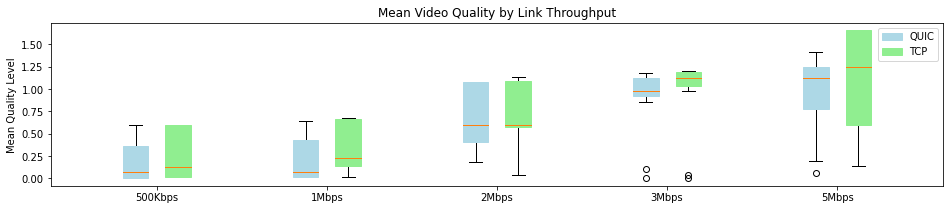

In [524]:
# Bitrate Split
pairedRateQualities = getPairedData(meanQualityLevelInFirst50, quicRateGroups, tcpRateGroups)
title = 'Mean Video Quality by Link Throughput'
graphPairs(pairedRateQualities, bitrateStrings, 'Mean Quality Level', title)

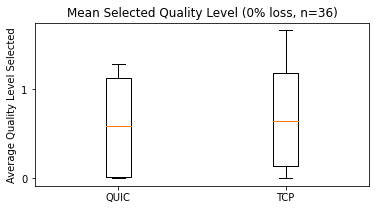

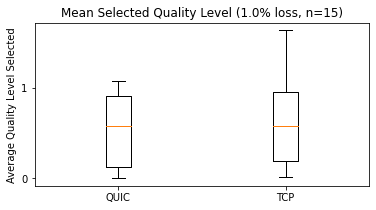

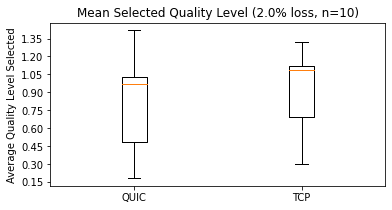

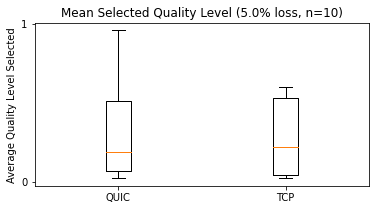

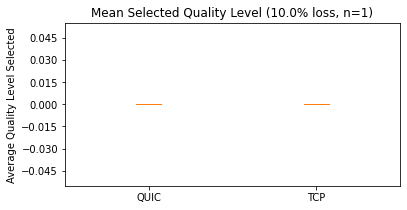

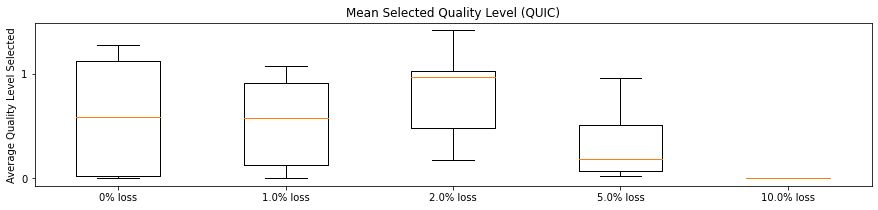

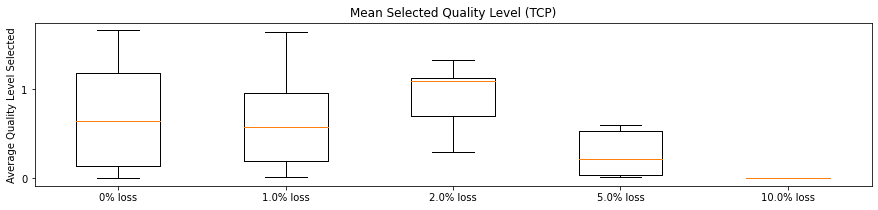

In [280]:
# Loss Split
graphSplit(graphMeanQualityLevels, lossRateStrings, quicLossGroups, tcpLossGroups)

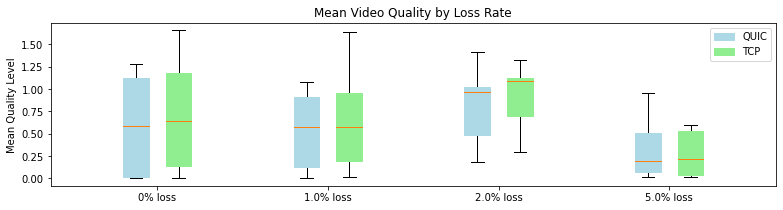

In [523]:
# Bitrate Split
pairedLossQualities = getPairedData(meanQualityLevelInFirst50, quicLossGroups, tcpLossGroups)
title = 'Mean Video Quality by Loss Rate'

# Ignore the 10% loss because we didn't do enough simulations with it.
graphPairs(pairedLossQualities[:-1], lossRateStrings[:-1], 'Mean Quality Level', title) 

### (in)Efficiency graphs for each split

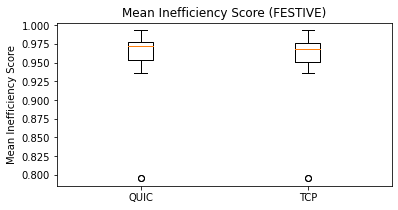

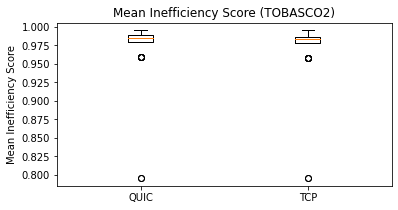

In [505]:
# Algorithm Split
graphMeanInefficiency([festiveQuicSims, festiveTcpSims], ['QUIC', 'TCP'], 'FESTIVE')
graphMeanInefficiency([tobascoQuicSims, tobascoTcpSims], ['QUIC', 'TCP'], 'TOBASCO2')

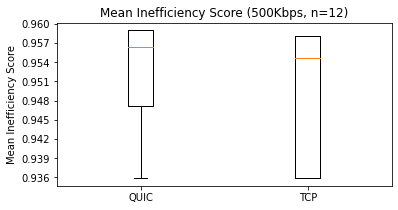

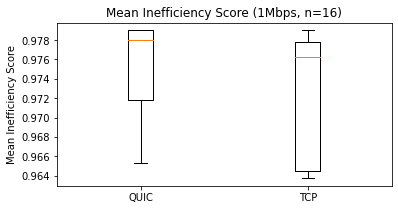

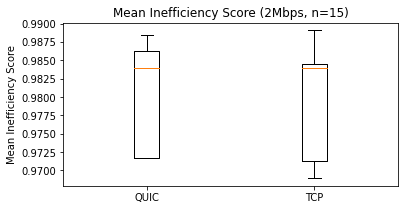

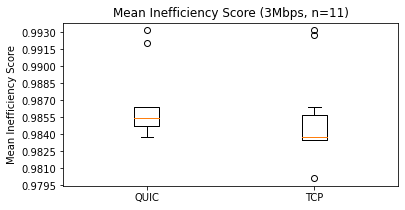

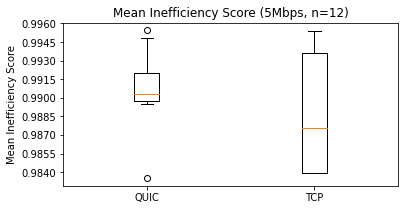

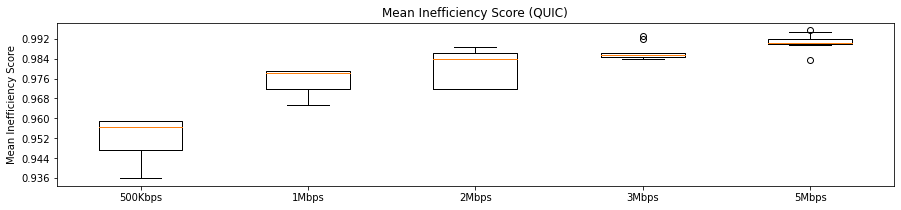

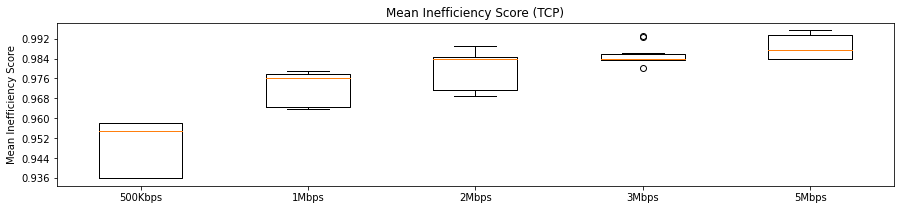

In [288]:
# Bitrate Split
graphSplit(graphMeanInefficiency, bitrateStrings, quicRateGroups, tcpRateGroups)

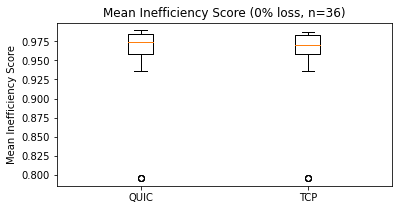

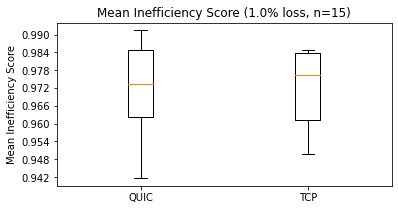

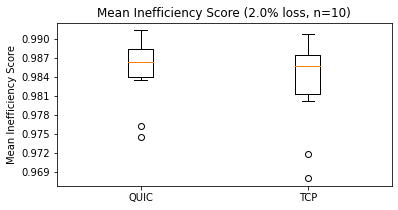

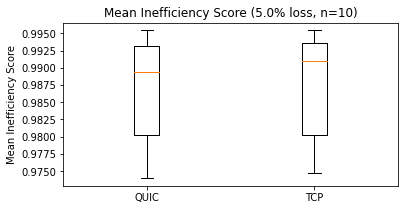

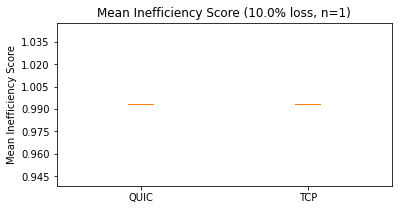

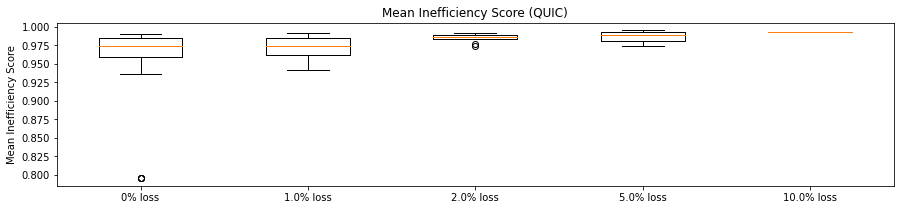

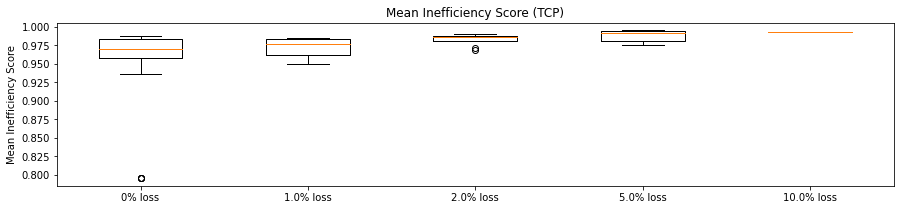

In [289]:
# Loss Split
graphSplit(graphMeanInefficiency, lossRateStrings, quicLossGroups, tcpLossGroups)

### (in)stablity graphs for each split

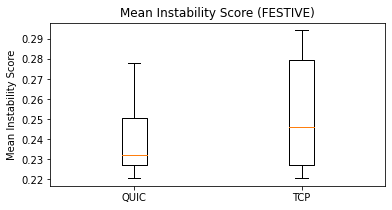

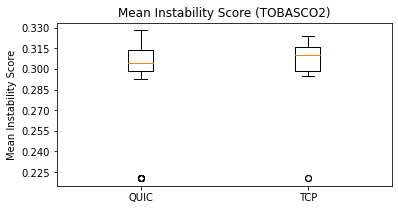

In [303]:
# QUIC/TCP Split
graphMeanInstability([festiveQuicSims, festiveTcpSims], ['QUIC', 'TCP'], 'FESTIVE')
graphMeanInstability([tobascoQuicSims, tobascoTcpSims], ['QUIC', 'TCP'], 'TOBASCO2')

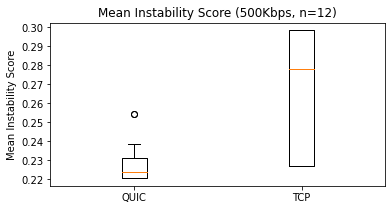

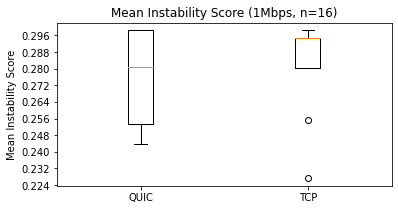

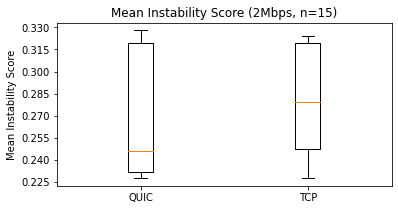

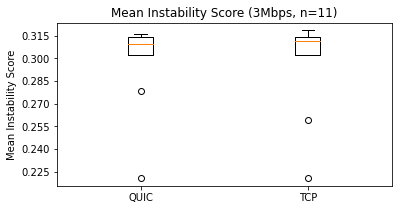

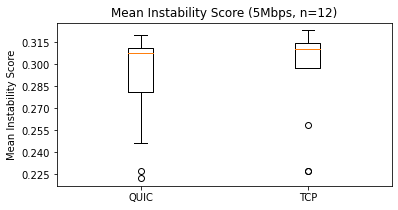

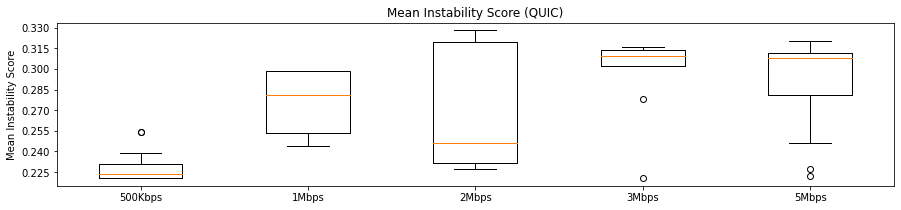

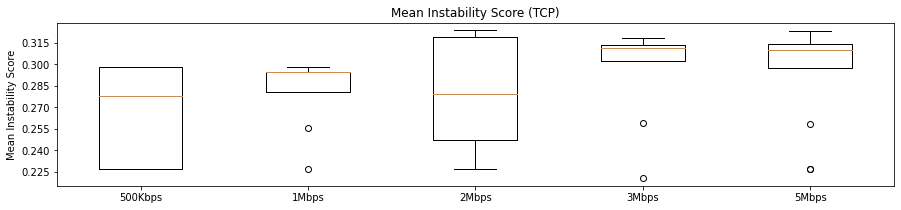

In [302]:
# Bitrate Split
graphSplit(graphMeanInstability, bitrateStrings, quicRateGroups, tcpRateGroups)

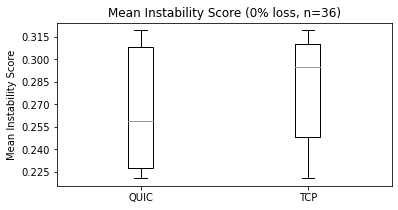

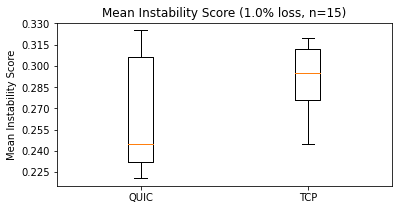

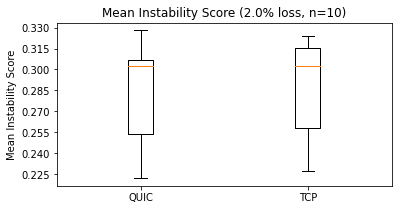

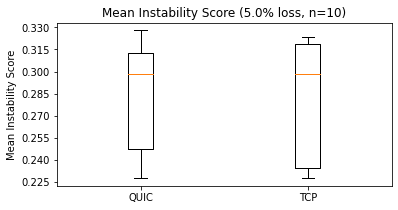

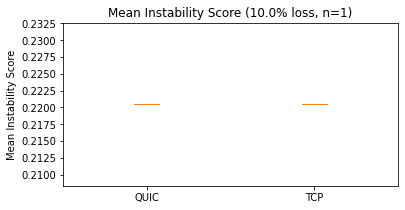

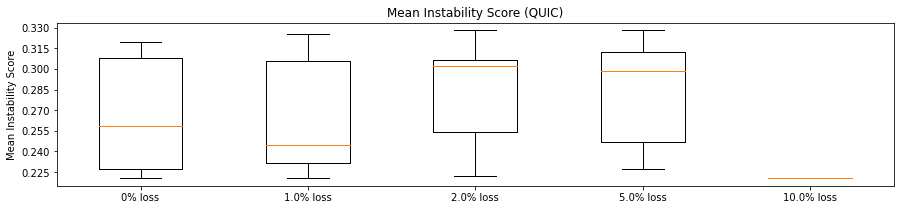

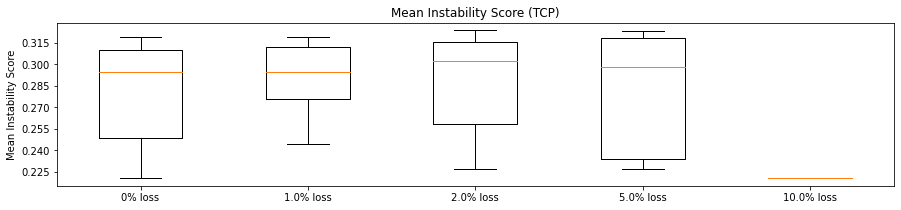

In [301]:
# Loss Split
graphSplit(graphMeanInstability, lossRateStrings, quicLossGroups, tcpLossGroups)

### Rebuffer rate graphs for each split

Malformed buffer underflow log. Likely that QUIC failed near time 299.192
Malformed buffer underflow log. Likely that QUIC failed near time 299.418
Malformed buffer underflow log. Likely that QUIC failed near time 316.032
Malformed buffer underflow log. Likely that QUIC failed near time 330.524
Malformed buffer underflow log. Likely that QUIC failed near time 324.066
Malformed buffer underflow log. Likely that QUIC failed near time 330.898
Malformed buffer underflow log. Likely that QUIC failed near time 184.045
Malformed buffer underflow log. Likely that QUIC failed near time 184.045
Malformed buffer underflow log. Likely that QUIC failed near time 316.032
Malformed buffer underflow log. Likely that QUIC failed near time 330.524
Malformed buffer underflow log. Likely that QUIC failed near time 302.949
Malformed buffer underflow log. Likely that QUIC failed near time 305.695
Malformed buffer underflow log. Likely that QUIC failed near time 324.066
Malformed buffer underflow log. Likely

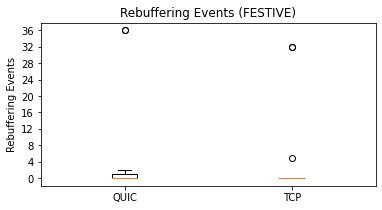

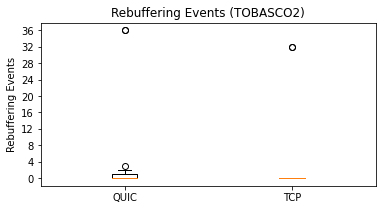

In [309]:
# QUIC/TCP Split
graphRebufferingEvents([festiveQuicSims, festiveTcpSims], ['QUIC', 'TCP'], 'FESTIVE')
graphRebufferingEvents([tobascoQuicSims, tobascoTcpSims], ['QUIC', 'TCP'], 'TOBASCO2')

Malformed buffer underflow log. Likely that QUIC failed near time 316.032
Malformed buffer underflow log. Likely that QUIC failed near time 330.524
Malformed buffer underflow log. Likely that QUIC failed near time 306.097
Malformed buffer underflow log. Likely that QUIC failed near time 309.613
Malformed buffer underflow log. Likely that QUIC failed near time 316.032
Malformed buffer underflow log. Likely that QUIC failed near time 330.524
Malformed buffer underflow log. Likely that QUIC failed near time 302.949
Malformed buffer underflow log. Likely that QUIC failed near time 305.695
Malformed buffer underflow log. Likely that QUIC failed near time 306.097
Malformed buffer underflow log. Likely that QUIC failed near time 309.613
Malformed buffer underflow log. Likely that QUIC failed near time 330.123
Malformed buffer underflow log. Likely that QUIC failed near time 212.618
Malformed buffer underflow log. Likely that QUIC failed near time 324.066
Malformed buffer underflow log. Likely

Malformed buffer underflow log. Likely that QUIC failed near time 332.035


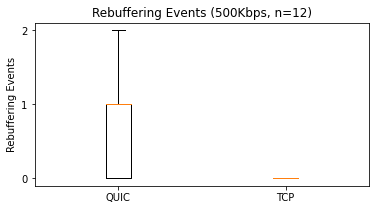

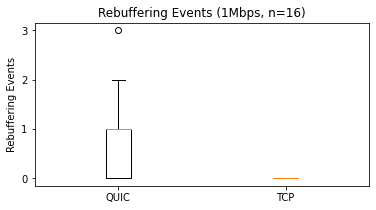

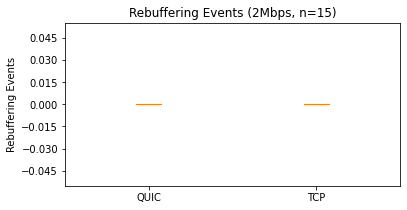

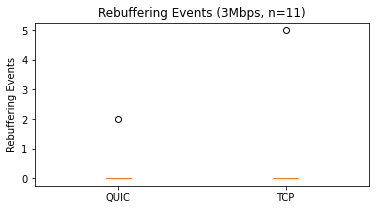

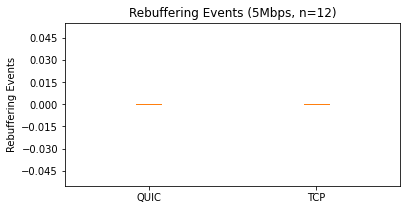

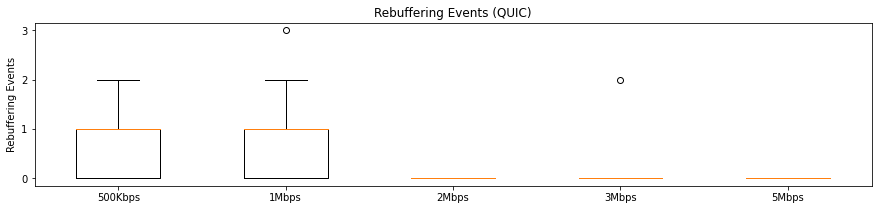

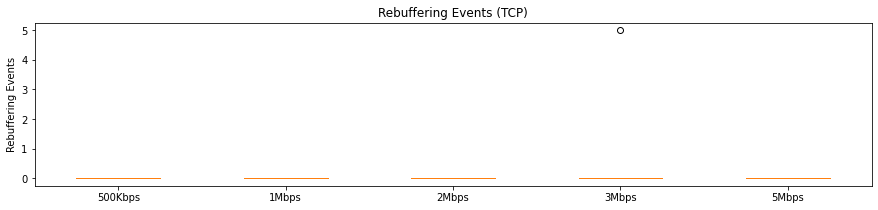

In [310]:
# Bitrate Split
graphSplit(graphRebufferingEvents, bitrateStrings, quicRateGroups, tcpRateGroups)

Malformed buffer underflow log. Likely that QUIC failed near time 299.192
Malformed buffer underflow log. Likely that QUIC failed near time 299.418
Malformed buffer underflow log. Likely that QUIC failed near time 316.032
Malformed buffer underflow log. Likely that QUIC failed near time 330.524
Malformed buffer underflow log. Likely that QUIC failed near time 324.066
Malformed buffer underflow log. Likely that QUIC failed near time 330.898
Malformed buffer underflow log. Likely that QUIC failed near time 184.045
Malformed buffer underflow log. Likely that QUIC failed near time 184.045
Malformed buffer underflow log. Likely that QUIC failed near time 299.192
Malformed buffer underflow log. Likely that QUIC failed near time 299.418
Malformed buffer underflow log. Likely that QUIC failed near time 306.097
Malformed buffer underflow log. Likely that QUIC failed near time 309.613
Malformed buffer underflow log. Likely that QUIC failed near time 120.415
Malformed buffer underflow log. Likely

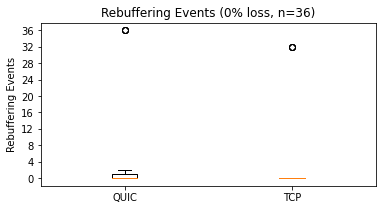

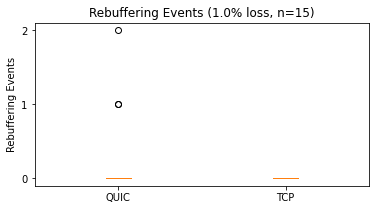

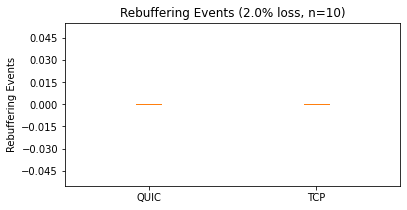

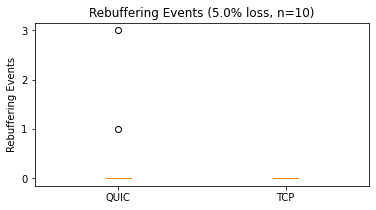

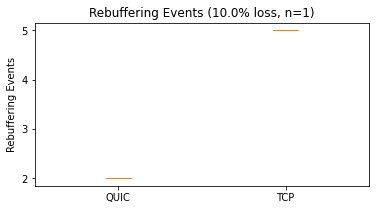

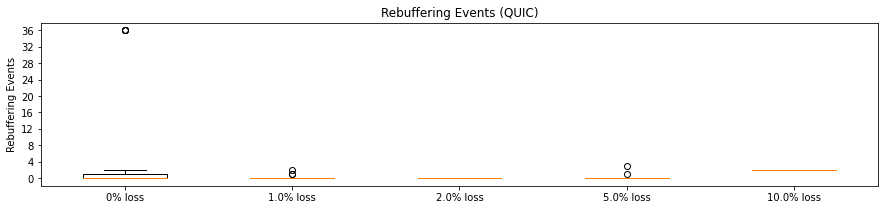

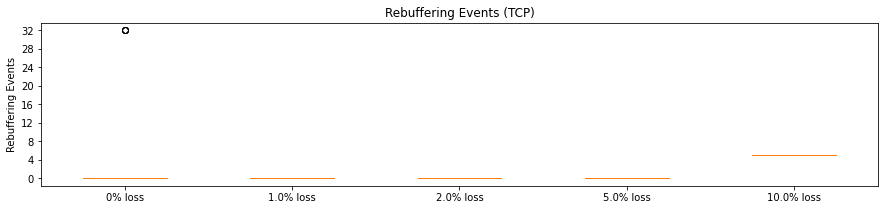

In [311]:
# Loss Split
graphSplit(graphRebufferingEvents, lossRateStrings, quicLossGroups, tcpLossGroups)

### Average Buffer level for each split

In [528]:
def meanBufferLevelInFirst50(sim):
    return meanBufferLevel(sim, 50)

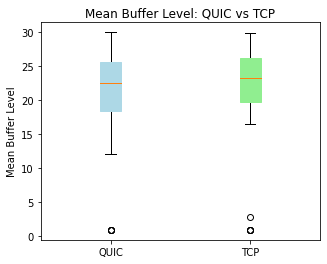

In [530]:
# QUIC/TCP
quicBufferLevels, tcpBufferLevels = mapGroupPair(meanBufferLevelInFirst50, allQuicSims, allTcpSims)
graphPair(quicBufferLevels, tcpBufferLevels, 'Mean Buffer Level', 'Mean Buffer Level: QUIC vs TCP')

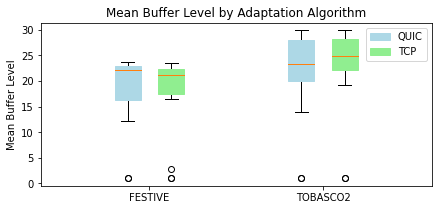

In [531]:
# Algorithm Split
pairedAlgoBufferLevels = getPairedData(meanBufferLevelInFirst50, quicAlgoGroups, tcpAlgoGroups)
title = 'Mean Buffer Level by Adaptation Algorithm'
graphPairs(pairedAlgoBufferLevels, algoStrings, 'Mean Buffer Level', title)